
<b><center><font color= 'Black' style = 'font-family:verdana ; font-size:30px'>Capstone - Credit Card Fraud Detection</font></center></b>
<hr style="color: black; height: 1px;">
<b><font color= '#067F7D' style = 'font-family:verdana ; font-size:20px'>Problem Statement </font><b>
<br>
    
<font color="brown" style="font-family:Cambria ;font-size:18px">The `data set` Contains `total Number of 2,84,807 transactions` out of these, `492 are fraudulent`. Since the `data set is highly imbalanced`, it needs to be handled before model building </font>
<font color="brown" style="font-family:Cambria ;font-size:18px">The `Main Aim` Of The Project is  to `Predict Fraudulent Credit card Transactions` With The `Help Of Machine Learning Models`. </font>
    
<b><font color= '#067F7D' style = 'font-family:verdana ; font-size:20px'>Business Problem Overview</font><b>
<br>
    
<font color="brown" style="font-family:Cambria ;font-size:18px">For many banks, retaining high profitable customers is the number one business goal. `Banking fraud, however, poses a significant threat to this goal for different banks`. In terms of substantial `financial losses, trust and credibility`, this is a concerning issue to both banks and customers alike.
It has been estimated by Nilson `Report that by 2020`,`banking` frauds would account for `$30 billion worldwide`. With the `rise in digital payment` channels, `the number of fraudulent transactions is also increasing in new and different ways.`</font>

<b><font color= '#067F7D' style = 'font-family:verdana ; font-size:20px'>General Information</font><b><br>
    
<font color="brown" style="font-family:Cambria ;font-size:18.5px">The data set includes credit card transactions made by European cardholders over a period of two days in September 2013. 
`Out of a total of 2,84,807 transactions, 492 were fraudulent`. This data set is `highly unbalanced`, `with the positive class (frauds) accounting for 0.172% of the total transactions`. The data set has also been modified with `principal component analysis (PCA)` to maintain confidentiality. Apart from `‘time’` and `‘amount’`, all the other features `(V1, V2, V3, up to V28)` are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. `The feature 'class' represents class labelling`, and it takes the value of 1 in cases of fraud and 0 in others.</font>

<b><font color=black style = 'font-family:cambria; font-size:18px'> <center>The `Credit Card Fraud Detection`  Analysis is divided into 7 parts </center></font></b>
<img src="images/machine.jpg" alt="An example image" width=400px>

<b><font color=black style = 'font-family:cambria; font-size:18px'> Importing The Necessary Libraries</font><b>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import precision_recall_curve,accuracy_score,confusion_matrix,f1_score,roc_auc_score,roc_curve
from sklearn import preprocessing
pd.set_option('display.max_columns',50)

import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
import time

In [2]:
from imblearn.over_sampling import SMOTE

# importing adasyn
from imblearn.over_sampling import ADASYN

from collections import Counter

<b><font color=#FF5733 style = 'font-family:cambria; font-size:18px'> Step 1  & 2 :Gathering The Data & Data Preparation </font><b><br>
 

   -  **Reading The Data And UnderStanding The Data**
   -  **Checking The Shape Of The Data**
   -  **Checking info Of The Data**
   -  **Using Describe Function**
   -  **Checking The Missing Values**
         - **If Missing Values Presents We Will Handle Them**

In [3]:
data=pd.read_csv('creditcard.csv')
#rading The data
data.head(4)


Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0

<b><font color=black style = 'font-family:cambria; font-size:15px'> The Data Set Contains `284807 Rows & 31 Columns` </font><b>

In [4]:
print( f"The Shape Of The Data Set is {data.shape}")

The Shape Of The Data Set is (284807, 31)


<b><font color=black style = 'font-family:cambria; font-size:15px'> All The Columns Are In `Float 64` Only `Target Varaible` Means `Class` Is In `Int64` </font><b>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<b><font color=black style = 'font-family:cambria; font-size:15px'>Using The `Describe Function` </font><b>

In [6]:
data.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

                V10           V11           V12           V13           V14  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   2.239053e-15  1.673327e-15 -1.247012e-15  8.190001e-16  1.207294e-15   
std    1.088850e+00  1.020713e+00  9.992014e-01  9.952742e-01  9.585956e-01   
min   -2.458826e+01 -4.797473e+00 -1.868371e+01 -5.791881e+00 -1.921433e+01   
25%   -5.354257e-01 -7.624942e-01 -4.055715e-01 -6.485393e-01 -4.255740e-01   
50%   -9.291738e-02 -3.275735e-02  1.400326e-01 -1.356806e-02  5.060132e-02   
75%    4.539234e-01  7.395934e-01  6.182380e-01  6.625050e-01  4.931498e-01   
max    2.374514e+01  1.201891e+01  7.848392e+00  7.126883e+00  1.052677e+01   

                V15           V16           V17           V18           V19  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   4.887456e-15  1.437716e-15 -3.772171e-16  9.564149e-16  1.039917e-15   
std    9.153160e-01  8.762529e-01  8.493371e-01  8.381762e-01  8.140405e-01   
min   -4.498945e+00 -1.412985e+01 -2.516280e+01 -9.498746e+00 -7.213527e+00   
25%   -5.828843e-01 -4.680368e-01 -4.837483e-01 -4.988498e-01 -4.562989e-01   
50%    4.807155e-02  6.641332e-02 -6.567575e-02 -3.636312e-03  3.734823e-03   
75%    6.488208e-01  5.232963e-01  3.996750e-01  5.008067e-01  4.589494e-01   
max    8.877742e+00  1.731511e+01  9.253526e+00  5.041069e+00  5.591971e+00   

                V20           V21           V22           V23           V24  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   6.406204e-16  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    7.709250e-01  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min   -5.449772e+01 -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%   -2.117214e-01 -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%   -6.248109e-02 -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    1.330408e-01  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    3.942090e+01  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02

<b><font color=black style = 'font-family:cambria; font-size:15px'>Checking The `Missing Values` We Don't Have Null Values </font><b>

In [7]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<b><font color=black style = 'font-family:cambria; font-size:15px'>Target Variable Is `class` where It Takes Value `1 In Case Of Fraud` and `0 Otherwise`. </font><b><br>    
<b><font color=black style = 'font-family:cambria; font-size:15px'> There Are Only `492 Fraud Transcation` Out of whole Data set </font><b><br>  
  
<b><font color=black style = 'font-family:cambria; font-size:15px'> The Percentage % Value Of Fraud is `0.17%` Which Is Highly Imbalance</font><b>

In [8]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
# checking In percentage %
round(data['Class'].value_counts()/len(data)*100,2)

0    99.83
1     0.17
Name: Class, dtype: float64

In [10]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds',round(data['Class'].value_counts()[0]/len(data)*100,2),'%')
print('Frauds',round(data['Class'].value_counts()[1]/len(data)*100,2),'%')

No Frauds 99.83 %
Frauds 0.17 %


<b><font color=black style = 'font-family:cambria; font-size:15px'>  we have `492 fraudalent` transactions out of `284807 total credit card transactions`.</font></b><br>
<font color=black style = 'font-family:cambria; font-size:15px'>
Target variable distribution shows that we are dealing with an highly imbalanced problem as there are many more genuine transactions class as compared to the fraudalent transactions. The model would achieve high accuracy as it would mostly predict majority class — transactions which are genuine in our example. To overcome this we will use other metrics for model evaluation such as `ROC-AUC , precision and recall` etc
</font>

In [11]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

<b><font color=black style = 'font-family:cambria; font-size:15px'>Checking The `Correlation`. How They Are Dependent To Eachother</font><b>

In [12]:
data.corr()

Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16   
V2     -0.010593  4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15   
V3     -0.419618 -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
V4     -0.105260 -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00   
V5      0.173072  1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15   
V6     -0.063016 -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16   
V7      0.084714 -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16   
V8     -0.036949 -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16   
V9     -0.008660 -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16   
V10     0.030617  7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16   
V11    -0.247689  2.125498e-16  1.975426e-16  1.576830e-15  3.459380e-16   
V12     0.124348  2.053457e-16 -9.568710e-17  6.310231e-16 -5.625518e-16   
V13    -0.065902 -2.425603e-17  6.295388e-16  2.807652e-16  1.303306e-16   
V14    -0.098757 -5.020280e-16 -1.730566e-16  4.739859e-16  2.282280e-16   
V15    -0.183453  3.547782e-16 -4.995814e-17  9.068793e-16  1.377649e-16   
V16     0.011903  7.212815e-17  1.177316e-17  8.299445e-16 -9.614528e-16   
V17    -0.073297 -3.879840e-16 -2.685296e-16  7.614712e-16 -2.699612e-16   
V18     0.090438  3.230206e-17  3.284605e-16  1.509897e-16 -5.103644e-16   
V19     0.028975  1.502024e-16 -7.118719e-18  3.463522e-16 -3.980557e-16   
V20    -0.050866  4.654551e-16  2.506675e-16 -9.316409e-16 -1.857247e-16   
V21     0.044736 -2.457409e-16 -8.480447e-17  5.706192e-17 -1.949553e-16   
V22     0.144059 -4.290944e-16  1.526333e-16 -1.133902e-15 -6.276051e-17   
V23     0.051142  6.168652e-16  1.634231e-16 -4.983035e-16  9.164206e-17   
V24    -0.016182 -4.425156e-17  1.247925e-17  2.686834e-19  1.584638e-16   
V25    -0.233083 -9.605737e-16 -4.478846e-16 -1.104734e-15  6.070716e-16   
V26    -0.041407 -1.581290e-17  2.057310e-16 -1.238062e-16 -4.247268e-16   
V27    -0.005135  1.198124e-16 -4.966953e-16  1.045747e-15  3.977061e-17   
V28    -0.009413  2.083082e-15 -5.093836e-16  9.775546e-16 -2.761403e-18   
Amount -0.010596 -2.277087e-01 -5.314089e-01 -2.108805e-01  9.873167e-02   
Class  -0.012323 -1.013473e-01  9.128865e-02 -1.929608e-01  1.334475e-01   

                  V5            V6            V7            V8            V9  \
Time    1.730721e-01 -6.301647e-02  8.471437e-02 -3.694943e-02 -8.660434e-03   
V1      1.812612e-17 -6.506567e-16 -1.005191e-15 -2.433822e-16 -1.513678e-16   
V2      5.157519e-16  2.787346e-16  2.055934e-16 -5.377041e-17  1.978488e-17   
V3     -6.539009e-17  1.627627e-15  4.895305e-16 -1.268779e-15  5.568367e-16   
V4     -1.719944e-15 -7.491959e-16 -4.104503e-16  5.697192e-16  6.923247e-16   
V5      1.000000e+00  2.408382e-16  2.715541e-16  7.437229e-16  7.391702e-16   
V6      2.408382e-16  1.000000e+00  1.191668e-16 -1.104219e-16  4.131207e-16   
V7      2.715541e-16  1.191668e-16  1.000000e+00  3.344412e-16  1.122501e-15   
V8      7.437229e-16 -1.104219e-16  3.344412e-16  1.000000e+00  4.356078e-16   
V9      7.391702e-16  4.131207e-16  1.122501e-15  4.356078e-16  1.000000e+00   
V10    -5.202306e-16  5.932243e-17 -7.492834e-17 -2.801370e-16 -4.642274e-16   
V11     7.203963e-16  1.980503e-15  1.425248e-16  2.487043e-16  1.354680e-16   
V12     7.412552e-16  2.375468e-16 -3.536655e-18  1.839891e-16 -1.079314e-15   
V13     5.886991e-16 -1.211182e-16  1.266462e-17 -2.921856e-16  2.251072e-15   
V14     6.565143e-16  2.621312e-16  2.607772e-16 -8.599156e-16  3.784757e-15   
V15    -8.720275e-16 -1.531188e-15 -1.690540e-16  4.127777e-16 -1.051167e-15   
V16     2.246261e-15  2.623672e-18  5.869302e-17 -5.254741e-16 -1.214086e-15   
V17     1.281914e-16  2.015618e-16  2.177192e-16 -2.269549e-16  1.113695e-15   
V18     5.308590e-16  1.223814e-16  7.604126e-17 -3.667974e

<b><font color=#FF5733 style = 'font-family:cambria; font-size:18px'> Step 3 : Data Visualisation  </font><b><br>
 

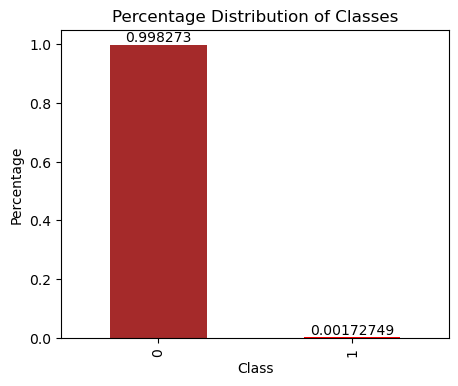

In [13]:
plt.figure(figsize=(5,4))
ax=data['Class'].value_counts(normalize = True).plot.bar(color=['brown','r'])
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Percentage Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.show()

<b><font color=black style = 'font-family:cambria; font-size:15px'>`Note:` Notice How Imbalanced Is Our Original Dataset! `Most` Of The Transactions Are `Non-Fraud`. If We Use This Dataframe As The Base For Our Predictive Models And Analysis We Might Get A `Lot Of Errors` And Our Algorithms Will `Probably Overfit` Since It Will "Assume" That Most Transactions Are Not Fraud. But We Don't Want Our Model To Assume, We Want Our Model To Detect Patterns That Give Signs Of Fraud!</font><b>

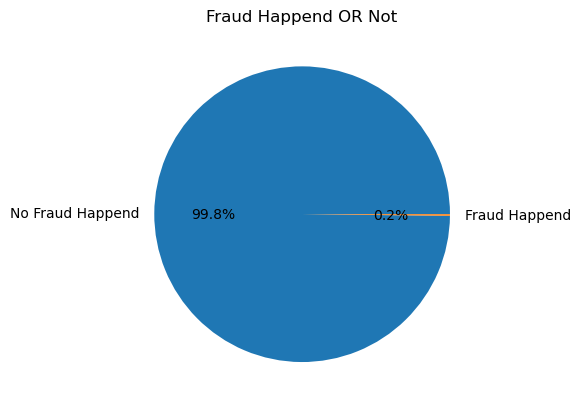

In [14]:
labels=['No Fraud Happend','Fraud Happend']
plt.title('Fraud Happend OR Not')
plt.pie(data['Class'].value_counts(),labels=labels, autopct='%1.1f%%')
plt.show()


<b><font color=black style = 'font-family:cambria; font-size:15px'>Distributions: By Seeing The Distributions We Can Have An Idea How Skewed Are These Features, We Can Also See Further Distributions Of The Other Features. There Are Techniques That Can Help The Distributions Be Less Skewed Which Will Be Implemented In This Notebook In The Future.</font><b>

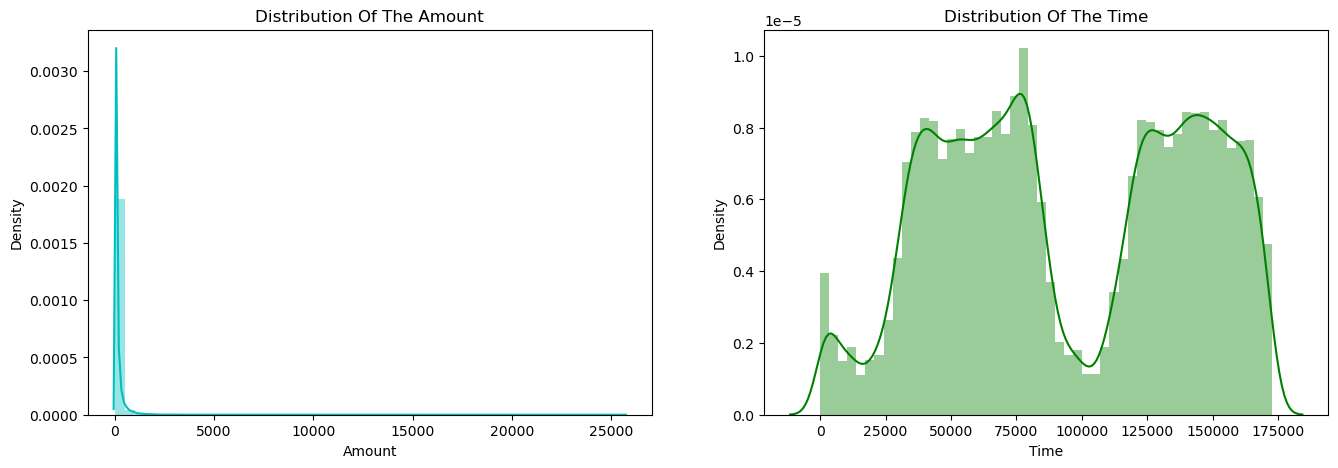

In [15]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.title('Distribution Of The Amount')
plt.xlabel('Amount')
sns.distplot(data['Amount'].values,color='c')
plt.subplot(1,2,2)

plt.title('Distribution Of The Time')
plt.xlabel('Time')

sns.distplot(data['Time'].values,color='g')

plt.show()

<b><font color=black style = 'font-family:cambria; font-size:15px'>Seeing Those Rows  Who Have Been `Frauded` And `No Frauded` In The Above Code </font><b>

In [16]:
data_fraud=data[data['Class']==1]
data_no_fraud=data[data['Class']==0]

In [17]:
print(f'The Total Number Of Fraud Cases Are {data_fraud.shape}')
print(f'The Total Number Of No Fraud Cases Are {data_no_fraud.shape}')

The Total Number Of Fraud Cases Are (492, 31)
The Total Number Of No Fraud Cases Are (284315, 31)


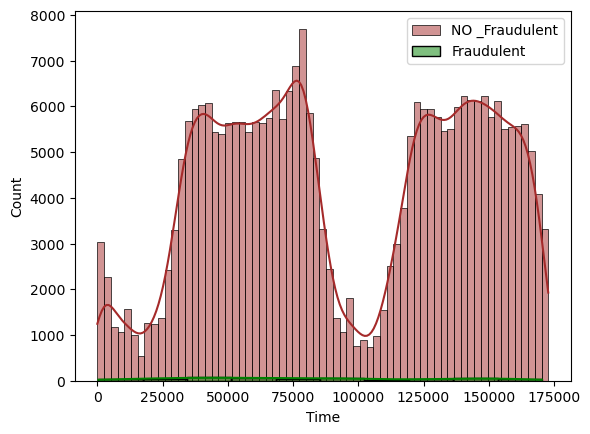

In [18]:
sns.histplot(data=data[data['Class']==0],x='Time',label='NO _Fraudulent',color='brown',kde=True,fill=True)

sns.histplot(data=data[data['Class']==1],x='Time',label='Fraudulent',color='green',kde=True,fill=True)

plt.legend()
plt.show()

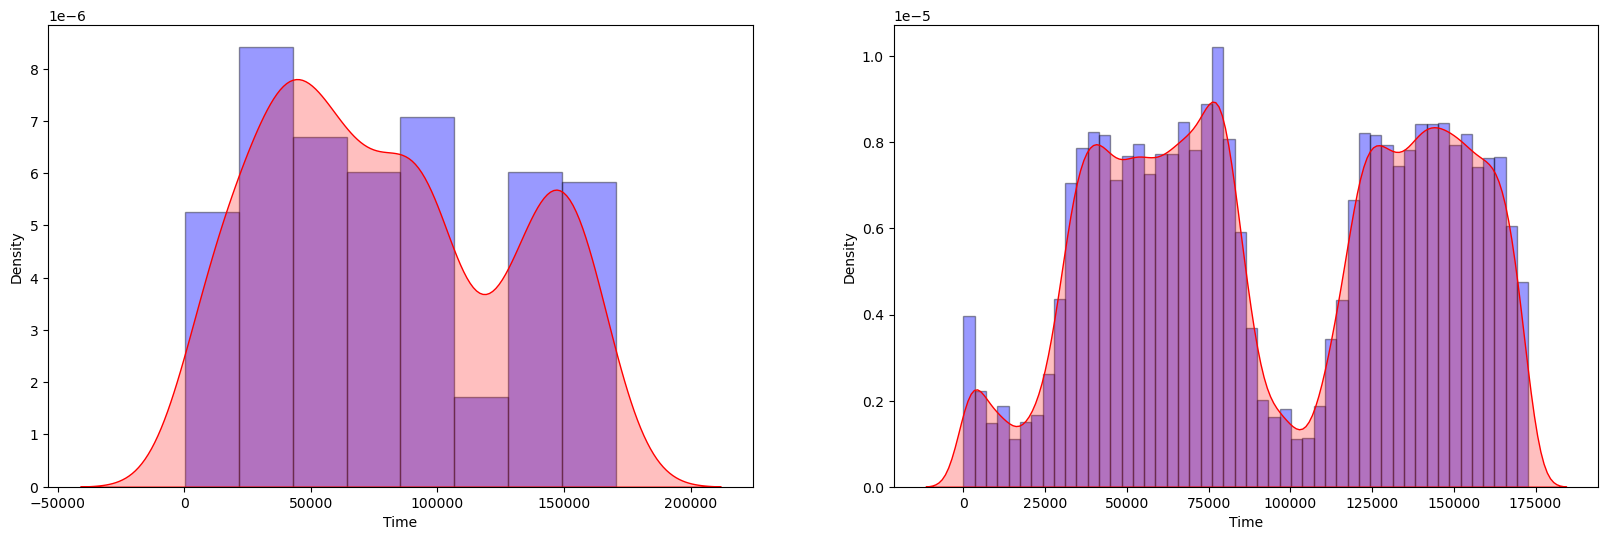

In [19]:
# plotting subplots
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(data_fraud['Time'],hist_kws={'edgecolor':'black','color':'blue'},kde_kws={'fill':True,'color':'red'})
# -------------------------------------------------------------------------------------------------------------------
plt.subplot(1,2,2)
sns.distplot(data_no_fraud['Time'],hist_kws={'edgecolor':'black','color':'blue'},kde_kws={'fill':True,'color':'red'})
plt.show()

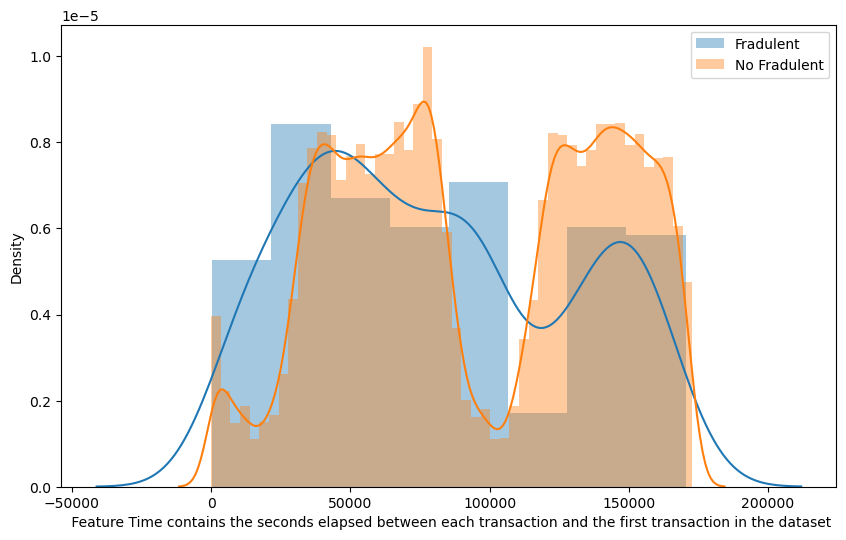

In [20]:
# distribution Plot

plt.figure(figsize=(10,6))
ax=sns.distplot(data_fraud['Time'],label='Fradulent',hist=True)
ax=sns.distplot(data_no_fraud['Time'],label='No Fradulent',hist=True)
plt.xlabel(' Feature Time contains the seconds elapsed between each transaction and the first transaction in the dataset')
plt.legend()
plt.show()

<b><font color=black style = 'font-family:cambria; font-size:15px'>  Analysing `Time` Column </font><b>

In [21]:
delta_time=pd.to_timedelta(data["Time"],unit='s')

In [22]:
data['Time_day']=delta_time.dt.components.days
data['Time_hours']=delta_time.dt.components.hours
data['Time_minutes']=delta_time.dt.components.minutes


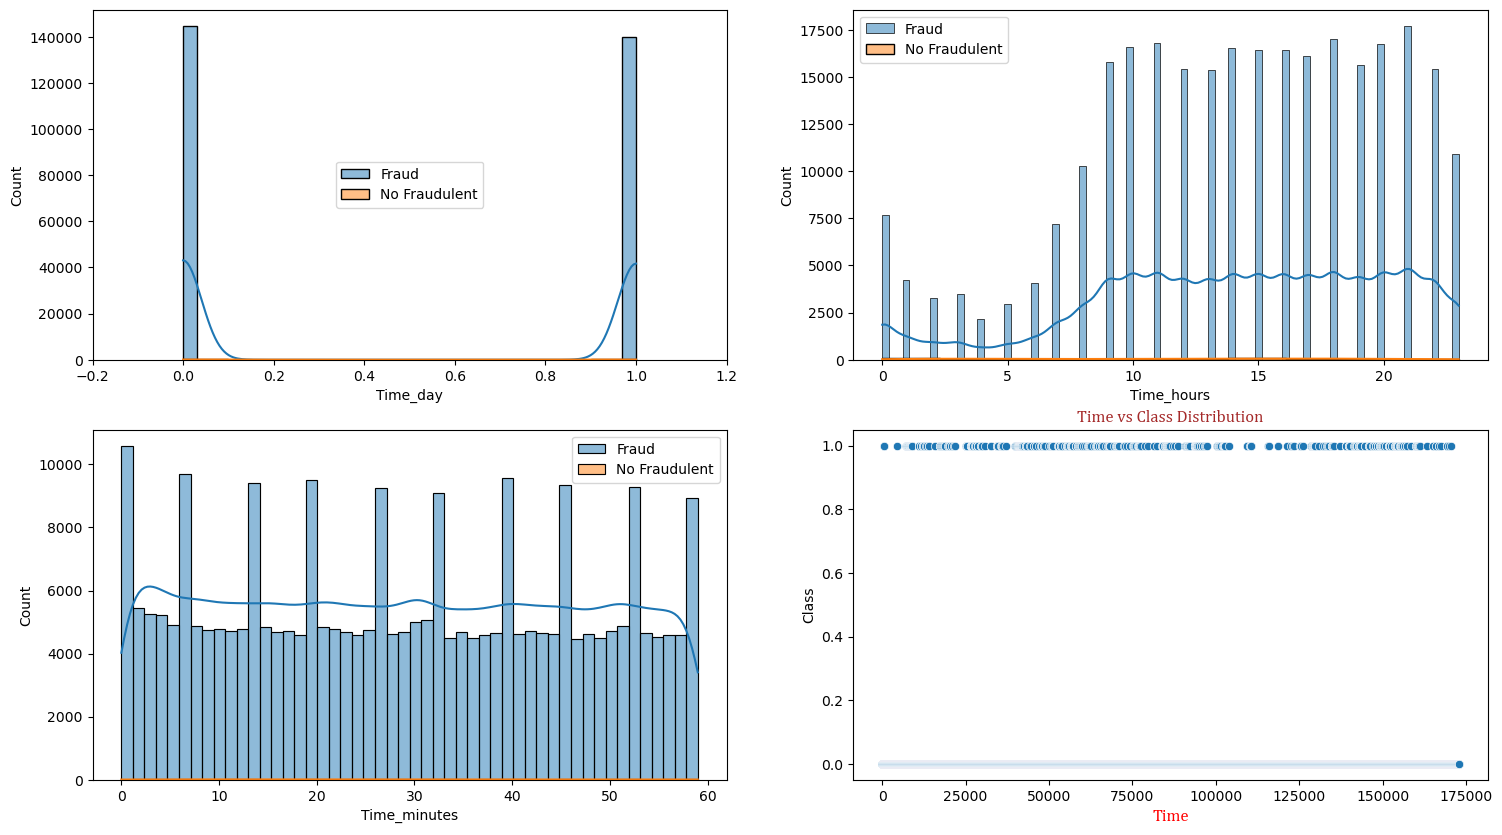

In [23]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)

plt.xlim(-0.2,1.2)
sns.histplot(data[data['Class']==0]['Time_day'],kde=True,label='Fraud')
sns.histplot(data[data['Class']==1]['Time_day'],kde=True,label='No Fraudulent')
plt.legend(loc='center')
# ___________________________________________________________________________________________
plt.subplot(2,2,2)
sns.histplot(data[data['Class']==0]['Time_hours'],kde=True,label='Fraud')
sns.histplot(data[data['Class']==1]['Time_hours'],kde=True,label='No Fraudulent')
plt.legend()
# ___________________________________________________________________________________________
plt.subplot(2,2,3)
sns.histplot(data[data['Class']==0]['Time_minutes'],kde=True,label='Fraud',bins=50)
sns.histplot(data[data['Class']==1]['Time_minutes'],kde=True,label='No Fraudulent',bins=50)

plt.legend()
# _____________________________________________________________________________________________
plt.subplot(2,2,4)
plt.title('Time vs Class Distribution',fontdict={'family':'cambria','fontsize':12,'color':'Brown'})
sns.scatterplot(data=data,x=data['Time'],y='Class')
plt.xlabel('Time',fontdict={'family':'cambria','fontsize':12,'color':'red'})
plt.show()

<b><font color=black style = 'font-family:cambria; font-size:15px'> By Observing The Above Plots OF All Time.The Frauds Are Happenining Very Rare But If We `See Hours` The Range Of Fraud Transctions Has Been Incresed In Between  `10Am To 20Pm` </font><b>

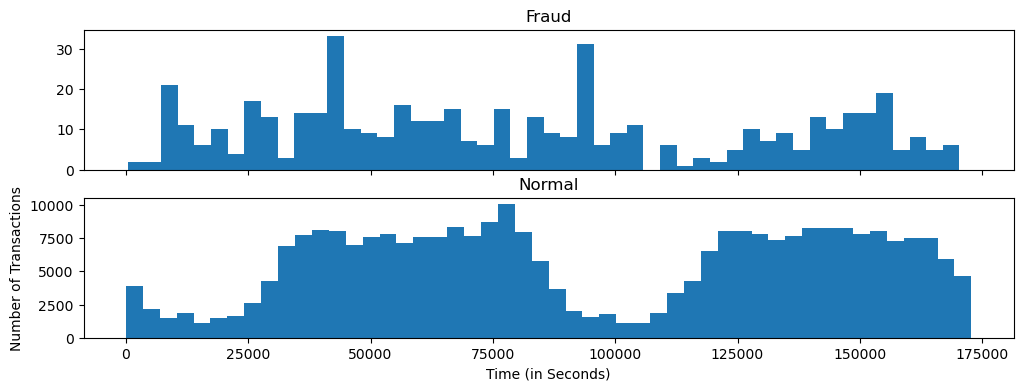

In [24]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(data.Time[data.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(data.Time[data.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

<b><font color=black style = 'font-family:cambria; font-size:15px'>Distribution OF `Class` With Respect TO `Time` </font><b>

In [25]:
data[data['Class']==1].Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

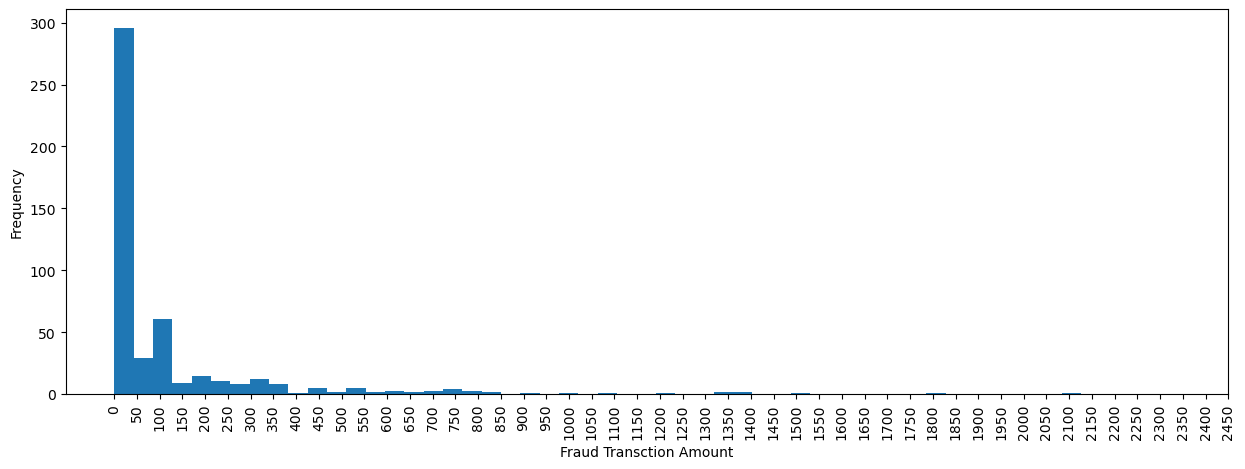

In [26]:
plt.figure(figsize=(15,5))
plt.hist(data_fraud['Amount'],bins=50)
plt.xticks(range(0, 2500, 50), rotation=90)
plt.xlabel('Fraud Transction Amount')
plt.ylabel('Frequency')
plt.show()

<b><font color=black style = 'font-family:cambria; font-size:15px'> As We Observe The Plot, We Can See That For Amounts `Less Than 50 Rupees`, Fraud Incidents Are `The Highest`. The Second-Highest Number Of Fraud Cases Occurs For Amounts Greater Than 100 Rupees But Less Than 350 Rupees. Beyond That Range, Very Large Amounts Are Frauded, But These Cases Are Rare</font><b>

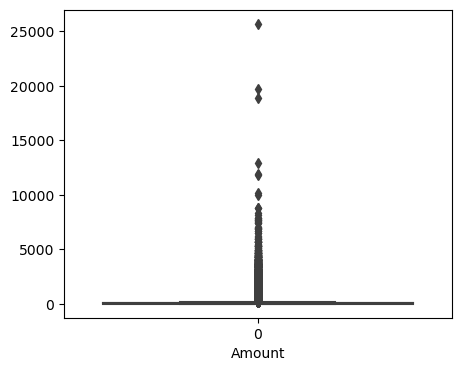

In [27]:
plt.figure(figsize=(5,4))
sns.boxplot(data=data['Amount'])
# plt.ylim(0,25000,1000)
plt.xlabel('Amount')
plt.show()

In [28]:
data_corr=pd.DataFrame(data.corr()['Class'].sort_values(ascending=False)).rename(columns={'Class':'Correlation'})
# data_corr=data_corr.reset_index()

In [29]:
data_corr.head(6)

Correlation
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783

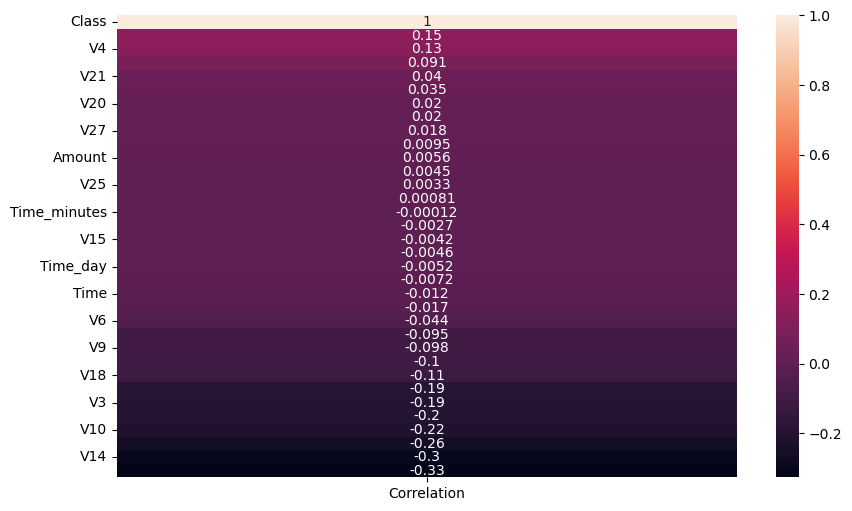

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(data=data_corr,annot=True)
plt.show()

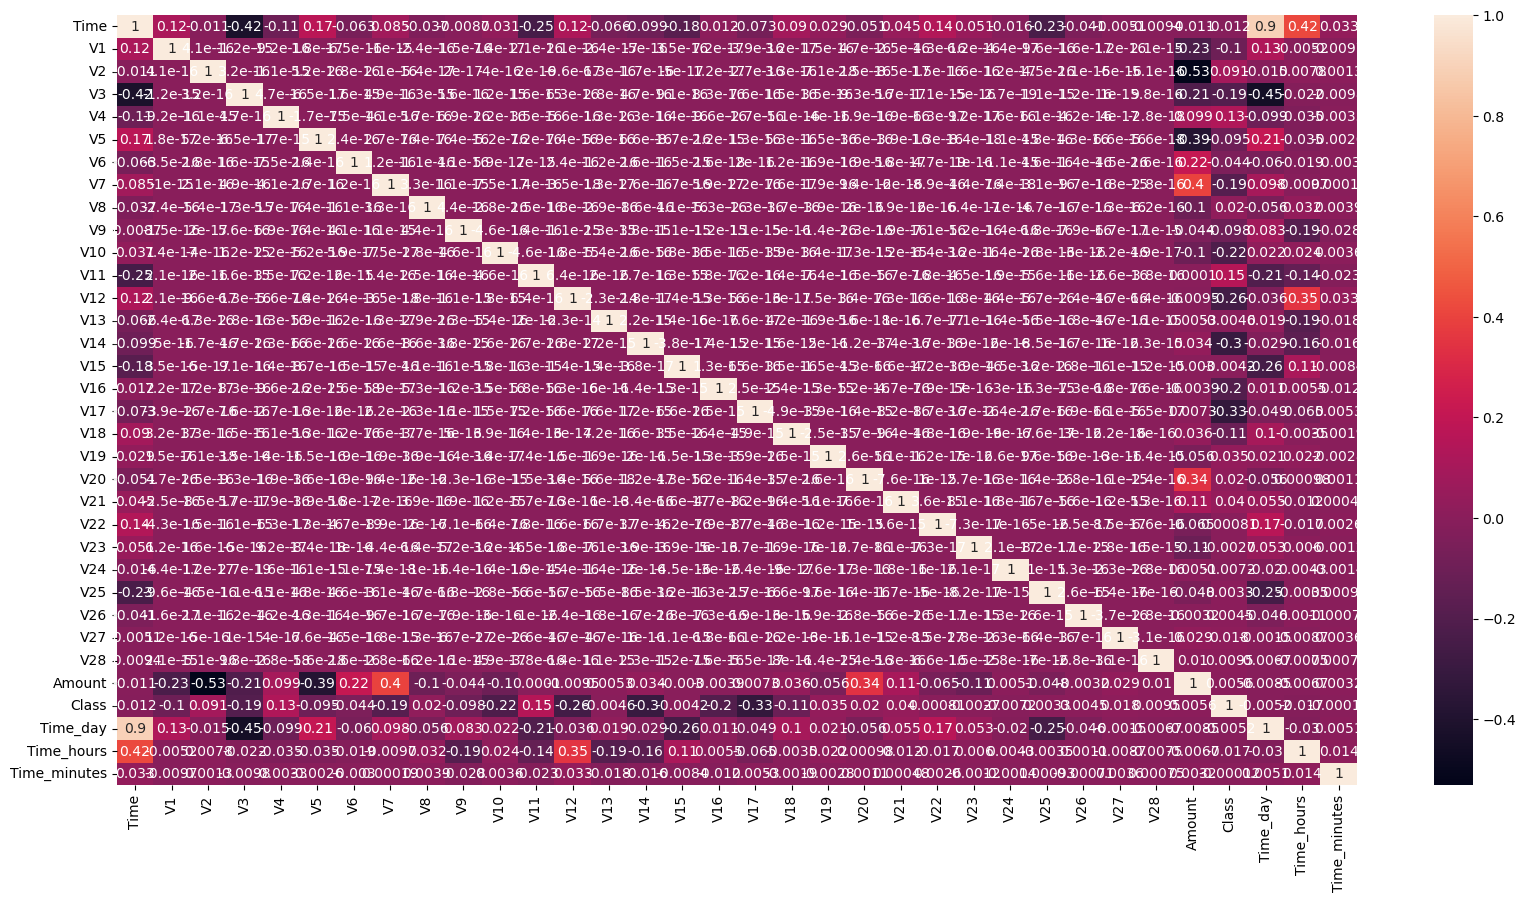

In [31]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

<b><font color=black style = 'font-family:cambria; font-size:15px'>Plotting Different Columns   </font><b>

In [32]:
data['time']=data['Time']
data.drop(columns='Time',inplace=True,axis=0)

In [33]:
col=list(data.columns.values)

In [34]:
print(col)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class', 'Time_day', 'Time_hours', 'Time_minutes', 'time']


In [35]:
col=col[0:30]

In [36]:
# Actuallly We Have 34 COlumns and elminating one colum
data.iloc[:,0:30][data.Class==1].head(3)

V1        V2        V3        V4        V5        V6        V7  \
541  -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545 -2.537387   
623  -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823  0.325574   
4920 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788  0.562320   

            V8        V9       V10       V11       V12       V13       V14  \
541   1.391657 -2.770089 -2.772272  3.202033 -2.899907 -0.595222 -4.289254   
623  -0.067794 -0.270953 -0.838587 -0.414575 -0.503141  0.676502 -1.692029   
4920 -0.399147 -0.238253 -1.525412  2.032912 -6.560124  0.022937 -1.470102   

           V15       V16       V17       V18       V19       V20       V21  \
541   0.389724 -1.140747 -2.830056 -0.016822  0.416956  0.126911  0.517232   
623   2.000635  0.666780  0.599717  1.725321  0.283345  2.102339  0.661696   
4920 -0.698826 -2.282194 -4.781831 -2.615665 -1.334441 -0.430022 -0.294166   

           V22       V23       V24       V25       V26       V27       V28  \
541  -0.035049 -0.465211  0.320198  0.044519  0.177840  0.261145 -0.143276   
623   0.435477  1.375966 -0.293803  0.279798 -0.145362 -0.252773  0.035764   
4920 -0.932391  0.172726 -0.087330 -0.156114 -0.542628  0.039566 -0.153029   

      Amount  Class  
541     0.00      1  
623   529.00      1  
4920  239.93      1

<b><font color=black style = 'font-family:cambria; font-size:18px'> Plotting All The Variables And Seeing Wheather They Are Fraud or Not Fraud</font><b><br>
 

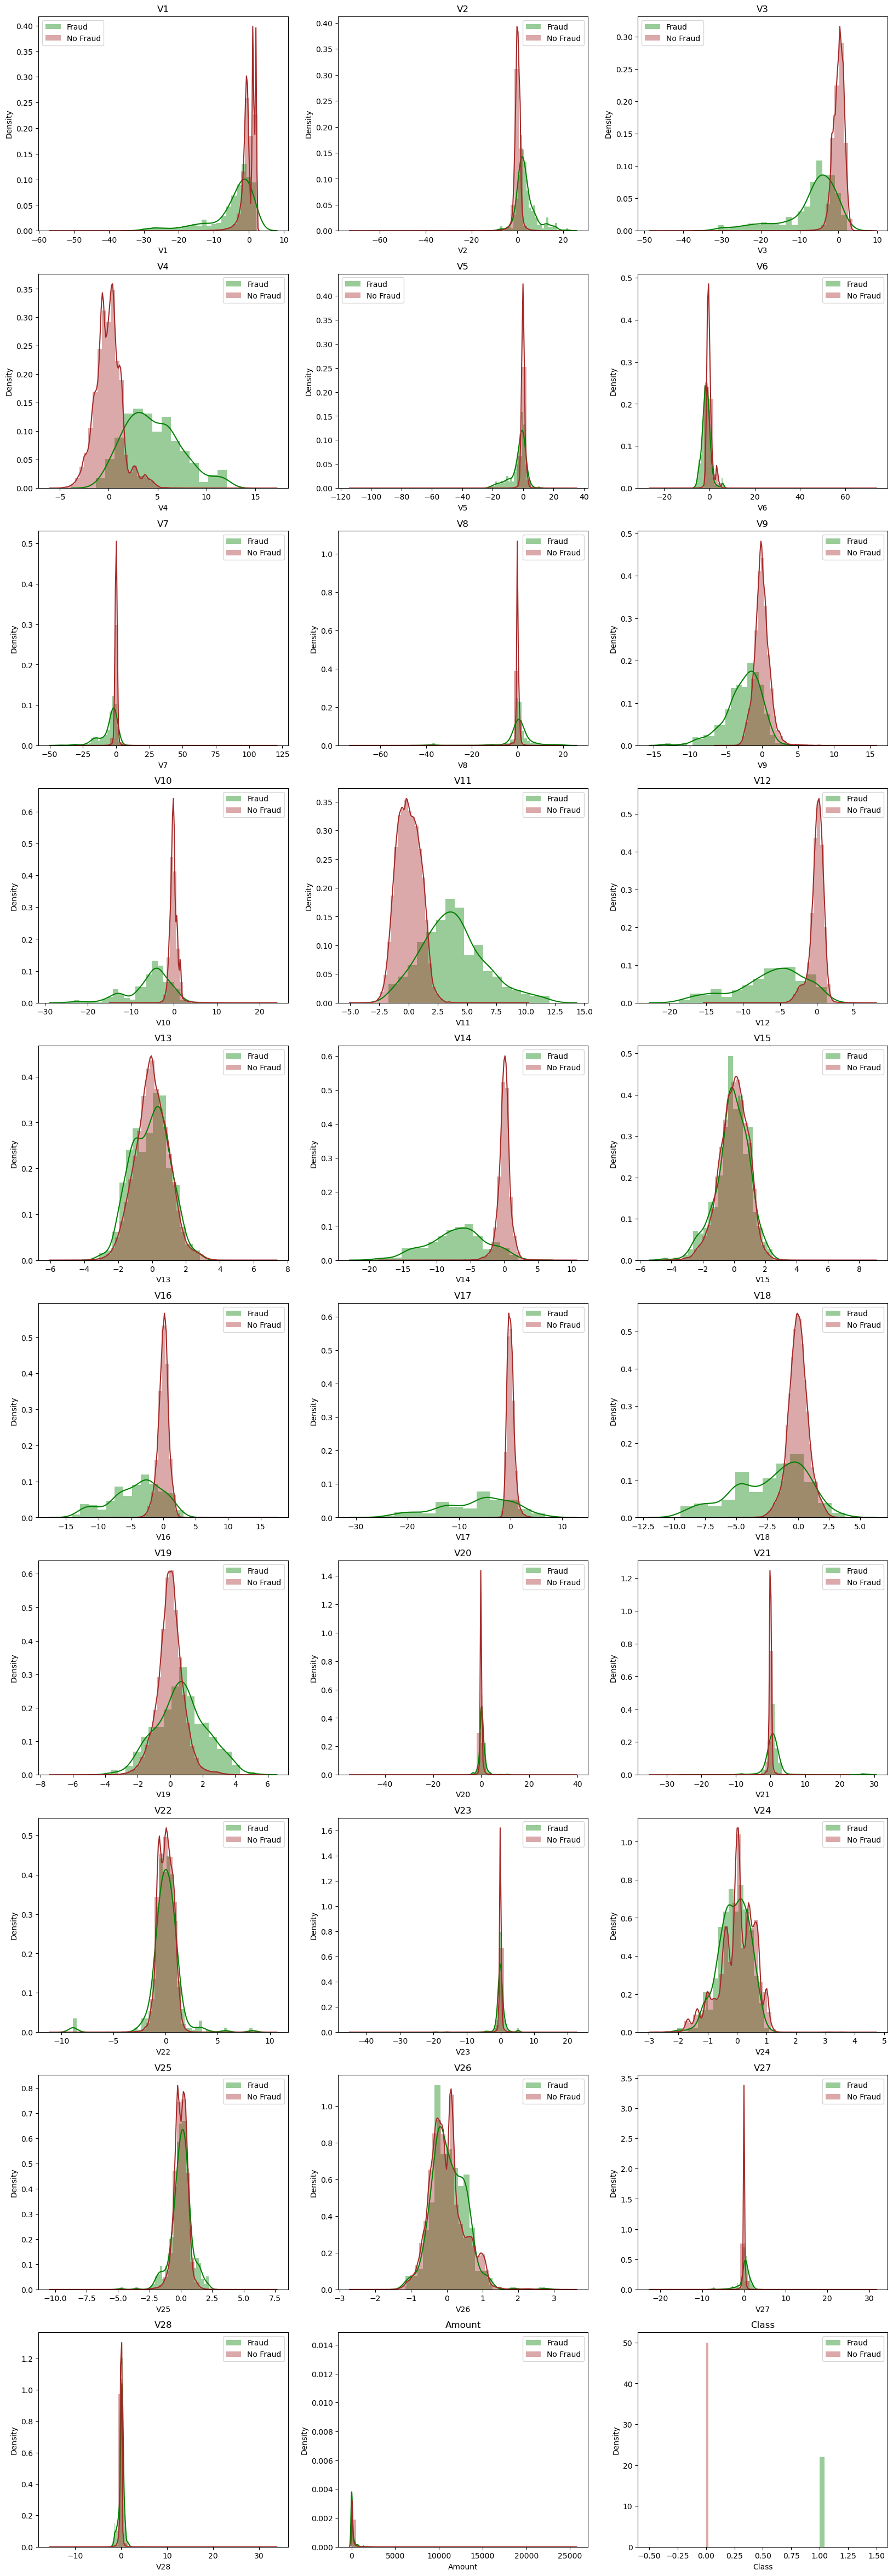

In [37]:
plt.figure(figsize=(20,60))

for i,j in enumerate(col):
    plt.subplot(10,3,i+1)
    sns.distplot(data[j][data.Class==1],color='green',label='Fraud')
    sns.distplot(data[j][data.Class==0],color='brown',label='No Fraud')
    plt.legend()
    plt.title(j)
plt.show()

<b><font color=#FF5733 style = 'font-family:cambria; font-size:18px'> Step 4 : Chooosing A Model & Splitting Into Train Test Split</font><b><br>
 

In [38]:
# importing the libraries
from sklearn.model_selection import train_test_split

In [39]:
# putting all the columns or variables in to X expect the target Variable
X=data.drop(['Class'],axis=1)

In [40]:
# Taking only Target Variable as Input to Y
y=data['Class']

In [41]:
# seeing the data
print("The Shape OF The Data Set Is :",X.shape)
X.head(3)

The Shape OF The Data Set Is : (284807, 33)


V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   

   Amount  Time_day  Time_hours  Time_minutes  time  
0  149.62         0           0             0   0.0  
1    2.69         0           0             0   0.0  
2  378.66         0           0             0   1.0

In [42]:
print('The Shape OF The Data Set is : ', y.shape)
y.head(3)

The Shape OF The Data Set is :  (284807,)


0    0
1    0
2    0
Name: Class, dtype: int64

<b><font color=black style = 'font-family:cambria; font-size:15px'>Splitting The Data Into `Train_Test_split` </font><b>

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [44]:
print('The Shape Of The X_train Is',X_train.shape)
print('The Shape Of The X_test Is',X_test.shape)
print('The Shape Of The y_train Is',y_train.shape)
print('The Shape Of The y_test Is',y_test.shape)

The Shape Of The X_train Is (227845, 33)
The Shape Of The X_test Is (56962, 33)
The Shape Of The y_train Is (227845,)
The Shape Of The y_test Is (56962,)


##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [45]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


<b><font color=black style = 'font-family:cambria; font-size:15px'>Feature Scaling</font><b><br>
    
<font color=brown style = 'font-family:cambria; font-size:15px'>`Feature Scaling` Is Essential In `Data Analysis And Machine Learning` To Ensure That `All Variables Are On A Common Scale`. It Helps Algorithms `Converge Faster` And `Produce More Accurate Results` By Eliminating The Dominance Of Any One Feature. Scaling Is Particularly Crucial For Distance-Based Algorithms, Improving Their Performance And Accuracy </font>
<br>
<font color=brown style = 'font-family:cambria; font-size:15px'> We Need To Scale Only The `Amount,Time_day,hour & minutes` Column As All Other Columns Are Already Scaled By The PCA Transformation.</font>


In [46]:
# importing libraries for feature scaling
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [47]:
scaler=StandardScaler()

<b><font color=black style = 'font-family:cambria; font-size:15px'>Scaling The Train Data</font><b>

In [48]:
X_train[['Amount','Time_day','Time_hours','Time_minutes','time']]  =scaler.fit_transform(X_train[['Amount','Time_day','Time_hours','Time_minutes','time']])

In [49]:
X_train.head(3)

V1        V2        V3        V4        V5        V6        V7  \
265518  1.946747 -0.752526 -1.355130 -0.661630  1.502822  4.024933 -1.479661   
180305  2.035149 -0.048880 -3.058693  0.247945  2.943487  3.298697 -0.002192   
42664  -0.991920  0.603193  0.711976 -0.992425 -0.825838  1.956261 -2.212603   

              V8        V9       V10       V11       V12       V13       V14  \
265518  1.139880  1.406819 -0.157403 -0.113729  0.510277  0.061258 -0.066555   
180305  0.674782  0.045826  0.284864 -0.254903  0.325560 -0.405327  0.721068   
42664  -5.037523  0.000772 -2.009561 -0.386845  1.820161  0.747777  0.122746   

             V15       V16       V17       V18       V19       V20       V21  \
265518  1.328702  0.352514 -0.765670  0.141938 -0.451365 -0.134435  0.076197   
180305 -0.148445 -0.754029 -0.270842 -0.695698 -0.274411 -0.227279  0.038628   
42664  -1.723285  1.123344 -0.724616  0.147255  0.004631  1.280856 -2.798352   

             V22       V23       V24       V25       V26       V27       V28  \
265518  0.297537  0.307915  0.690980 -0.350316 -0.388907  0.077641 -0.032248   
180305  0.228197  0.035542  0.707090  0.512885 -0.471198  0.002520 -0.069002   
42664   0.109526 -0.436530 -0.932803  0.826684  0.913773  0.038049  0.185340   

          Amount  Time_day  Time_hours  Time_minutes      time  
265518 -0.322494  1.015495    1.020452      1.665958  1.411588  
180305 -0.339764  1.015495   -0.694601      0.287492  0.623141  
42664   0.346693 -0.984742   -0.523095     -0.171997 -1.130680

<b><font color=black style = 'font-family:cambria; font-size:15px'>Scaling The Test Data</font><b>

In [50]:
X_test[['Amount','Time_day','Time_hours','Time_minutes','time']]=scaler.transform(X_test[['Amount','Time_day','Time_hours','Time_minutes','time']])

In [51]:
X_test.head(4)

V1        V2        V3        V4        V5        V6        V7  \
263020 -0.674466  1.408105 -1.110622 -1.328366  1.388996 -1.308439  1.885879   
11378  -2.829816 -2.765149  2.537793 -1.074580  2.842559 -2.153536 -1.795519   
147283 -3.576495  2.318422  1.306985  3.263665  1.127818  2.865246  1.444125   
219439  2.060386 -0.015382 -1.082544  0.386019 -0.024331 -1.074935  0.207792   

              V8        V9       V10       V11       V12       V13       V14  \
263020 -0.614233  0.311652  0.650757 -0.857785 -0.229961 -0.199817  0.266371   
11378  -0.250020  3.073504 -1.000418  1.850842 -1.549779  1.252337  0.963974   
147283 -0.718922  1.874046  7.398491  2.081146 -0.064145  0.577556 -2.430201   
219439 -0.338140  0.455091  0.047859 -0.652497  0.750829  0.665603  0.158608   

             V15       V16       V17       V18       V19       V20       V21  \
263020 -0.046544 -0.741398 -0.605617 -0.392568 -0.162648  0.394322  0.080084   
11378  -0.481027 -0.147319 -0.209328  1.058898  0.397057 -0.515765 -0.295555   
147283  1.505993 -1.237941 -0.390405 -1.231804  0.098738  2.034786 -1.060151   
219439  0.027348 -0.171173 -0.291228 -1.008531  0.097040 -0.192024 -0.281684   

             V22       V23       V24       V25       V26       V27       V28  \
263020  0.810034 -0.224327  0.707899 -0.135837  0.045102  0.533837  0.291319   
11378   0.109305 -0.813272  0.042996 -0.027660 -0.910247  0.110802 -0.511938   
147283  0.016867 -0.132058 -1.483996 -0.296011  0.062823  0.552411  0.509764   
219439 -0.639426  0.331818 -0.067584 -0.283675  0.203529 -0.063621 -0.060077   

          Amount  Time_day  Time_hours  Time_minutes      time  
263020 -0.259954  1.015495    1.020452      0.574672  1.387182  
11378  -0.304426 -0.984742   -1.552127      0.057747 -1.580138  
147283 -0.048286  1.015495   -2.409653      0.172619 -0.138120  
219439 -0.347741  1.015495    0.162926     -0.401742  0.986536


<b><font color=brown style = 'font-family:cambria; font-size:18px'>Plotting All The Variables And CHecking Skewness</font><b>

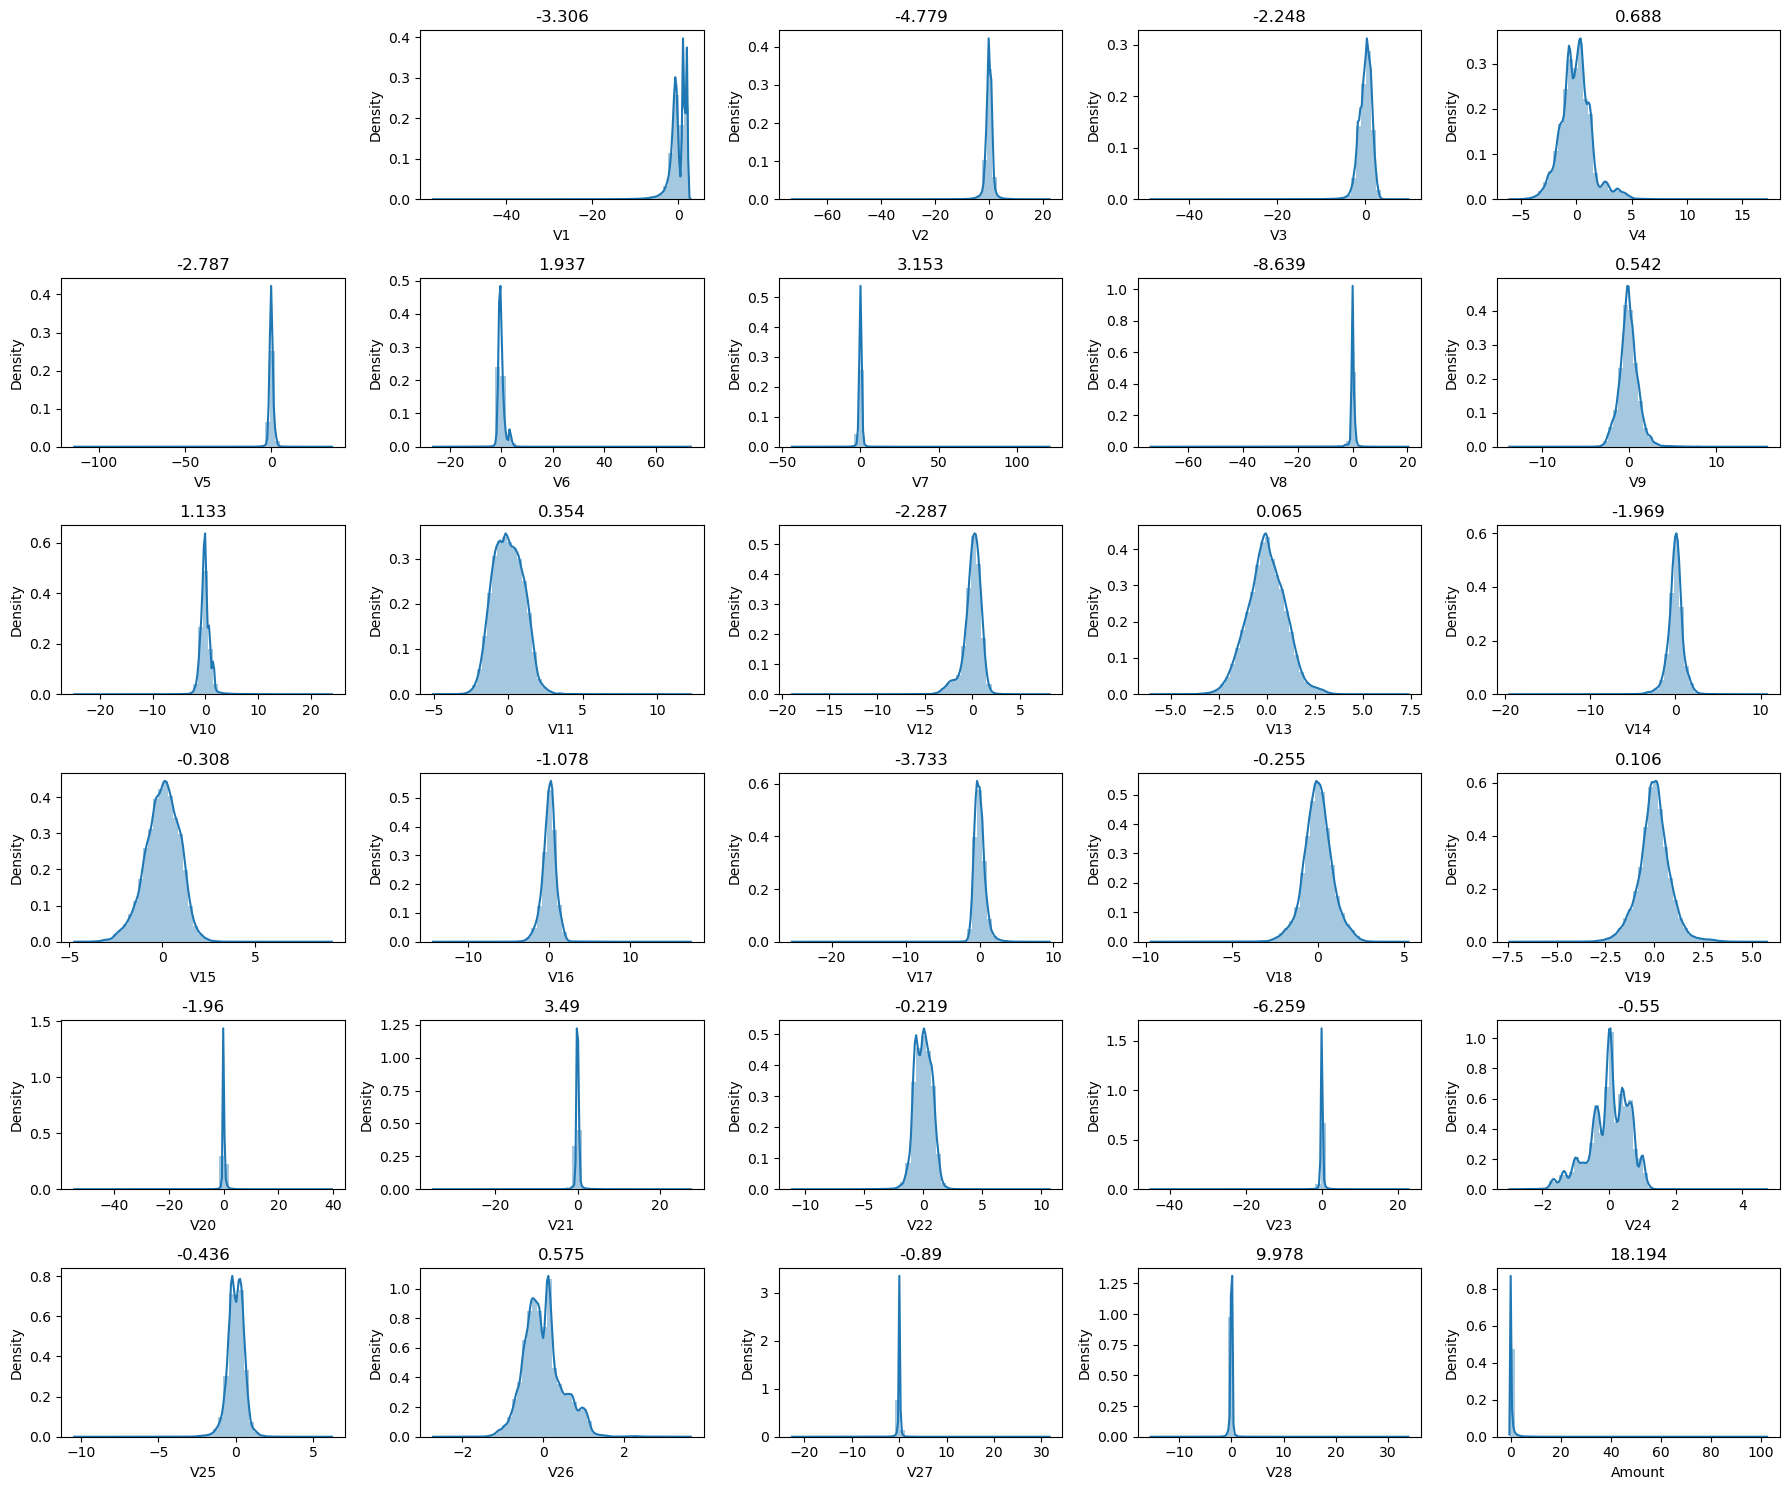

In [52]:
plt.figure(figsize=(18,15))
k=0
for i in col[:-1]:
    k=k+1
    plt.subplot(6,5,k+1)
    sns.distplot(X_train[i])
    plt.tight_layout()
    plt.title( round(X_train[i].skew(), 3))
    
# str(round(X_train[col[:-1]].skew(),3))

<font color=brown style = 'font-family:cambria; font-size:16px'>`Skewness is present in the data` in this way, and we should `try to mitigate it`, as it may `cause problems` during the `model building phase`. We see that there are many variables, which are `heavily skewed`.Therefore we'll be working to mitigate the skewness and transform to them into normal distribution.</font><br>
<font color=green style = 'font-family:cambria; font-size:15px'>If Skewness Is Present In The Data, There Are Several Methods To Address It:</font><br>
    
<font color=black style = 'font-family:cambria; font-size:15px'>1.	Log Transformation </font><br>
<font color=black style = 'font-family:cambria; font-size:15px'>2.	Square Root Transformation </font>    
<font color=black style = 'font-family:cambria; font-size:15px'>3.	Cube Root Transformation </font>   
<font color=black style = 'font-family:cambria; font-size:15px'>4. Box-Cox Transformation </font>      
<font color=black style = 'font-family:cambria; font-size:15px'>5. Yeo-Johnson Transformation </font>    
<font color=black style = 'font-family:cambria; font-size:15px'>6.	Power Transformation </font>        
<font color=black style = 'font-family:cambria; font-size:15px'>7.	Winsorizing</font>            
<font color=black style = 'font-family:cambria; font-size:15px'>8.	Binning/Discretization </font>            
<font color=black style = 'font-family:cambria; font-size:15px'>9.	Square Or Cube Transformation</font>            

<b><font color=black style = 'font-family:cambria; font-size:15px'> Mitigate `skweness` with `PowerTransformer`</font><b>

In [53]:
# importing Power Transformation
from sklearn.preprocessing import PowerTransformer

<font color=brown style = 'font-family:cambria; font-size:15px'> The `Yeo-Johnson transformation` is a `power transformation` that is similar to the `Box-Cox transformation but more flexible`. Both the `Box-Cox and Yeo-Johnson transformations` are used to `stabilize variance and make data more symmetric`. The key difference is that the `Box-Cox transformation is limited to data with strictly positive values`, while the `Yeo-Johnson transformation` can `handle` data with `zero and negative values as well`.</font>




In [54]:
# using Power Transformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)

In [55]:
colums=X_train.columns

In [56]:
# fit and transform the training data
X_train=pt.fit_transform(X_train)

In [57]:
X_train=pd.DataFrame(X_train)
X_train.columns=colums
X_train.head(3)

V1        V2        V3        V4        V5        V6        V7  \
0  1.336188 -0.544845 -0.965606 -0.420795  1.098808  2.530347 -1.195983   
1  1.425774 -0.116737 -1.776576  0.252512  2.186342  2.157106 -0.000786   
2 -0.754387  0.330483  0.399881 -0.685256 -0.605729  1.414925 -1.789942   

         V8        V9       V10       V11       V12       V13       V14  \
0  1.193358  1.254348 -0.106992 -0.066314  0.455748  0.072358 -0.150225   
1  0.641573  0.094536  0.304136 -0.208442  0.208679 -0.399209  0.766264   
2 -3.636030  0.053256 -2.010828 -0.343141  2.650201  0.756416  0.056656   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.531943  0.352829 -0.924246  0.149650 -0.549506 -0.176355  0.122260   
1 -0.219143 -0.892874 -0.359582 -0.834919 -0.329758 -0.296564  0.070475   
2 -1.771940  1.391102 -0.878343  0.156057  0.014625  1.674510 -4.186769   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.393491  0.490592  1.218731 -0.694570 -0.802560  0.182260 -0.090864   
1  0.296106  0.045872  1.252675  0.995295 -1.009446 -0.005501 -0.205597   
2  0.130424 -0.705914 -1.454362  1.664636  1.729490  0.083143  0.579844   

     Amount  Time_day  Time_hours  Time_minutes      time  
0 -0.821003  1.015495    1.071074      1.653578  1.416557  
1 -0.969812  1.015495   -0.766009      0.294660  0.620274  
2  1.560000 -0.984742   -0.617017     -0.164342 -1.129230

In [58]:
X_test=pt.transform(X_test)

In [59]:
X_test=pd.DataFrame(X_test)
X_test.columns=colums
X_test.head(3)

V1        V2        V3        V4        V5        V6        V7  \
0 -0.612888  0.938921 -0.834620 -0.962055  1.013637 -1.082636  1.520661   
1 -1.417126 -1.607494  2.178053 -0.752225  2.109658 -1.976296 -1.451882   
2 -1.640018  1.681809  0.930972  2.077638  0.818726  1.925818  1.165118   

         V8        V9       V10       V11       V12       V13       V14  \
0 -0.637708  0.333154  0.629991 -0.836532 -0.422767 -0.190824  0.219774   
1 -0.315661  2.545286 -0.944518  1.734029 -1.477662  1.253838  1.074516   
2 -0.726155  1.626696  5.803793  1.931559 -0.252102  0.587697 -2.269298   

        V15       V16       V17       V18       V19       V20       V21  \
0 -0.108896 -0.880073 -0.744398 -0.483633 -0.191485  0.511544  0.127609   
1 -0.568004 -0.246254 -0.287403  1.279090  0.494052 -0.669131 -0.398095   
2  1.759210 -1.367173 -0.498489 -1.446112  0.130092  2.669907 -1.512342   

        V22       V23       V24       V25       V26       V27       V28  \
0  1.124534 -0.370722  1.254384 -0.297643  0.187989  1.346559  0.901741   
1  0.130116 -1.292190 -0.025126 -0.091979 -2.204635  0.265540 -1.617581   
2  0.001991 -0.223649 -2.123633 -0.595314  0.224593  1.394731  1.556835   

     Amount  Time_day  Time_hours  Time_minutes      time  
0 -0.337875  1.015495    1.071074      0.579640  1.391846  
1 -0.672664 -0.984742   -1.445945      0.065687 -1.573333  
2  0.765214  1.015495   -2.050938      0.180295 -0.143225

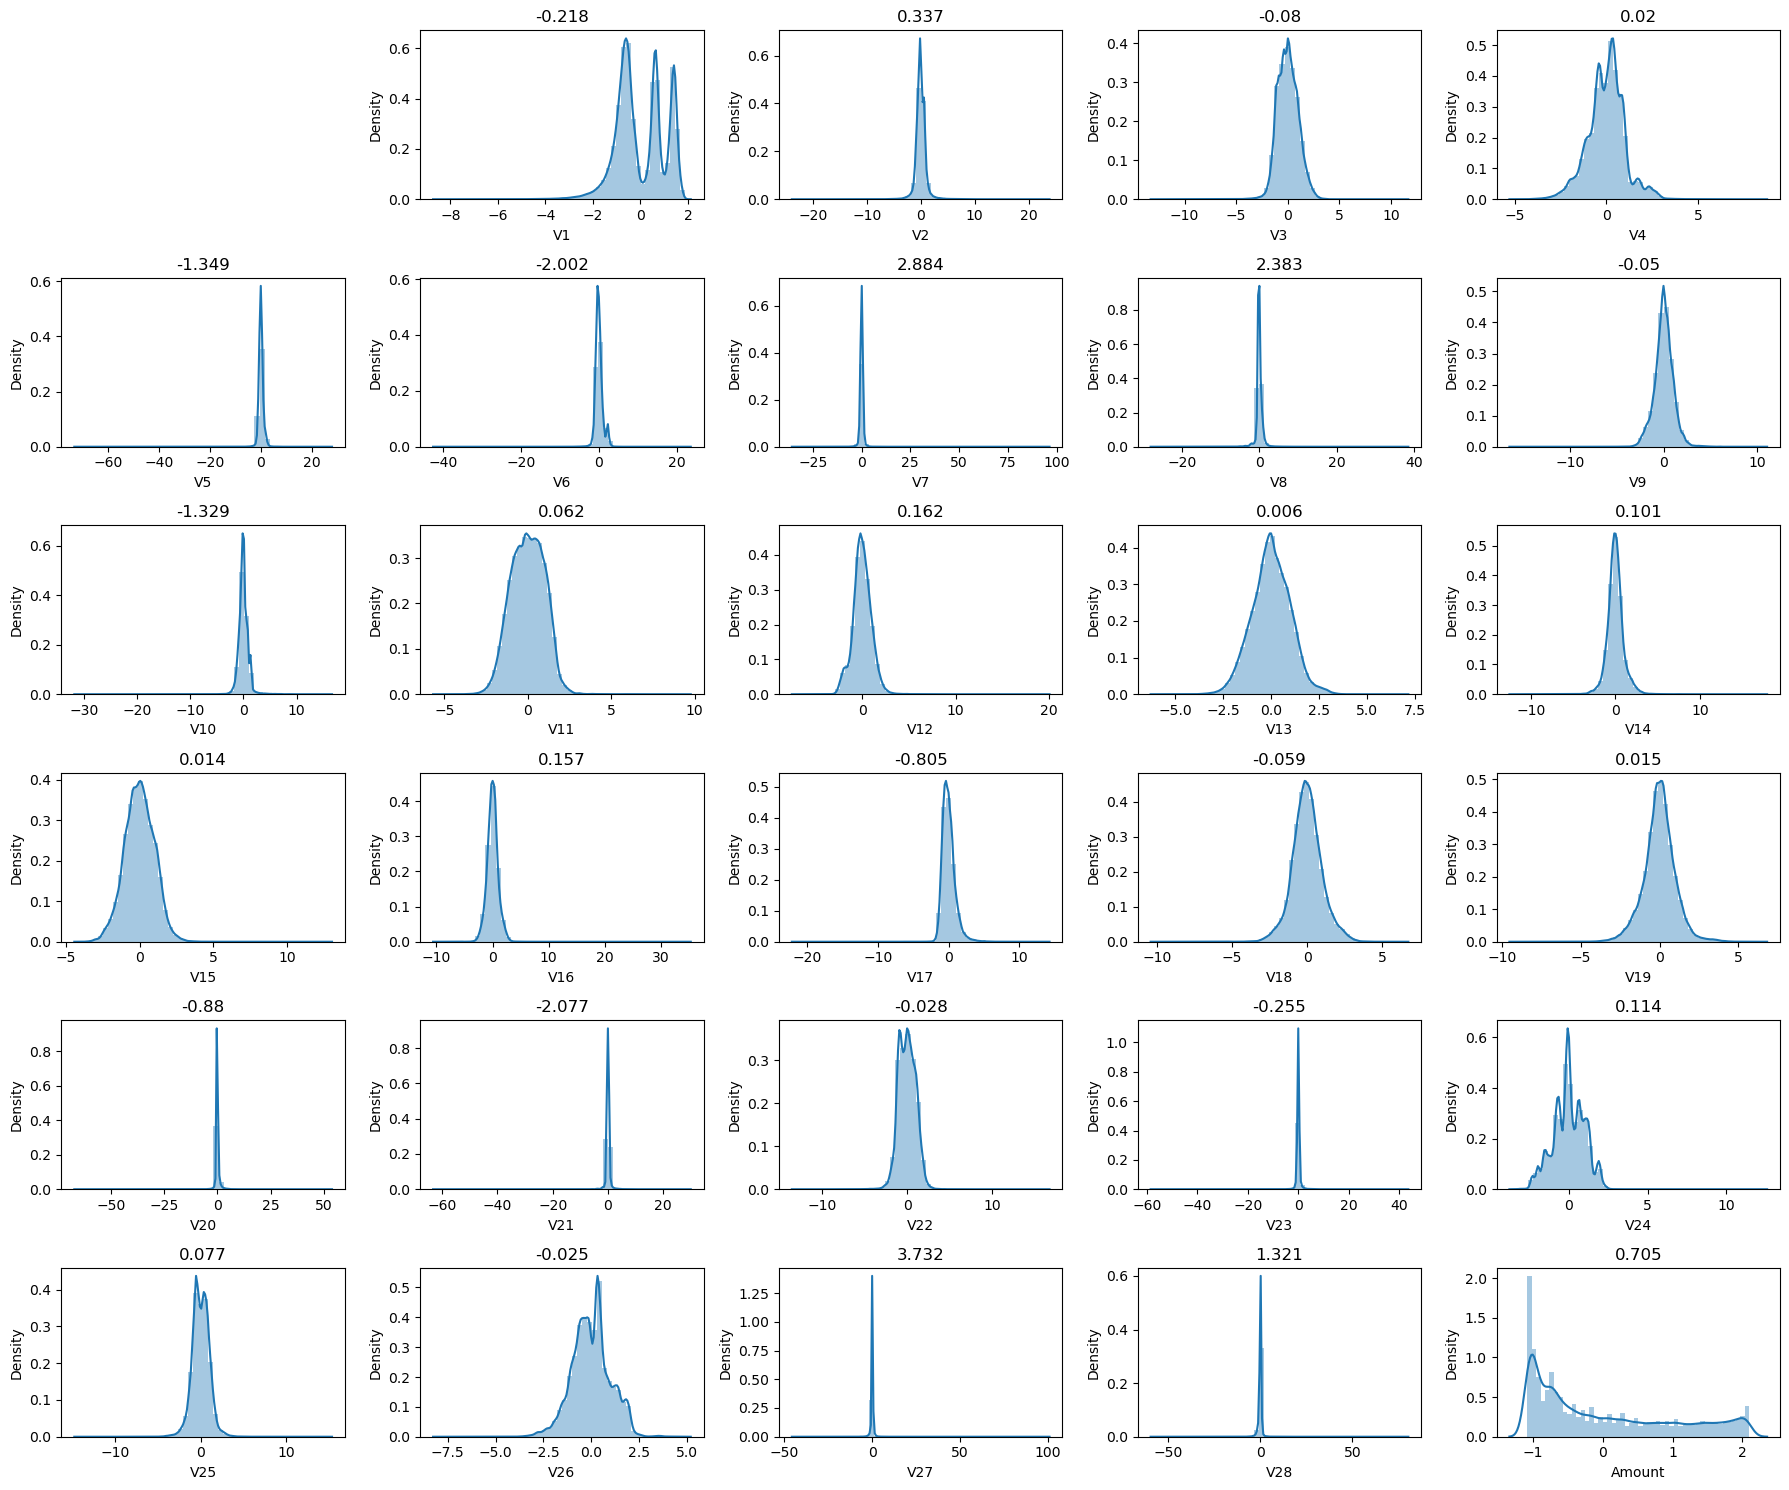

In [60]:
plt.figure(figsize=(18,15))
k=0
for i in col[:-1]:
    k=k+1
    plt.subplot(6,5,k+1)
    sns.distplot(X_train[i])
    plt.tight_layout()
    plt.title( round(X_train[i].skew(), 3))

<font color=brown style = 'font-family:cambria; font-size:15px'>`Skewness Reduction`: Power transformations are often used to `reduce or eliminate skewness` in the data. Skewness represents the lack of symmetry in the data distribution. `After the transformation`, the data `distribution becomes more symmetric`.</font>
    <br>
    
<font color=brown style = 'font-family:cambria; font-size:15px'>`Normalization` : Power transformations can make the data more `closely resemble a normal distribution`. This can be beneficial because many `statistical techniques and machine learning algorithms` assume that the data follows a normal distribution </font>
    
<b><font color=black style = 'font-family:cambria; font-size:15px'> •	As We Observe All The Plots Are Normally Distributed And Now We Can See That All The Variables Seem To Be Normally Distributed After Transformation</font><b>

<font color=red style = 'font-family:cambria; font-size:16px'> As You See The Plot You Will See The Differnece. By Seeing The Image We Not Observe Changes But If We `Check Skew Value` The skew Values `Has Been Decresed` & They Have Moved At The `Normal Distribution`</font>

   
Before Power Transformation|AFter Power Transformation
-|-
<img src='images/before.png' width=850px>|<img src='images/after.png' width=850px>
    
    
Columns|Before Power Transformation|AFter Power Transformation
-|-|-|
V1|-3.306|-0.218
v2|-4.779|0.337
V3|-2.248|-0.08
V4|0.688 |0.02
V5|-2.787|-1.349
|----|
V28|9.978|1.321
Amount|18.194|1.321

<b><font color=black style = 'font-family:Verdana; font-size:20px'>Model selection and understanding:</font><b>
<hr style='height:1px'>   
    
<font color=green style = 'font-family:cambria; font-size:15px'>`Logistic regression` works best when the `data is linearly separable` and needs to be `interpretable`.</font><br>
    
<font color=green style = 'font-family:cambria; font-size:15px'>`KNN is also highly interpretable` but not preferred when you have a `huge amount of data`, as it will `consume a lot of computation` and resource To make the transformation.</font><br>   
<font color=green style = 'font-family:cambria; font-size:15px'>The `decision tree` model is the first choice when you want the output to be intuitive, but they `tend to overfit` if left unchecked. </font><br>
    
<font color=green style = 'font-family:cambria; font-size:15px'>`KNN` is a simple, supervised machine learning algorithm that is used for both `classification and regression tasks`. The k value in KNN should be an odd number because you have to take the majority vote from the nearest neighbours by breaking the ties. </font>
    
<font color=green style = 'font-family:cambria; font-size:15px'>In `Gradient Boosted` machines/trees, newly added trees are trained to `reduce the errors` (loss function) of earlier models.</font>
    
<font color=green style = 'font-family:cambria; font-size:15px'> `XGBoost` is an extended version of gradient boosting, with additional features such as regularisation and parallel tree learning algorithm for finding the best split. </font>

<font color=green style = 'font-family:cambria; font-size:15px'> We `cannot` build  the model `by using KNN` because our Data Set contains 284807 `KNN is Needs more memory power` as the data point increases it should store the data points</font>

<b><font color=green style = 'font-family:Cambria; font-size:20px'> Step 5 : Evaluating Model Performance on Imbalanced Data.</font><b>
<hr style='height:1px'>
    
<b><font color=Black style = 'font-family:Cambria; font-size:17px'>1. Model Building on Imbalanced Data:</font><b><br>

-   <font color=brown style = 'font-family:Cambria; font-size:15px'>When dealing with heavily imbalanced data, where only 0.17% of transactions are fraudulent, it is crucial to choose appropriate evaluation metrics for model assessment.</font>
    
<b><font color=Black style = 'font-family:Cambria; font-size:17px'>2. Inappropriate Use of Accuracy:</font><b>
    <br>
-  <font color=brown style = 'font-family:Cambria; font-size:15px'>Relying Solely On Accuracy As A Performance Measure Is Not Suitable For This Scenario. If The Model Consistently `Predicts One Class (1 Or 0) For All Data Point`s, It Can Achieve A `High Accuracy Of Over 99%`.  If A `Model Is Trained` Solely `Based On Accuracy`, It May Tend To Prioritize The `Majority Class (Non-Fraudulent Transactions)` Because Of The `Class Imbalance`. Consequently, When You `Test The Model`, It Might `Incorrectly Predict That Fraud Did Not Occur`, Even In Cases Where It Did. This Is Why Accuracy Is Not A Suitable Metric For Assessing Model Performance On Imbalanced Data. </font>
    
    
<b><font color=Black style = 'font-family:Cambria; font-size:17px'>3. ROC-AUC Score for Fair Evaluation:</font><b>
    <br>
-  <font color=brown style = 'font-family:Cambria; font-size:15px'>To Address This Issue, We Should Prioritize The ROC-AUC Score For A Fair And Reliable Model Evaluation. This Metric Takes Into Account The Model's Ability To Correctly Identify The Minority Class.</font>
    

<b><font color=Black style = 'font-family:Cambria; font-size:17px'>4. ROC Curve for Model Strength:</font><b>
    <br>
-  <font color=brown style = 'font-family:Cambria; font-size:15px'>The Roc Curve Is A Valuable Tool For Assessing The Model's Performance Across Various Classification Thresholds. It Allows Us To Understand The Model's Strength And Performance Comprehensively.</font>
    
<b><font color=Black style = 'font-family:Cambria; font-size:17px'>5. Optimal Threshold Selection:</font><b>
    <br>
-  <font color=brown style = 'font-family:Cambria; font-size:15px'>Rather Than Relying On The Default Threshold Of 0.5, We Should Identify The Optimal Threshold For Making Classification Decisions. This Threshold Should Maximize The True Positive Rate (TPR) While Minimizing The False Positive Rate (FPR), Resulting In Fewer Misclassifications.</font>
    
    
<b><font color=Black style = 'font-family:Cambria; font-size:17px'>6. F1 Score for Precision and Recall:</font><b>
    <br>
-  <font color=brown style = 'font-family:Cambria; font-size:15px'>After Determining The Optimal Threshold, We Can Calculate The F1 Score Of The Classifier. This Score Provides A Balanced Measure Of Precision And Recall At The Selected Threshold, Ensuring A More Reliable Assessment Of The Model's Performance.</font>

<center><b><font color=black style = 'font-family:cambria; font-size:25px'> Logistic Regression</font><b><center>

In [61]:
# importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,f1_score,classification_report
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV,RandomizedSearchCV


<font color="black " style ="font-family:Cambria ;font-size:18px"><b> HYPERPARAMETER TUINING </b></font><br>
<font color=green style = 'font-family:cambria; font-size:15px'>Hyperparameter Tuning, Also Known As Hyperparameter Optimization, Is The Process Of Finding The Best Set Of External Configurations For A Machine Learning Model. These External Configurations, Called Hyperparameters, Are Not Learned From The Training Data But Are Set Before The Training Process Begins. The Goal Of Hyperparameter Tuning Is To Improve The Performance Of A Machine Learning Model By Adjusting These Hyperparameters..</font>
<br>

<font color=brown style = 'font-family:cambria; font-size:15px'>`1 Hyperparameters` : These Are External Configurations That Are Set Before The Training Process. Examples Include Learning Rate, Batch Size, Regularization Strength, Number Of Hidden Layers, And Other Parameters That Influence The Model's Training And Structure.</font>

<font color=brown style = 'font-family:cambria; font-size:15px'> `2. Search Space` : Hyperparameter Tuning Involves Defining A Search Space, Which Is The Range Of Possible Values For Each Hyperparameter. The Search Space Is Where The Optimization Algorithms Look For The Best Combination Of Hyperparameters</font>

<font color=brown style = 'font-family:cambria; font-size:15px'>`3. Optimization Algorithms` : There Are Various Methods For Finding The Optimal Set Of Hyperparameters. Two Common Approaches Are: </font><br>
- <font color=brown style = 'font-family:cambria; font-size:15px'>`3.1 Grid Search`: It Exhaustively Searches Through A Predefined Set Of Hyperparameter Combinations.</font>
- <font color=brown style = 'font-family:cambria; font-size:15px'>`3.2 Random Search` : It Randomly Samples Hyperparameter Combinations From The Defined Search Space.</font><br>

<font color=brown style = 'font-family:cambria; font-size:15px'>`4. Cross-Validation` : To Assess The Performance Of Different Hyperparameter Configurations, Cross-Validation Is Often Used. This Involves Splitting The Dataset Into Multiple Subsets, Training The Model On Some Of Them, And Evaluating On The Remaining Subset. This Process Is Repeated, And The Average Performance Is Used To Compare Different Hyperparameter Settings</font>

<font color=brown style = 'font-family:cambria; font-size:15px'>`5.Objective Function` : The Objective Function Is A Metric Used To Evaluate The Performance Of The Model With A Particular Set Of Hyperparameters. Common Metrics Include Accuracy, Precision, Recall, Or Any Other Relevant Measure Depending On The Nature Of The Problem.</font>

<font color=brown style = 'font-family:cambria; font-size:15px'>`6. Trade-Offs` : Adjusting Hyperparameters Often Involves Trade-Offs. For Example, Increasing Model Complexity May Improve Training Performance But Could Lead To Overfitting.</font>

<font color=brown style = 'font-family:cambria; font-size:15px'>`7 Final Evaluation` : After Hyperparameter Tuning, The Final Model's Performance Is Evaluated On A Separate Test Set To Estimate Its Generalization Performance.</font>

<font color=black style = 'font-family:cambria; font-size:15px'>Hyperparameter Tuning Is An Essential Step In The Machine Learning Model Development Process, As It Can Significantly Impact A `Model's Effectiveness` And `Efficiency` In Solving A Particular Task.</font>

In [62]:
# creating k fold with 5 splits
folds = KFold(n_splits=5, random_state=4, shuffle=True)

# Specifying score as recall as we are more focused on achieving higher sensitivity
params = {'C': [0.01, 0.1, 1, 10, 100, 1000]}

# Using 'recall' as the scoring metric
model_cv = GridSearchCV(estimator=LogisticRegression(), 
                        param_grid=params, 
                        scoring='recall',  # Use 'recall' as the scoring metric
                        cv=folds, 
                        verbose=1, 
                        return_train_score=True)

In [63]:
# fitting the model
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

<img src='images/logistic _adasyn.png' width=400px>

In [64]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results.head(3)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       1.099552      0.102974         0.043191        0.008615    0.01   
1       1.671008      0.175323         0.048711        0.008928     0.1   
2       2.132503      0.251954         0.046295        0.006497       1   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.635294           0.662338           0.589041   
1   {'C': 0.1}           0.670588           0.675325           0.643836   
2     {'C': 1}           0.670588           0.714286           0.643836   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0             0.5500           0.620253         0.611385        0.038766   
1             0.5875           0.645570         0.644564        0.031245   
2             0.6000           0.645570         0.654856        0.037407   

   rank_test_score  split0_train_score  split1_train_score  \
0                6            0.614887            0.621451   
1                5            0.650485            0.662461   
2                4            0.660194            0.668770   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.641745            0.611465            0.590476   
1            0.663551            0.652866            0.641270   
2            0.676012            0.659236            0.650794   

   mean_train_score  std_train_score  
0          0.616005         0.016527  
1          0.654127         0.008227  
2          0.663001         0.008645

In [65]:
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [66]:
cv_results[['param_C','rank_test_score','mean_train_score','mean_test_score']]

param_C  rank_test_score  mean_train_score  mean_test_score
0    0.01                6          0.616005         0.611385
1     0.1                5          0.654127         0.644564
2       1                4          0.663001         0.654856
3      10                3          0.665557         0.657387
4     100                1          0.665543         0.657627
5    1000                1          0.666817         0.657627

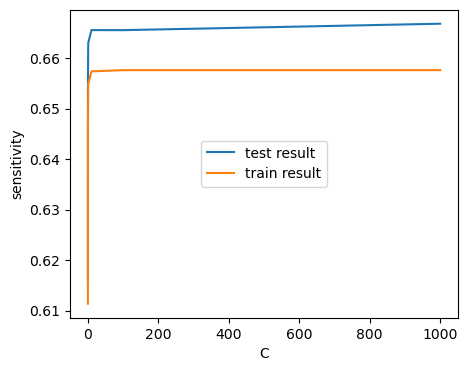

In [67]:
plt.figure(figsize=(5,4))
plt.plot(cv_results['param_C'],cv_results['mean_train_score'])
plt.plot(cv_results['param_C'],cv_results['mean_test_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='center')
# plt.xscale('log')
plt.show()

In [68]:
# best score
best_score=model_cv.best_score_
# best params
best_params=model_cv.best_params_

In [69]:
print(f"The Best Score Is {best_score}")
print(f"The Best Params Is {best_params}")

The Best Score Is 0.657627208851288
The Best Params Is {'C': 100}



<font color="black " style ="font-family:Cambria ;font-size:18px"><b> Logistic Regression With Optimal  Value That Is `c=100` </b></font><br>


In [70]:
logistic_=LogisticRegression(C=100)

In [71]:
# fiitting the model on train set
logistic_model1=logistic_.fit(X_train,y_train)


<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Prediction  On Train set Using `Logistic Regression`  </b></font><br>


In [72]:
y_train_pred_logistic=logistic_model1.predict(X_train)


<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Confusion Metrix For `Logistic Regression`  </b></font><br>


In [73]:
confusion_matrix_logistic_train=metrics.confusion_matrix(y_train,y_train_pred_logistic)

In [74]:
confusion_matrix_logistic_train

array([[227427,     24],
       [   132,    262]], dtype=int64)

In [75]:
TN = confusion_matrix_logistic_train[0,0] # True negative
FP = confusion_matrix_logistic_train[0,1] # False positive
FN = confusion_matrix_logistic_train[1,0] # False negative
TP = confusion_matrix_logistic_train[1,1] # True positive

In [76]:
def calculation_metrics(TN,FP,FN,TP,):
    c=TP / float(TP+FN)
    print('The Sensitivity  is :' ,c)
    
    d=TN / float(TN+FP)
    print('The Specificity  is :',d)
    
    
calculation_metrics(TN,FP,FN,TP)

The Sensitivity  is : 0.6649746192893401
The Specificity  is : 0.999894482767717


In [77]:
accuracy=metrics.accuracy_score(y_train,y_train_pred_logistic)
print('The Accuracy of Logistic Regression For Train is :',accuracy)
    
F1_score=metrics.f1_score(y_train,y_train_pred_logistic)
print("The F1-score of Logistic Regression For Train is :", F1_score)

The Accuracy of Logistic Regression For Train is : 0.9993153240141324
The F1-score of Logistic Regression For Train is : 0.7705882352941177


Logistic Regression|Train Results
-|-
Sensitivity | 0.66
Specificity| 0.9998
Accuracy | 0.9998
F1-score | 0.764

In [78]:
# classificatino report
print(classification_report(y_train,y_train_pred_logistic))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.92      0.66      0.77       394

    accuracy                           1.00    227845
   macro avg       0.96      0.83      0.89    227845
weighted avg       1.00      1.00      1.00    227845



In [79]:
# predicted probability
y_train_pred_logistic_proba=logistic_model1.predict_proba(X_train)[:,1]


<font color="black " style ="font-family:Cambria ;font-size:18px"><b>`ROC_AUC` Curve on Training set For `Logistic Regression`  </b></font><br>


In [80]:
def draw_roc_curve(actual,probas):
    fpr,tpr,thresholds=metrics.roc_curve(actual,probas,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,probas)
#     plt.figure(figsize=(5,3))
    plt.plot(fpr,tpr,label='Roc curve (Area=%0.2f)'%auc_score)
    plt.plot((0,1))
    
#     -------------------------------
    plt.title('ROC CURVE',fontdict={'size':10,'color':'brown'})
    plt.xlim([-0.05,1.2])
    plt.ylim([0.0,1.2])
    plt.xlabel('FALSE POSITIVE RATE',fontdict={'size':10,'color':'red'})
    plt.ylabel('TRUE POSITIVE RATE',fontdict={'size':10,'color':'red'})
    plt.legend(loc='upper left')
    
    
    return


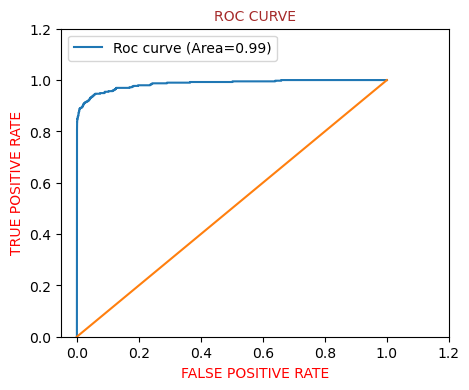

In [81]:
plt.figure(figsize=(5,4))
draw_roc_curve(y_train,y_train_pred_logistic_proba)

<b><font color=black style = 'font-family:cambria; font-size:15px'>Let's Do Predictions On The `Test Set` </font><b>

In [82]:
y_test_pred_logistic=logistic_model1.predict(X_test)

In [83]:
y_test_pred_logistic_proba=logistic_model1.predict_proba(X_test)[:,1]

In [84]:
confusion_matrix_logistic_test=confusion_matrix(y_test,y_test_pred_logistic)
confusion_matrix_logistic_test

array([[56851,    13],
       [   30,    68]], dtype=int64)

In [85]:
TN = confusion_matrix_logistic_test[0,0] # True negative
FP = confusion_matrix_logistic_test[0,1] # False positive
FN = confusion_matrix_logistic_test[1,0] # False negative
TP = confusion_matrix_logistic_test[1,1] # True positive

In [86]:
calculation_metrics(TN, FP, FN, TP)

The Sensitivity  is : 0.6938775510204082
The Specificity  is : 0.9997713843556556


In [87]:
accuracy=metrics.accuracy_score(y_test,y_test_pred_logistic)
print('The Accuracy of Logistic Regression For Test is :',accuracy)
    
F1_score=metrics.f1_score(y_test,y_test_pred_logistic)
print("The F1-score of Logistic Regression For Test is :", F1_score)

The Accuracy of Logistic Regression For Test is : 0.9992451107756047
The F1-score of Logistic Regression For Test is : 0.759776536312849



<font color="black " style ="font-family:Cambria ;font-size:18px"><b>`ROC_AUC` Curve on Test set For `Logistic Regression`  </b></font><br>


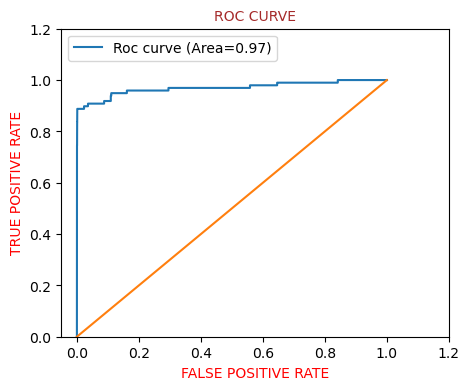

In [88]:
plt.figure(figsize=(5,4))
draw_roc_curve(y_test,y_test_pred_logistic_proba)

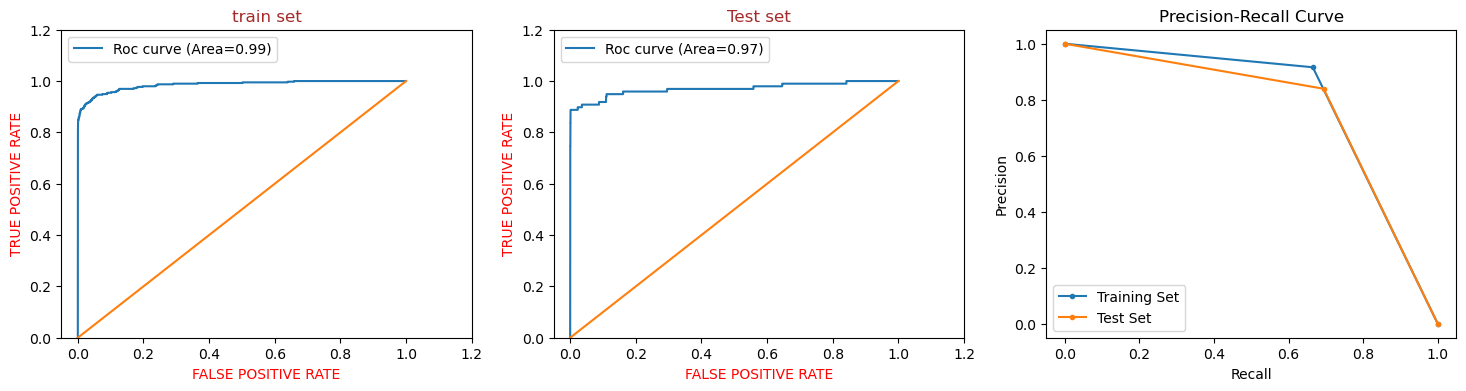

In [89]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
draw_roc_curve(y_train,y_train_pred_logistic_proba)
plt.title('train set')

plt.subplot(1,3,2)
draw_roc_curve(y_test,y_test_pred_logistic_proba)
plt.title('Test set')


plt.subplot(1,3,3)

# Calculate Precision-Recall for Training Set
precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_pred_logistic)

# Calculate Precision-Recall for Test Set
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_pred_logistic)



# Plotting Precision-Recall Curve for both Training and Test Sets
plt.plot(recall_train, precision_train, label='Training Set', marker='.')
plt.plot(recall_test, precision_test, label='Test Set', marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

plt.show()


<b><font color=black style = 'font-family:cambria; font-size:15px'> OverAll Model Summary OF `Logistic Regression` </font><b>
<table>
<tr><th>Logistic Regression </th></tr>
<tr><td>

Logistic Regression|Train Results|Test Result
-|-|-
Sensitivity | 0.66|0.693
Specificity| 0.9998|0.999
Accuracy | 0.9998|0.999
F1-score | 0.764|0.76|
Roc Curve|0.986|0.97

</td>
    
    


<center><b><font color=black style = 'font-family:cambria; font-size:25px'> XG Boost</font><b><center>

In [90]:
# importing Libraries
# !pip install xgboost
from xgboost import XGBClassifier

In [91]:
folds=3  #creating a KFold object
param_grid={'learning_rate':[0.2,0.6,0.8],'subsample':[0.3,0.6,0.9]}

# model creating
xgb_model=XGBClassifier(max_depth=2,n_estimators=200)


In [92]:
model_cv=GridSearchCV(estimator=xgb_model,
                      param_grid=param_grid,cv=folds,
                      scoring='roc_auc',verbose=1,return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6, 0.8],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

<img src='images/1.png' width=450px>

In [93]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results.head(3)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.540461      0.552687         0.179081        0.011396   
1       4.038685      0.102253         0.147915        0.043075   
2       4.033632      0.216067         0.173244        0.026129   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   
2                 0.2             0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.983023   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.975055   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.975834   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.971188           0.986395         0.980202        0.006521   
1           0.979380           0.990558         0.981664        0.006532   
2           0.983065           0.990092         0.982997        0.005821   

   rank_test_score  split0_train_score  split1_train_score  \
0                3            0.999776            0.999787   
1                2            0.999953            0.999956   
2                1            0.999946            0.999826   

   split2_train_score  mean_train_score  std_train_score  
0            0.999797          0.999787         0.000008  
1            0.999940          0.999950         0.000007  
2            0.999856          0.999876         0.000051

In [94]:
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_learning_rate', 'param_subsample', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [95]:
cv_results[['param_learning_rate', 'param_subsample','rank_test_score','mean_train_score','mean_test_score']]

param_learning_rate param_subsample  rank_test_score  mean_train_score  \
0                 0.2             0.3                3          0.999787   
1                 0.2             0.6                2          0.999950   
2                 0.2             0.9                1          0.999876   
3                 0.6             0.3                9          0.999992   
4                 0.6             0.6                6          1.000000   
5                 0.6             0.9                4          1.000000   
6                 0.8             0.3                8          0.999979   
7                 0.8             0.6                5          1.000000   
8                 0.8             0.9                7          1.000000   

   mean_test_score  
0         0.980202  
1         0.981664  
2         0.982997  
3         0.964514  
4         0.973377  
5         0.979241  
6         0.966180  
7         0.974016  
8         0.971684

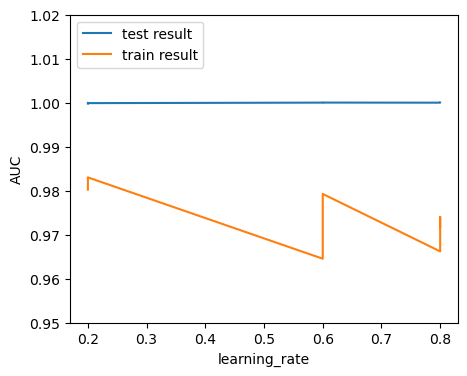

In [96]:
plt.figure(figsize=(5,4))
plt.plot(cv_results['param_learning_rate'],cv_results['mean_train_score'])
plt.plot(cv_results['param_learning_rate'],cv_results['mean_test_score'])
plt.xlabel('learning_rate')
plt.ylabel('AUC')
plt.legend(['test result', 'train result'], loc='upper left')
plt.ylim(0.95,1.02)
plt.show()

# plt.xscale('log')

In [97]:
print(f"The Best params Is {model_cv.best_params_}")
print(f"The Best score Is {model_cv.best_score_}")

The Best params Is {'learning_rate': 0.2, 'subsample': 0.9}
The Best score Is 0.9829970153854065



<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Choosing Best Parameter For  `XGBoost`  </b></font><br>


In [98]:
# chosen hyperparameters
# 'objective':'binary:logistic' which outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}



In [99]:
# fit model on training data
xgb_model1 = XGBClassifier(params = params)
xgb_model1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

<img src='images/1.png' width=400px>

Top var = 14
2nd Top var = 10
3rd Top var = 7


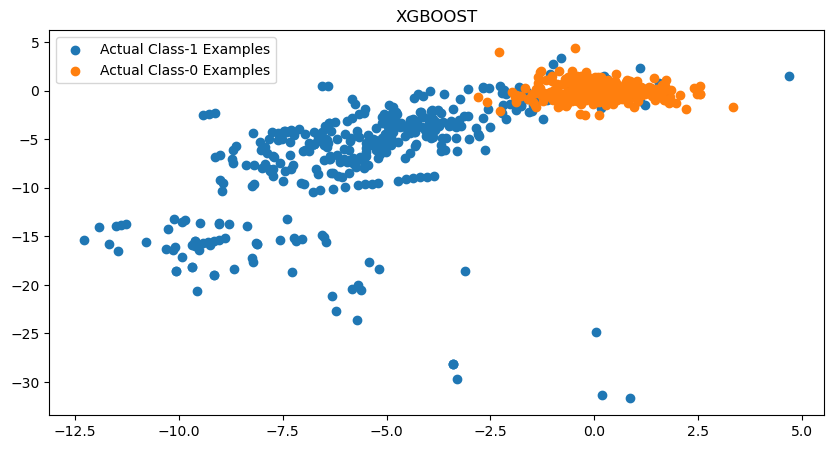

In [100]:
var_imp = []
for i in xgb_model1.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_model1.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_model1.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_model1.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_model1.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_model1.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.title('XGBOOST')
plt.legend()
plt.show()


<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Prediction  On Train set Using `XGBoost`  </b></font><br>


In [101]:
y_train_pred_xgboost=xgb_model1.predict(X_train)


<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Confusion Metrix For XGBoost `Train Case`</b></font><br>


In [102]:
confusion_matrix_xgboost_train=metrics.confusion_matrix(y_train,y_train_pred_xgboost)

In [103]:
confusion_matrix_xgboost_train

array([[227451,      0],
       [     0,    394]], dtype=int64)

In [104]:
TN = confusion_matrix_xgboost_train[0,0] # True negative
FP = confusion_matrix_xgboost_train[0,1] # False positive
FN = confusion_matrix_xgboost_train[1,0] # False negative
TP = confusion_matrix_xgboost_train[1,1] # True positive

In [105]:
calculation_metrics(TN, FP, FN, TP)

The Sensitivity  is : 1.0
The Specificity  is : 1.0


In [106]:
print('The Accurays For The Train Set Of Xgboost is ',metrics.accuracy_score(y_train,y_train_pred_xgboost))
print('The F1-Score For The Train Set Of Xgboost is ',metrics.f1_score(y_train,y_train_pred_xgboost))

The Accurays For The Train Set Of Xgboost is  1.0
The F1-Score For The Train Set Of Xgboost is  1.0


In [107]:
# classificatino report
print(classification_report(y_train,y_train_pred_xgboost))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



In [108]:
# predicted probability
y_train_pred_xgboost_proba=xgb_model1.predict_proba(X_train)[:,1]


<font color="black " style ="font-family:Cambria ;font-size:18px"><b>`ROC_AUC` Curve on Training set For `XGBoost`  </b></font><br>


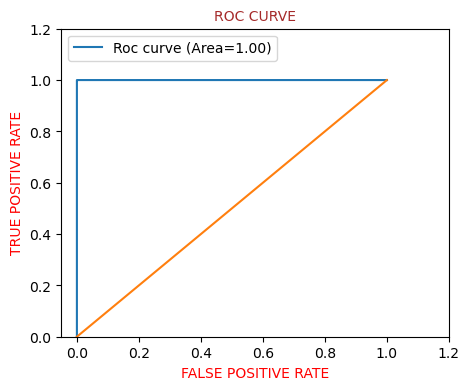

In [109]:
plt.figure(figsize=(5,4))

draw_roc_curve(y_train,y_train_pred_xgboost_proba)

<b><font color=black style = 'font-family:cambria; font-size:18px'>Let's Do Predictions On The `Test Set` </font><b>

In [110]:
y_test_pred_xgboost=xgb_model1.predict(X_test)

In [111]:
y_test_pred_xgboost_proba=xgb_model1.predict_proba(X_test)[:,1]


<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Confusion Metrix For XGBoost `Test Case`  </b></font><br>


In [112]:
confusion_matrix_xgboost_test=confusion_matrix(y_test,y_test_pred_xgboost)
confusion_matrix_xgboost_test

array([[56856,     8],
       [   18,    80]], dtype=int64)

In [113]:
TN = confusion_matrix_xgboost_test[0,0] # True negative
FP = confusion_matrix_xgboost_test[0,1] # False positive
FN = confusion_matrix_xgboost_test[1,0] # False negative
TP = confusion_matrix_xgboost_test[1,1] # True positive

In [114]:
calculation_metrics(TN, FP, FN, TP)

The Sensitivity  is : 0.8163265306122449
The Specificity  is : 0.9998593134496342


In [115]:
accuracy=metrics.accuracy_score(y_test,y_test_pred_xgboost)
print('The Accuracy of XG Boost For Test is :',accuracy)
    
F1_score=metrics.f1_score(y_test,y_test_pred_xgboost)
print("The F1-score of XG Boost For Test is :", F1_score)

The Accuracy of XG Boost For Test is : 0.9995435553526912
The F1-score of XG Boost For Test is : 0.8602150537634408



<font color="black " style ="font-family:Cambria ;font-size:18px"><b>`ROC_AUC` Curve on Test set For `XGBoost`  </b></font><br>


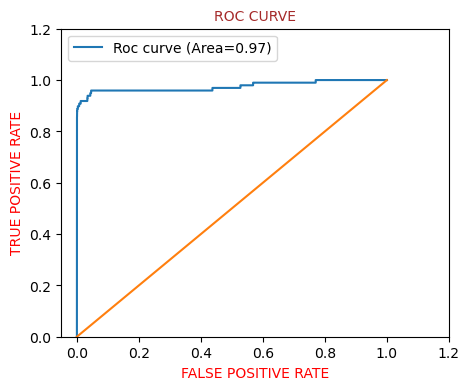

In [116]:
plt.figure(figsize=(5,4))
draw_roc_curve(y_test,y_test_pred_xgboost_proba)

In [117]:
from sklearn.model_selection import learning_curve

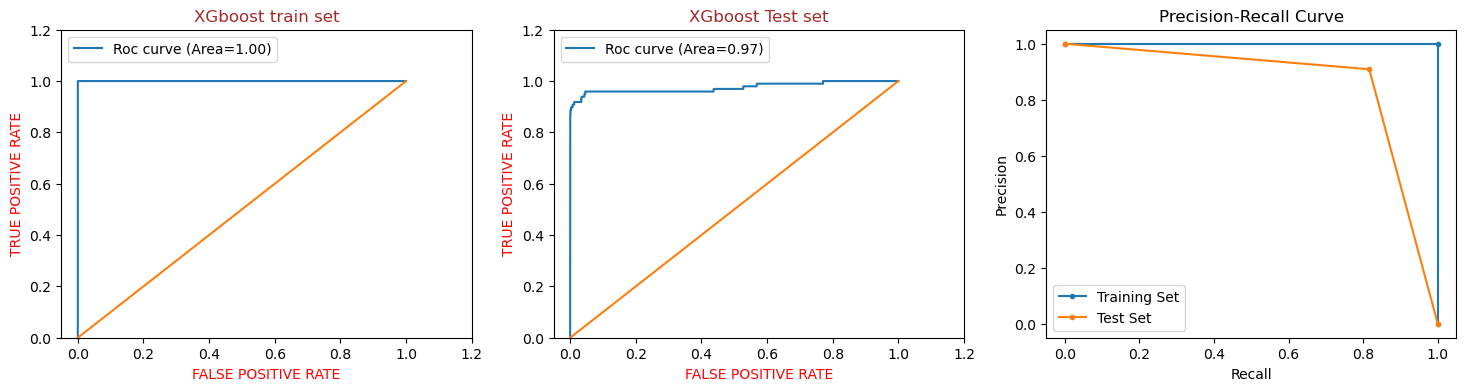

In [118]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
draw_roc_curve(y_train,y_train_pred_xgboost_proba)

plt.title('XGboost train set')

plt.subplot(1,3,2)
draw_roc_curve(y_test,y_test_pred_xgboost_proba)
plt.title('XGboost Test set')

plt.subplot(1,3,3)
# Calculate Precision-Recall for Training Set
precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_pred_xgboost)

# Calculate Precision-Recall for Test Set
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_pred_xgboost)

# size
# plt.figure(figsize=(5,3))

# Plotting Precision-Recall Curve for both Training and Test Sets
plt.plot(recall_train, precision_train, label='Training Set', marker='.')
plt.plot(recall_test, precision_test, label='Test Set', marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
plt.show()

<b><font color=black style = 'font-family:cambria; font-size:15px'> OverAll Model Summary OF `XGBoost` </font><b>
<table>
<tr><th>XGBoost </th></tr>
<tr><td>

XG Boost|Train Results|Test Result
-|-|-
Sensitivity | 1|0.816
Specificity| 1|0.999
Accuracy | 1|0.999
F1-score | 1|0.86
Roc Curve|1|0.97

</td>
    

<center><b><font color=black style = 'font-family:cambria; font-size:25px'> Decision Trees </font><b><center>

In [119]:
# Importing libraries 
from sklearn.tree import DecisionTreeClassifier

In [120]:
# Create the parameter grid 

start_time = time.time()


param_grid = {
    'criterion': ['gini'],
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(20, 70, 10),
    'min_samples_split': range(20, 70, 10),
}


#  Instantiate the grid search model
dtree = DecisionTreeClassifier()

model_cv = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
model_cv.fit(X_train,y_train)


end_time = time.time()



elapsed_time_seconds = end_time - start_time

# Convert elapsed time to minutes
elapsed_time_minutes = elapsed_time_seconds / 60

print(f"Elapsed Time (Minutes): {elapsed_time_minutes:.2f}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Elapsed Time (Minutes): 57.72


In [121]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results.head(3)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      16.121783      0.109951         0.076460        0.022513   
1      15.736626      0.282314         0.057957        0.010349   
2      15.594334      0.121556         0.049992        0.000830   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               5                     20   
1            gini               5                     20   
2            gini               5                     20   

  param_min_samples_split                                             params  \
0                      20  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
1                      30  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
2                      40  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   

   split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
0           0.901446           0.904489           0.931215         0.912383   
1           0.893870           0.904524           0.931206         0.909867   
2           0.901448           0.896872           0.931181         0.909834   

   std_test_score  rank_test_score  
0        0.013374               40  
1        0.015704               43  
2        0.015210               45

In [122]:
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_max_depth', 'param_min_samples_leaf',
       'param_min_samples_split', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [123]:
print(f"The Best params Is {model_cv.best_params_}")
print(f"The Best score Is {model_cv.best_score_}")

The Best params Is {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 40}
The Best score Is 0.9367297748389166



<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Choosing Best Parameters For `Decision Trees`  </b></font><br>


In [124]:
dtree_model1=DecisionTreeClassifier(random_state=100,criterion='gini',max_depth=10,min_samples_leaf=20,min_samples_split=30)

In [125]:
dtree_model1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=30,
                       random_state=100)

<img src='images/2.png' width=650px>

Top var = 17
2nd Top var = 14
3rd Top var = 12


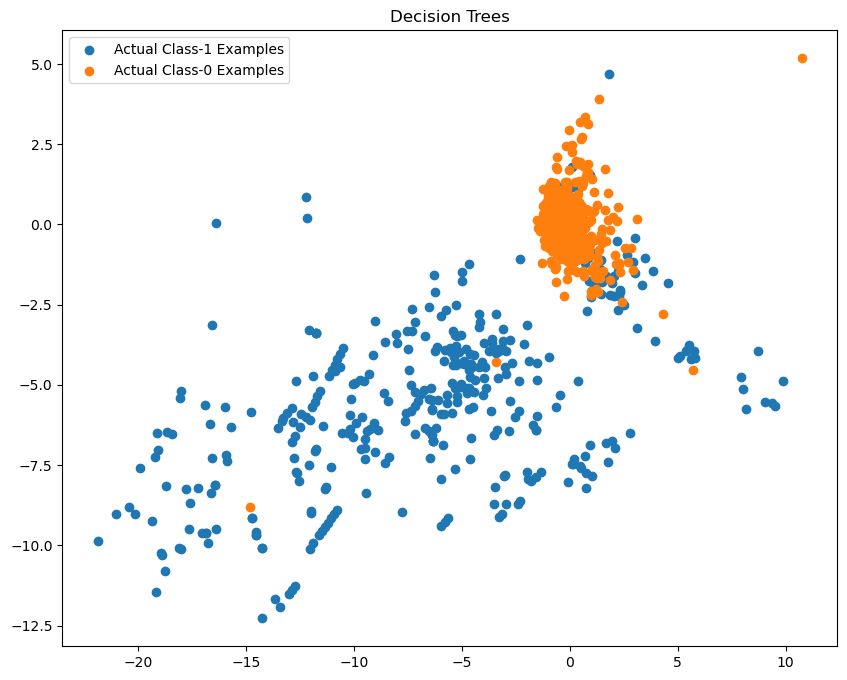

In [126]:
var_imp = []
for i in dtree_model1.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(dtree_model1.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(dtree_model1.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(dtree_model1.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(dtree_model1.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(dtree_model1.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.title('Decision Trees')
plt.legend()
plt.show()


<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Predicition On Train Set Using `Decision Trees`  </b></font><br>


In [127]:
y_train_pred_dtree=dtree_model1.predict(X_train)


<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Confusion Metrix For Decision Tree `Train Case`</b></font><br>


In [128]:
confusion_matrix_dtree_train=confusion_matrix(y_train,y_train_pred_dtree)

In [129]:
confusion_matrix_dtree_train

array([[227419,     32],
       [    91,    303]], dtype=int64)

In [130]:
TN = confusion_matrix_dtree_train[0,0] # True negative
FP = confusion_matrix_dtree_train[0,1] # False positive
FN = confusion_matrix_dtree_train[1,0] # False negative
TP = confusion_matrix_dtree_train[1,1] # True positive

In [131]:
calculation_metrics(TN, FP, FN, TP)

The Sensitivity  is : 0.7690355329949239
The Specificity  is : 0.999859310356956


In [132]:
accuracy=metrics.accuracy_score(y_train,y_train_pred_dtree)
print('The Accuracy of Decision Trees For Train is :',accuracy)
    
F1_score=metrics.f1_score(y_train,y_train_pred_dtree)
print("The F1-score of  Decision Trees For Train is :", F1_score)

The Accuracy of Decision Trees For Train is : 0.9994601593188351
The F1-score of  Decision Trees For Train is : 0.8312757201646092


In [133]:
# classification_report
print(classification_report(y_train, y_train_pred_dtree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.90      0.77      0.83       394

    accuracy                           1.00    227845
   macro avg       0.95      0.88      0.92    227845
weighted avg       1.00      1.00      1.00    227845




<font color="black " style ="font-family:Cambria ;font-size:18px"><b>`ROC_AUC` Curve on Train set For `Decision Tree`  </b></font><br>


In [134]:
y_train_pred_dtree_proba=dtree_model1.predict_proba(X_train)[:,1]

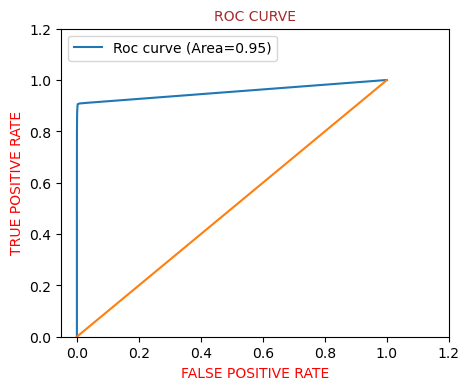

In [135]:
plt.figure(figsize=(5,4))
draw_roc_curve(y_train,y_train_pred_dtree_proba)

<b><font color=black style = 'font-family:cambria; font-size:18px'>Let's Do Predictions On The `Test Set` </font><b>

In [136]:
y_test_pred_dtree=dtree_model1.predict(X_test)

In [137]:
y_test_pred_dtree_proba=dtree_model1.predict_proba(X_test)[:,1]


<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Confusion Metrix For Decision `Test Case`  </b></font><br>


In [138]:
confusion_matrix_dtree_test=confusion_matrix(y_test,y_test_pred_dtree)
confusion_matrix_dtree_test

array([[56848,    16],
       [   27,    71]], dtype=int64)

In [139]:
TN = confusion_matrix_dtree_test[0,0] # True negative
FP = confusion_matrix_dtree_test[0,1] # False positive
FN = confusion_matrix_dtree_test[1,0] # False negative
TP = confusion_matrix_dtree_test[1,1] # True positive

In [140]:
calculation_metrics(TN, FP, FN, TP)

The Sensitivity  is : 0.7244897959183674
The Specificity  is : 0.9997186268992684


In [141]:
accuracy=metrics.accuracy_score(y_test,y_test_pred_dtree)
print('The Accuracy of Decision Tree For Test is :',accuracy)
    
F1_score=metrics.f1_score(y_test,y_test_pred_dtree)
print("The F1-score of Decision Tree For Test is :", F1_score)

The Accuracy of Decision Tree For Test is : 0.9992451107756047
The F1-score of Decision Tree For Test is : 0.7675675675675676


In [142]:
# classification_report
print(classification_report(y_test, y_test_pred_dtree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.72      0.77        98

    accuracy                           1.00     56962
   macro avg       0.91      0.86      0.88     56962
weighted avg       1.00      1.00      1.00     56962




<font color="black " style ="font-family:Cambria ;font-size:18px"><b>`ROC_AUC` Curve on Test set For `Decision Tree`  </b></font><br>


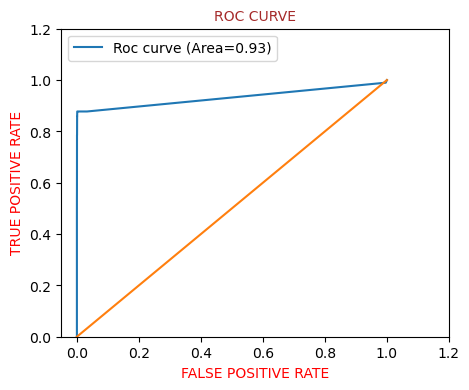

In [143]:
plt.figure(figsize=(5,4))
draw_roc_curve(y_test,y_test_pred_dtree_proba)

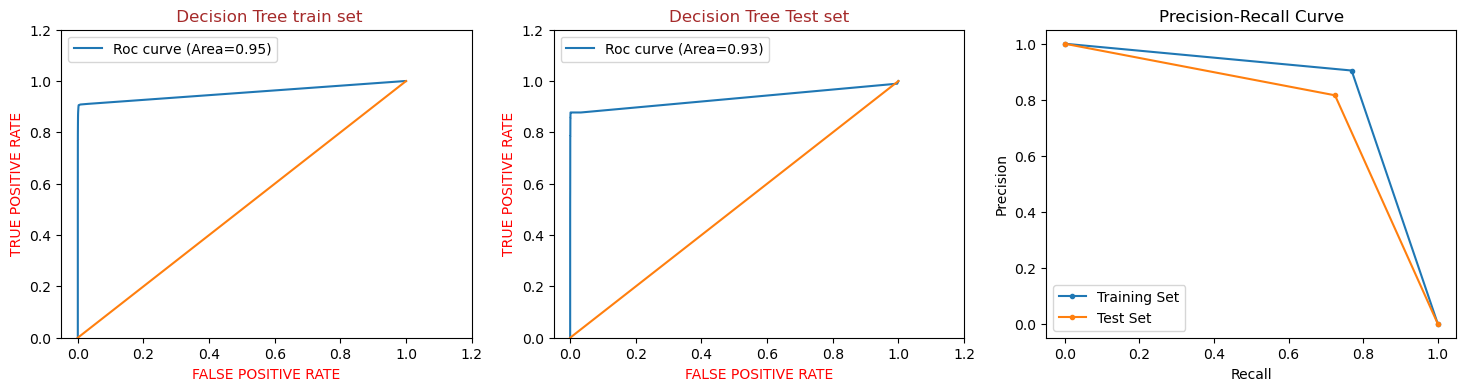

In [144]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
draw_roc_curve(y_train,y_train_pred_dtree_proba)

plt.title(' Decision Tree train set')

plt.subplot(1,3,2)
draw_roc_curve(y_test,y_test_pred_dtree_proba)

plt.title('Decision Tree Test set')

plt.subplot(1,3,3)
# Calculate Precision-Recall for Training Set
precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_pred_dtree)

# Calculate Precision-Recall for Test Set
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_pred_dtree)



# Plotting Precision-Recall Curve for both Training and Test Sets
plt.plot(recall_train, precision_train, label='Training Set', marker='.')
plt.plot(recall_test, precision_test, label='Test Set', marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


plt.show()

<b><font color=black style = 'font-family:cambria; font-size:15px'> OverAll Model Summary OF `Decision Tree` </font><b>
<table>
<tr><th>Decision Tree </th></tr>
<tr><td>

Decision Tree |Train Results|Test Result
-|-|-
Sensitivity | 0.77|0.724
Specificity| 0.999|0.999
Accuracy | 0.999|0.999
F1-score | 0.8312|0.767
Roc Curve|0.95|0.93

</td>
    

<center><b><font color=black style = 'font-family:cambria; font-size:25px'> Random Forest </font><b><center>

In [145]:
# importing libraries
from sklearn.ensemble import RandomForestClassifier

In [146]:
# Record the start time
start_time = time.time()

# Create the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

random_forest=RandomForestClassifier()

model_cv = GridSearchCV(estimator=random_forest,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=3,
                        verbose=2,
                        n_jobs=-1,
                       return_train_score=True)



model_cv .fit(X_train,y_train)




# Record the end time
end_time = time.time()
# Calculate the elapsed time in seconds
elapsed_time_seconds = end_time - start_time

# Convert elapsed time to minutes
elapsed_time_minutes = elapsed_time_seconds / 60

print(f"Elapsed Time (Minutes): {elapsed_time_minutes:.2f}")

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Elapsed Time (Minutes): 38.89


In [147]:
print(f"The Best params Is {model_cv.best_params_}")
print(f"The Best score Is {model_cv.best_score_}")

The Best params Is {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
The Best score Is 0.9792770403312945



<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Choosing Best Parameters For `Random Forest`  </b></font><br>


In [148]:
random_forest=RandomForestClassifier(random_state=100,
                                     criterion='gini',
                                     max_depth=model_cv.best_params_['max_depth'],
                                     min_samples_leaf=model_cv.best_params_['min_samples_leaf'],
                                     min_samples_split=model_cv.best_params_['min_samples_split'],
                                     n_estimators=model_cv.best_params_['n_estimators'],bootstrap=True)

In [149]:
random_forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=50,
                       random_state=100)

<img src='images/3.png' width=700px>

Top var = 14
2nd Top var = 17
3rd Top var = 12


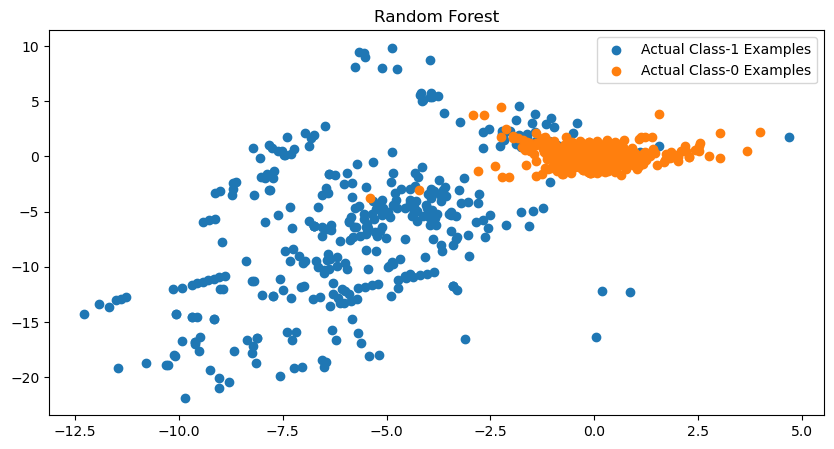

In [150]:
var_imp = []
for i in random_forest.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(random_forest.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(random_forest.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(random_forest.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(random_forest.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(random_forest.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.title('Random Forest')
plt.legend()
plt.show()

In [151]:
y_train_pred_random_forest=random_forest.predict(X_train)


<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Confusion Metrix For Random Forest `Train Case`</b></font><br>


In [152]:
confusion_matrix_random_forest_train=confusion_matrix(y_train,y_train_pred_random_forest)

In [153]:
confusion_matrix_random_forest_train

array([[227450,      1],
       [    68,    326]], dtype=int64)

In [154]:
TN = confusion_matrix_random_forest_train[0,0] # True negative
FP = confusion_matrix_random_forest_train[0,1] # False positive
FN = confusion_matrix_random_forest_train[1,0] # False negative
TP = confusion_matrix_random_forest_train[1,1] # True positive

In [155]:
calculation_metrics(TN, FP, FN, TP)

The Sensitivity  is : 0.8274111675126904
The Specificity  is : 0.9999956034486549


In [156]:
accuracy=metrics.accuracy_score(y_train,y_train_pred_random_forest)
print('The Accuracy of random_forest For Train is :',accuracy)
    
F1_score=metrics.f1_score(y_train,y_train_pred_random_forest)
print("The F1-score of  random_forest For Train is :", F1_score)

The Accuracy of random_forest For Train is : 0.9996971625447124
The F1-score of  random_forest For Train is : 0.9042995839112343


In [157]:
# classification_report
print(classification_report(y_train, y_train_pred_random_forest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      0.83      0.90       394

    accuracy                           1.00    227845
   macro avg       1.00      0.91      0.95    227845
weighted avg       1.00      1.00      1.00    227845




<font color="black " style ="font-family:Cambria ;font-size:18px"><b>`ROC_AUC` Curve on Train set For `Random Forest`  </b></font><br>


In [158]:
y_train_pred_random_forest_proba=random_forest.predict_proba(X_train)[:,1]

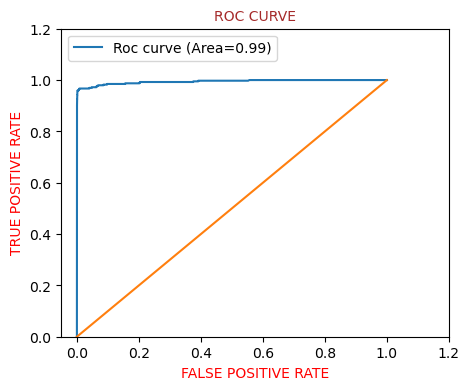

In [159]:
plt.figure(figsize=(5,4))
draw_roc_curve(y_train,y_train_pred_random_forest_proba)

<b><font color=black style = 'font-family:cambria; font-size:18px'>Let's Do Predictions On The `Test Set` </font><b>

In [160]:
y_test_pred_random_forest=random_forest.predict(X_test)

In [161]:
y_test_pred_random_forest_proba=random_forest.predict_proba(X_test)[:,1]


<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Confusion Metrix For Random Forest `Test Case`  </b></font><br>


In [162]:
confusion_matrix_random_forest_test=confusion_matrix(y_test,y_test_pred_random_forest)
confusion_matrix_random_forest_test

array([[56859,     5],
       [   21,    77]], dtype=int64)

In [163]:
TN = confusion_matrix_random_forest_test[0,0] # True negative
FP = confusion_matrix_random_forest_test[0,1] # False positive
FN = confusion_matrix_random_forest_test[1,0] # False negative
TP = confusion_matrix_random_forest_test[1,1] # True positive

In [164]:
calculation_metrics(TN, FP, FN, TP)

The Sensitivity  is : 0.7857142857142857
The Specificity  is : 0.9999120709060214


In [165]:
accuracy=metrics.accuracy_score(y_test,y_test_pred_random_forest)
print('The Accuracy of random_forest For Test is :',accuracy)
    
F1_score=metrics.f1_score(y_test,y_test_pred_random_forest)
print("The F1-score of random_forest For Test is :", F1_score)

The Accuracy of random_forest For Test is : 0.9995435553526912
The F1-score of random_forest For Test is : 0.8555555555555556


In [166]:
# classification_report
print(classification_report(y_test, y_test_pred_random_forest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.79      0.86        98

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962




<font color="black " style ="font-family:Cambria ;font-size:18px"><b>`ROC_AUC` Curve on Test set For `Random Forest`  </b></font><br>


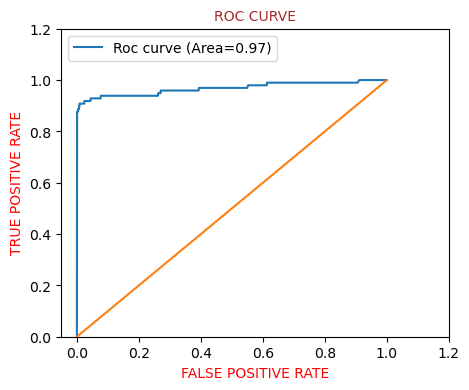

In [167]:
plt.figure(figsize=(5,4))
draw_roc_curve(y_test,y_test_pred_random_forest_proba)

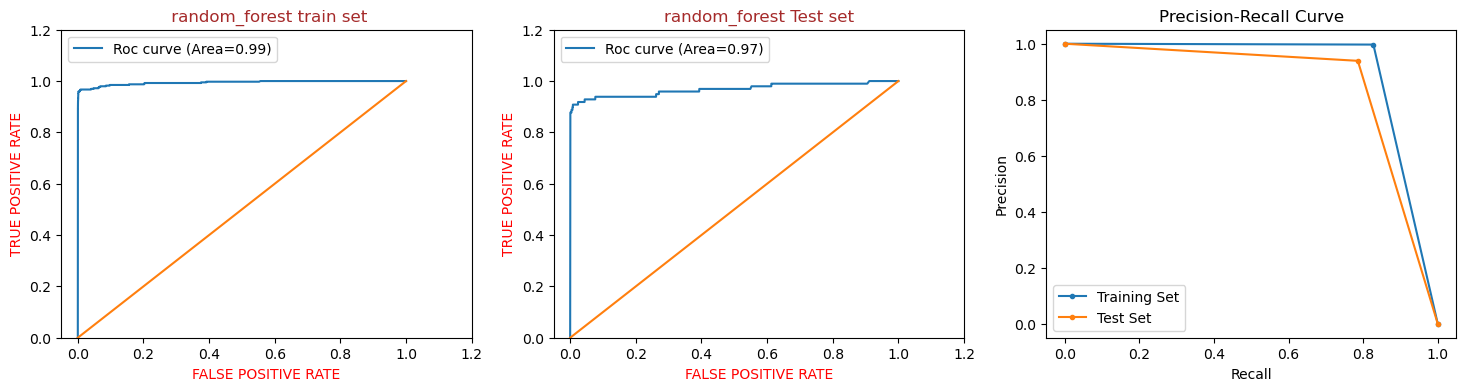

In [168]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
draw_roc_curve(y_train,y_train_pred_random_forest_proba)

plt.title(' random_forest train set')

plt.subplot(1,3,2)
draw_roc_curve(y_test,y_test_pred_random_forest_proba)

plt.title('random_forest Test set')

plt.subplot(1,3,3)

# Calculate Precision-Recall for Training Set
precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_pred_random_forest)

# Calculate Precision-Recall for Test Set
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_pred_random_forest)



# Plotting Precision-Recall Curve for both Training and Test Sets
plt.plot(recall_train, precision_train, label='Training Set', marker='.')
plt.plot(recall_test, precision_test, label='Test Set', marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

plt.show()

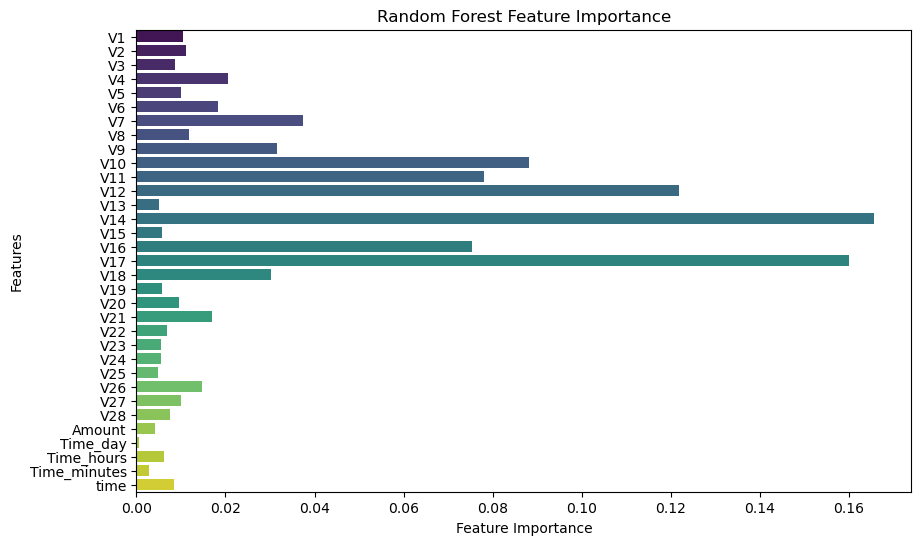

In [169]:
# from sklearn.ensemble import RandomForestClassifier
# import matplotlib.pyplot as plt

# Assuming clf is your trained Random Forest classifier
feature_importances = random_forest.feature_importances_

# Get feature names if available
feature_names = X.columns if 'X' in locals() else range(len(feature_importances))

# Plotting Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names, orient='h', palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()


<b><font color=black style = 'font-family:cambria; font-size:15px'> OverAll Model Summary OF `Random Forest ` </font><b>
<table>
<tr><th>Random Forest </th></tr>
<tr><td>
    
Random Forest|Train Results|Test Result
-|-|-
Sensitivity | 0.82|0.786
Specificity| 0.999|0.999
Accuracy | 0.999|0.999
F1-score | 0.90|0.85
Roc Curve|0.999|0.97

</td>
    

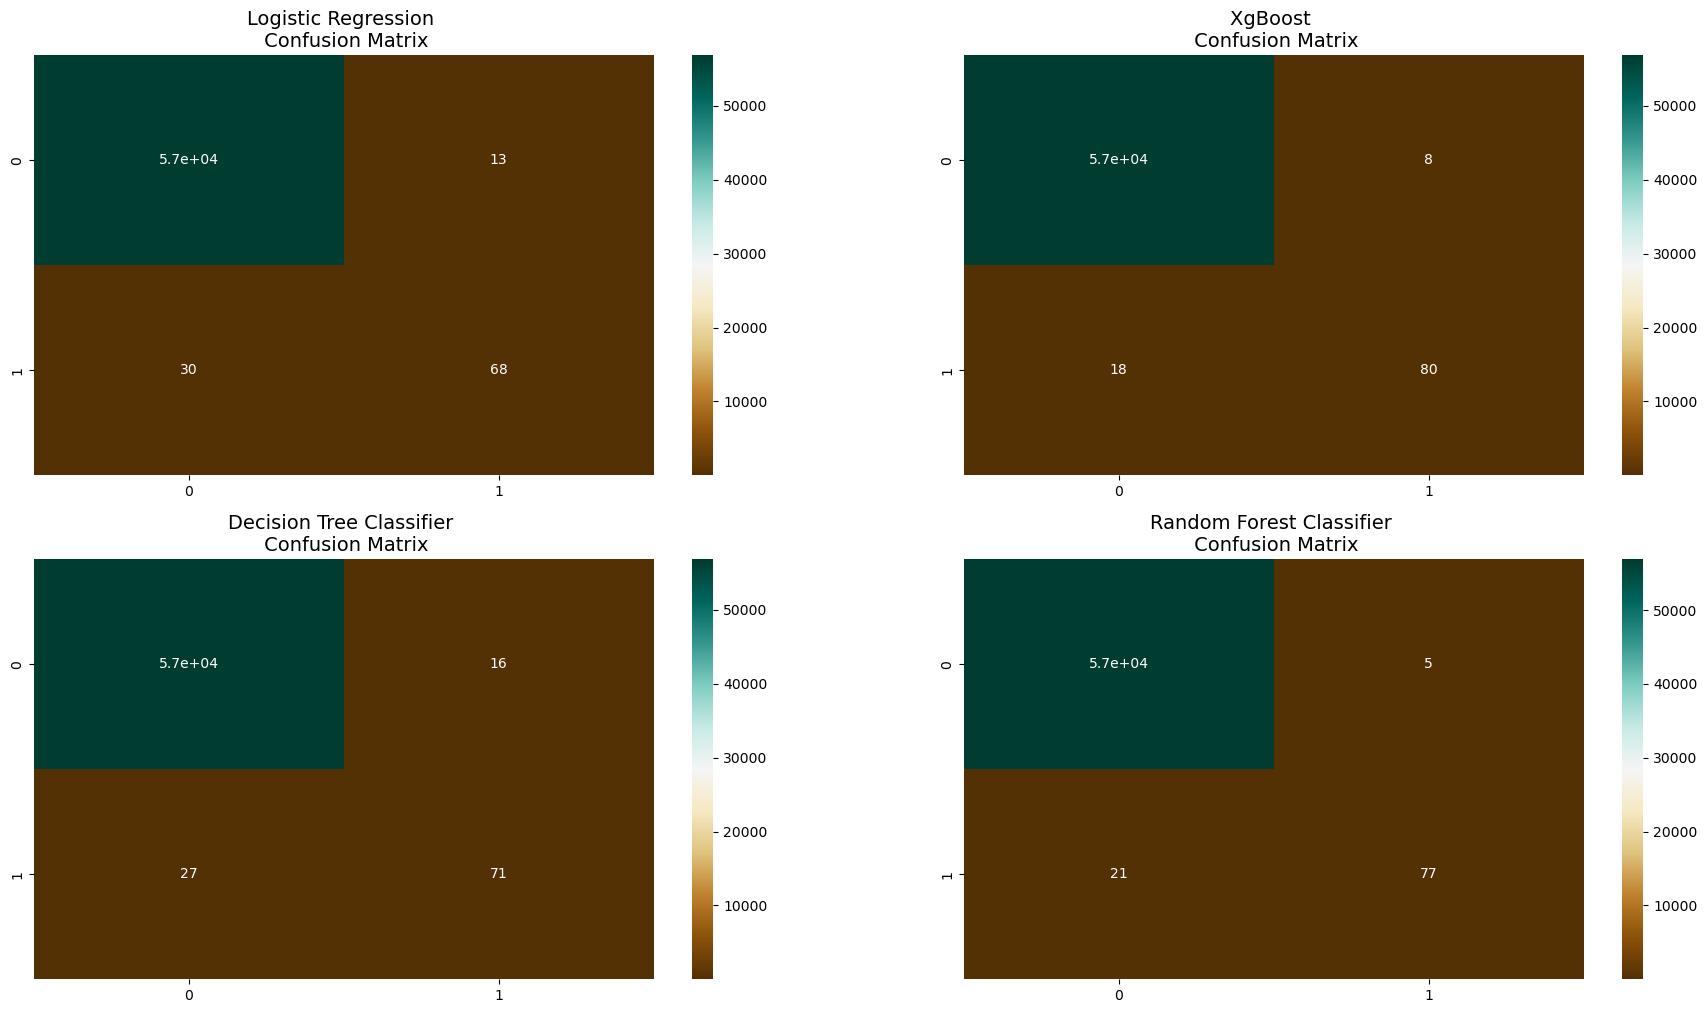

In [170]:
from sklearn.metrics import confusion_matrix

# all models fitted using SMOTE technique
y_test_pred_logistic = logistic_model1.predict(X_test)

y_test_pred_xgboost = xgb_model1.predict(X_test)
y_test_pred_dtree = dtree_model1.predict(X_test)
y_test_pred_random_forest = random_forest.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_test_pred_logistic)
xgboost_cf = confusion_matrix(y_test, y_test_pred_xgboost)
dtree_cf = confusion_matrix(y_test, y_test_pred_dtree)
random_forest_cf = confusion_matrix(y_test, y_test_pred_random_forest)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.BrBG)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
# ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
# ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(xgboost_cf, ax=ax[0][1], annot=True, cmap=plt.cm.BrBG)
ax[0][1].set_title("XgBoost \n Confusion Matrix", fontsize=14)


sns.heatmap(dtree_cf, ax=ax[1][0], annot=True, cmap=plt.cm.BrBG)
ax[1][0].set_title("Decision Tree Classifier \n Confusion Matrix", fontsize=14)


sns.heatmap(random_forest_cf, ax=ax[1][1], annot=True, cmap=plt.cm.BrBG)
ax[1][1].set_title("Random Forest Classifier \n Confusion Matrix", fontsize=14)



plt.show()

<center><b><font color=black style = 'font-family:cambria; font-size:23px'> K Nearest Neighbors KNN </font><b><center>
    <br>

<font color=green style = 'font-family:cambria; font-size:15px'> We `cannot` build  the model `by using KNN` because our Data Set contains 284807 `KNN is Needs more memory power` as the data point increases it should store the data points</font>
    <br>
    
<font color=green style = 'font-family:cambria; font-size:15px'>As you see the below code i have tried to run the model based on KNN but it is `consuming more time`  </font>

<font color=green style = 'font-family:cambria; font-size:15px'>If You Still Want To Use KNN, You Can Try Reducing The Number Of Neighbors (K) Or Use Approximations To Speed Up The Computation. Additionally, Optimizing The Implementation (Using A More Optimized Library Or Parallel Computing) Might Hel  </font>

In [171]:
from sklearn.neighbors import KNeighborsClassifier

In [172]:
# # Record the start time
# start_time = time.time()

# # Create the modified parameter grid
# param_grid = {
#     'n_neighbors': [3, 5],
#     'weights': ['uniform', 'distance'],
#     'p': [1, 2],
#     'metric': ['euclidean', 'manhattan']
# }
# # Create a KNN classifier
# knn = KNeighborsClassifier()

# # Use GridSearchCV to find the best parameters
# model_cv = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='recall', cv=5)
# model_cv.fit(X_train, y_train)



# # Record the end time
# end_time = time.time()
# # Calculate the elapsed time in seconds
# elapsed_time_seconds = end_time - start_time

# # Convert elapsed time to minutes
# elapsed_time_minutes = elapsed_time_seconds / 60

# print(f"Elapsed Time (Minutes): {elapsed_time_minutes:.2f}")



<font color=green style = 'font-family:Cambria; font-size:18px'>Choosing The Best Model On Imbalanced Data Set Out Of All 4 Models Logistic Regression,XGBoost,Decision Tree, Random Forest</font>

-  <font color=brown style = 'font-family:Cambria; font-size:15px'>Most Of The Models Performed Well On `Training Set` and `Test Set`  </font>

-  <font color=brown style = 'font-family:Cambria; font-size:15px'>Each Model Has Its Strengths. If Your `Primary Concern Is Detecting Fraud` (Which Is Often The Case In Credit Card Fraud Detection), You Might Prioritize Models With `Higher Sensitivity` Because It Focuses On `Correctly Identifying Fraud Cases`.  </font>

-  <font color=brown style = 'font-family:Cambria; font-size:15px'>`XG Boost` Exhibits `The Highest Sensitivity On The Test Set` Among The Models You `Evaluated (0.816)`. `Sensitivity Is Crucial In Fraud Detection` Because It Represents The Ability Of The Model To `Correctly Identify Actual Fraud Cases`, Minimizing False Negatives.</font>

-  <font color=brown style = 'font-family:Cambria; font-size:15px'>XG Boost Is Known For Its `Robustness To Imbalanced Datasets`. It Handles Class Imbalance Well And Often Provides Better Performance Compared To Other Algorithms When Dealing With Skewed Class Distributions.  </font>

-  <font color=brown style = 'font-family:Cambria; font-size:15px'>`XG Boost` Shows A `Good Balance Between Sensitivity, Specificity, And Accuracy`. While Achieving A `High Sensitivity`, It Also Maintains A `High Level Of Specificity (0.999)` And `Accuracy (0.999)`, Indicating An Overall Strong Performance</font>

-  <font color=brown style = 'font-family:Cambria; font-size:15px'>`XG Boost` Excels In Various Metrics Like Sensitivity, Specificity, Accuracy, F1-Score, And ROC Curve, Demonstrating Its `Overall Robust And Balanced Performance`</font>

<hr style='height:0.5px'>


<font color= 'green' style = 'font-family:Cambria ; font-size:20px'>Handling Class Imbalance </font><br>

<font color=brown style = 'font-family:Cambria; font-size:15px'>The Data Exhibits A Significant Class Imbalance, With Over `2,84,315 Cases Labeled As 0` And Only Around` 492 Cases Labeled As 1`. Machine Learning Algorithms Perform Best With Balanced Class Representation. However, In This Scenario, Any Model Built Will Be More Knowledgeable About Non-Fraudulent Cases Than Fraudulent Ones Due To The Imbalance. This Imbalance Creates A Challenge Known As The Minority Class Problem.</font>
<br>

<font color= 'green' style = 'font-family:Cambria ; font-size:18px'>To Tackle The Challenge Of `Class Imbalance`, Various Methods Can Be Employed :</font>

-   <font color=brown style = 'font-family:cambria; font-size:15px'>`Undersampling` : This Approach Involves Selecting Fewer Data Points From The Majority Class During The Model-Building Process. For Instance, If The Minority Class Has Only 500 Data Points, An Equal Number Of 500 Data Points Are Chosen From The Majority Class To Somewhat Balance The Classes. However, Undersampling Has Practical Limitations, Such As Losing Over 99% Of The Original Data, Making It Less Effective In Real-World Scenarios. `Select Fewer Data Points From The Majority Class, But It's Less Effective Due To Significant Data Loss`.</font>

-  <font color=brown style = 'font-family:cambria; font-size:15px'> `Oversampling` : In This Method, `Weights` Are Assigned To Randomly Selected Data Points From The Minority Class. This Means That The Occurrence Of Each Data Point Is `Multiplied By The Assigned Weight For Optimization`, But It `May Not Add New Information` And Can `Exaggerate Existing Patterns`.</font>

- <font color=brown style = 'font-family:cambria; font-size:15px'>`Smote ` : Intelligently Generates Synthetic Samples Between Existing Minority Class Data Points, Introducing Diversity And Reducing Bias. </font>

-   <font color=brown style = 'font-family:cambria; font-size:15px'>`Adasyn` : Similar To Smote, It Adapts By Introducing Synthetic Samples Based On A Density Distribution, Focusing On Harder-To-Learn Minority Examples.</font><br>    

<b><center><font color= 'Black' style = 'font-family:verdana ; font-size:20px'>SMOTE Synthetic Minority Over-Sampling </font></center></b>
<hr style="color: black; height: 0.5px;">

-   <font color=brown style = 'font-family:cambria; font-size:15px'>SMOTE, Which Stands For Synthetic Minority Over-Sampling Technique, Is A `Popular Technique` In The Field Of Machine Learning, Particularly In The Context Of `Imbalanced Classification Problems`. The `Primary Goal` Of SMOTE Is To Address The `Issue Of Class Imbalance` By Generating `Synthetic Samples` For The Minority Class.</font>
 
-   <font color=brown style = 'font-family:cambria; font-size:15px'>In Imbalanced Datasets, Where `One Class (The Minority Class)` Has Significantly Fewer Examples Than The Other `(The Majority Class)`, Machine Learning Models May Struggle To `Effectively Learn Patterns In The Minority Class`. SMOTE Addresses This By Creating Synthetic Instances Of The Minority Class Through A Process Of Interpolating Between Existing Minority Class Samples.</font> 

In [173]:
sm=SMOTE(sampling_strategy='auto',random_state=42)

In [174]:
# fitting the SMOTE to the train set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [175]:
print('Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_smote.shape)

Before SMOTE oversampling X_train shape= (227845, 33)
After SMOTE oversampling X_train shape= (454902, 33)


<center><b><font color=black style = 'font-family:cambria; font-size:23px'> Logistic Regression By SMOTE</font><b><center>

In [176]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type
}

# Create K-fold cross-validation
folds = KFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV to find the best parameters for logistic regression
model_cv = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, scoring='recall', cv=folds, verbose=1, n_jobs=-1)
model_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='recall', verbose=1)

<img src='images/logistic _adasyn.png' width=400px>

In [177]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results.head(3)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       1.099435      0.040153         0.000000        0.000000    0.01   
1       8.083080      0.529865         0.124191        0.015803    0.01   
2       0.982416      0.059324         0.000000        0.000000     0.1   

  param_penalty                        params  split0_test_score  \
0            l1  {'C': 0.01, 'penalty': 'l1'}                NaN   
1            l2  {'C': 0.01, 'penalty': 'l2'}           0.935317   
2            l1   {'C': 0.1, 'penalty': 'l1'}                NaN   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0                NaN                NaN                NaN                NaN   
1           0.936879           0.938431            0.93631              0.937   
2                NaN                NaN                NaN                NaN   

   mean_test_score  std_test_score  rank_test_score  
0              NaN             NaN                6  
1         0.936787        0.001015                5  
2              NaN             NaN                6

In [178]:
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_penalty', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [179]:
# best score
best_score=model_cv.best_score_
# best params
best_params=model_cv.best_params_

In [180]:
print(f"The Best Score Is {best_score}")
print(f"The Best Params Is {best_params}")

The Best Score Is 0.9391396592277218
The Best Params Is {'C': 10, 'penalty': 'l2'}



<font color="black " style ="font-family:Cambria ;font-size:18px"><b> Logistic Regression With Optimal  Value That Is `c=10` </b></font><br>


In [181]:
logistic_=LogisticRegression(C=10,penalty='l2')

In [182]:
# fiitting the model on train set
logistic_smote=logistic_.fit(X_train_smote,y_train_smote)


<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Prediction  On Train set Using Smote `Logistic Regression`  </b></font><br>


In [183]:
y_train_pred_logistic_smote=logistic_smote.predict(X_train_smote)


<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Confusion Metrix For `Logistic Regression`  </b></font><br>


In [184]:
confusion_matrix_logistic_train_smote=metrics.confusion_matrix(y_train_smote,y_train_pred_logistic_smote)

In [185]:
confusion_matrix_logistic_train_smote

array([[220643,   6808],
       [ 13835, 213616]], dtype=int64)

In [186]:
TN = confusion_matrix_logistic_train_smote[0,0] # True negative
FP = confusion_matrix_logistic_train_smote[0,1] # False positive
FN = confusion_matrix_logistic_train_smote[1,0] # False negative
TP = confusion_matrix_logistic_train_smote[1,1] # True positive

In [187]:
calculation_metrics(TN,FP,FN,TP)

The Sensitivity  is : 0.9391737121401972
The Specificity  is : 0.9700682784423897


In [188]:
accuracy=metrics.accuracy_score(y_train_smote,y_train_pred_logistic_smote)
print('The Accuracy of Logistic Regression By Using Smote For Train is :',accuracy)
    
F1_score=metrics.f1_score(y_train_smote,y_train_pred_logistic_smote)
print("The F1-score of Logistic Regression By Using Smote For Train is :", F1_score)

The Accuracy of Logistic Regression By Using Smote For Train is : 0.9546209952912935
The F1-score of Logistic Regression By Using Smote For Train is : 0.9539090147920737


In [189]:
# classificatino report
print(classification_report(y_train_smote,y_train_pred_logistic_smote))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96    227451
           1       0.97      0.94      0.95    227451

    accuracy                           0.95    454902
   macro avg       0.96      0.95      0.95    454902
weighted avg       0.96      0.95      0.95    454902



In [190]:
# predicted probability
y_train_pred_logistic_proba_smote=logistic_smote.predict_proba(X_train_smote)[:,1]


<font color="black " style ="font-family:Cambria ;font-size:18px"><b>`ROC_AUC` Curve on Training set For `Logistic Regression` Smote </b></font><br>


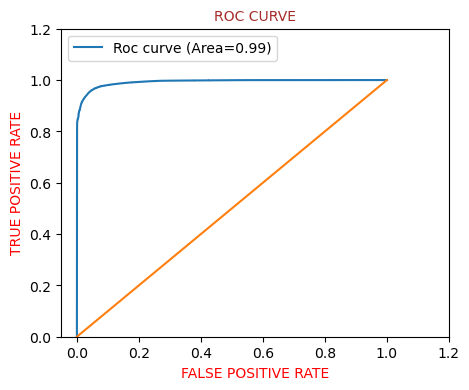

In [191]:
plt.figure(figsize=(5,4))
draw_roc_curve(y_train_smote,y_train_pred_logistic_proba_smote)

<font color=brown style = 'font-family:cambria; font-size:15px'>`SMOTE` (Synthetic Minority Over-Sampling Technique) Should Only Be `Applied To The Training Dataset`, And `Not To The Test Dataset`. The Reason Behind This Is That Any `Oversampling Or Data Manipulation Techniques`, Including SMOTE, Should Be `Part Of The Training Process` And Should `Not Leak Information` From The Test Set Into The Training Set.</font>

<b><font color=black style = 'font-family:cambria; font-size:15px'>Here's Why You Should Only Apply SMOTE To The Training Data :</font><b>

- <font color=brown style = 'font-family:cambria; font-size:15px'>`Simulating Real-World Scenarios`: In Real-World Scenarios, Your Model Will Encounter New, Unseen Data When It's Deployed. Therefore, Any Preprocessing Steps, Such As Oversampling, Should Be Applied Only To The Training Data To Mimic This Real-World Scenario.</font>
    
- <font color=brown style = 'font-family:cambria; font-size:15px'>`Preventing Data Leakage` : If You Apply SMOTE To The Entire Dataset (Including Both Training And Test Sets), You Risk Introducing Information From The Test Set Into The Training Set. This Can Lead To `Overly Optimistic Evaluations` Of Your Model's Performance Because It Has Already Seen Some Of The Test Set Examples During Training.</font>

- <font color=brown style = 'font-family:cambria; font-size:15px'>`Maintaining Independence` : The `Test Set` Should Be Kept `Independent` Of The Training Set To Provide An `Unbiased Evaluation` Of The Model's Generalization Performance On New, Unseen Data.</font>
    
 <font color=brown style = 'font-family:cambria; font-size:15px'>In Summary, Always Apply SMOTE, Or Any Other Data Preprocessing Technique, Exclusively To The Training Dataset Before Splitting It Into Training And Validation Sets. This Ensures A More Accurate Representation Of The Model's Performance On Truly Unseen Data During Evaluation.</font>




<b><font color=black style = 'font-family:cambria; font-size:15px'>Let's Do Predictions On The `Test Set` </font><b>

In [192]:
y_test_pred_logistic=logistic_smote.predict(X_test)

In [193]:
y_test_pred_logistic_proba=logistic_smote.predict_proba(X_test)[:,1]

In [194]:
confusion_matrix_logistic_test=confusion_matrix(y_test,y_test_pred_logistic)
confusion_matrix_logistic_test

array([[55170,  1694],
       [    8,    90]], dtype=int64)

In [195]:
TN = confusion_matrix_logistic_test[0,0] # True negative
FP = confusion_matrix_logistic_test[0,1] # False positive
FN = confusion_matrix_logistic_test[1,0] # False negative
TP = confusion_matrix_logistic_test[1,1] # True positive

In [196]:
calculation_metrics(TN, FP, FN, TP)

The Sensitivity  is : 0.9183673469387755
The Specificity  is : 0.970209622960045


In [197]:
accuracy=metrics.accuracy_score(y_test,y_test_pred_logistic)
print('The Accuracy of Logistic Regression For Test is :',accuracy)


The Accuracy of Logistic Regression For Test is : 0.9701204311646361


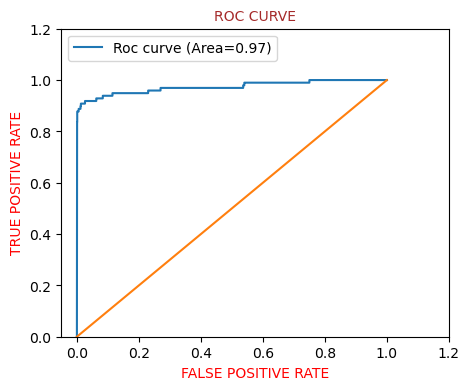

In [198]:
plt.figure(figsize=(5,4))
draw_roc_curve(y_test,y_test_pred_logistic_proba)

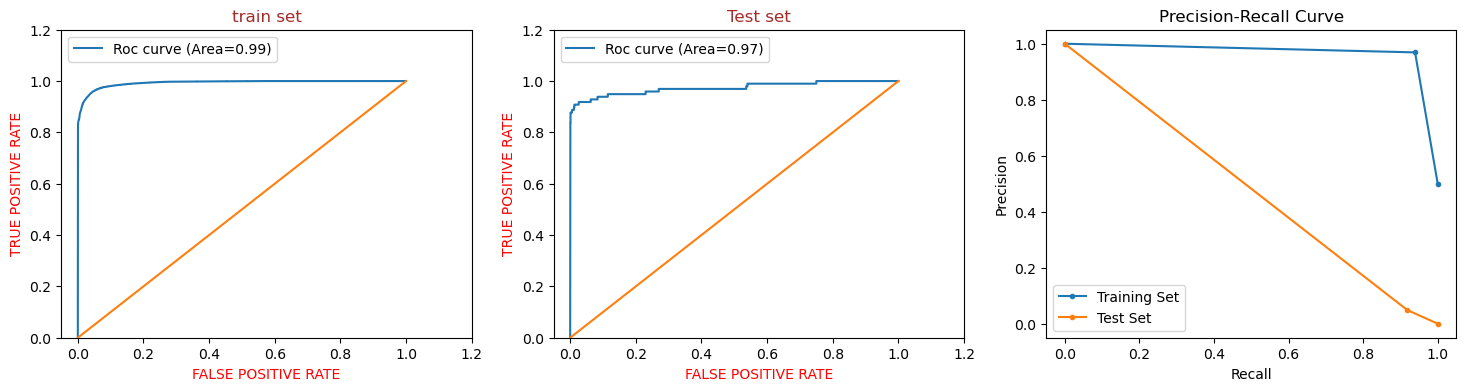

In [199]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
draw_roc_curve(y_train_smote,y_train_pred_logistic_proba_smote)
plt.title('train set')

plt.subplot(1,3,2)
draw_roc_curve(y_test,y_test_pred_logistic_proba)
plt.title('Test set')


plt.subplot(1,3,3)

# Calculate Precision-Recall for Training Set
precision_train, recall_train, _ = precision_recall_curve(y_train_smote, y_train_pred_logistic_smote)

# Calculate Precision-Recall for Test Set
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_pred_logistic)



# Plotting Precision-Recall Curve for both Training and Test Sets
plt.plot(recall_train, precision_train, label='Training Set', marker='.')
plt.plot(recall_test, precision_test, label='Test Set', marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

plt.show()


<b><font color=black style = 'font-family:cambria; font-size:15px'> OverAll Model Summary OF `Logistic Regression`  </font><b>
<br>
    
 <table>
<tr><th>Logistic Regression </th><th>Logistic Regression After Smote</th></tr>
<tr><td>

Logistic Regression|Train Results|Test Result
-|-|-
Sensitivity | 0.66|0.692
Specificity| 0.99|0.99
Accuracy | 0.99|0.99
Roc Curve|0.99|0.97

</td><td>

|Logistic Regression|Train Results|Test Result
-|-|-
Sensitivity | 0.94|0.92
Specificity| 0.97|0.97
Accuracy | 0.954|0.97
Roc Curve|0.99|0.97

</td></tr> </table>   
    
    
    
    
    
    
    
    
    
    


<center><b><font color=black style = 'font-family:cambria; font-size:23px'> XGBoost By SMOTE</font><b><center>

In [200]:
# Record the start time
start_time = time.time()

# Create the extended parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 4, 5],  # Maximum depth of a tree
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for fitting the individual base learner
}

# Create K-fold cross-validation
folds = KFold(n_splits=3, shuffle=True, random_state=42)

# Create GridSearchCV to find the best parameters for XGBoost
model_cv = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, scoring='recall', cv=folds, verbose=1, n_jobs=-1)
model_cv.fit(X_train_smote, y_train_smote)


# Record the end time
end_time = time.time()
# Calculate the elapsed time in seconds
elapsed_time_seconds = end_time - start_time

# Convert elapsed time to minutes
elapsed_time_minutes = elapsed_time_seconds / 60

print(f"Elapsed Time (Minutes): {elapsed_time_minutes:.2f}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Elapsed Time (Minutes): 23.41


In [201]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results.head(3)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      26.198083      0.069704         0.787576        0.009792   
1      26.074871      0.221875         0.802995        0.029237   
2      20.106254      0.808303         0.860247        0.011232   

  param_learning_rate param_max_depth param_n_estimators param_subsample  \
0                0.01               3                100             0.8   
1                0.01               3                100             0.9   
2                0.01               3                100             1.0   

                                              params  split0_test_score  \
0  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...           0.897343   
1  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...           0.896353   
2  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...           0.896617   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.898647           0.899211         0.898400        0.000783   
1           0.899742           0.899330         0.898475        0.001510   
2           0.899860           0.899409         0.898629        0.001434   

   rank_test_score  
0               81  
1               80  
2               79

In [202]:
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_learning_rate', 'param_max_depth', 'param_n_estimators',
       'param_subsample', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [203]:
cv_results[['param_learning_rate', 'param_subsample','rank_test_score','mean_test_score']].sort_values(by= 'rank_test_score' ,ascending=True).head(5)

param_learning_rate param_subsample  rank_test_score  mean_test_score
80                 0.2             1.0                1              1.0
51                 0.1             0.8                1              1.0
52                 0.1             0.9                1              1.0
53                 0.1             1.0                1              1.0
67                 0.2             0.9                1              1.0

In [204]:
print(f"The Best params Is {model_cv.best_params_}")
print(f"The Best score Is {model_cv.best_score_}")

The Best params Is {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
The Best score Is 1.0



<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Choosing Best Parameters For  `XGBoost` By Smote  </b></font><br>


In [205]:
# chosen hyperparameters
# 'objective':'binary:logistic' which outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': model_cv.best_params_['learning_rate'],
          'max_depth': model_cv.best_params_['max_depth'], 
          'n_estimators': model_cv.best_params_['n_estimators'],
          'subsample':model_cv.best_params_['subsample'],
         'objective':'binary:logistic'}



In [206]:
# fit model on training data
xgb_smote= XGBClassifier(params = params)
xgb_smote.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300,
                      'objective': 'binary:logistic', 'subsample': 0.8}, ...)

<img src='images/5.png' width=700px>

Top var = 14
2nd Top var = 4
3rd Top var = 8


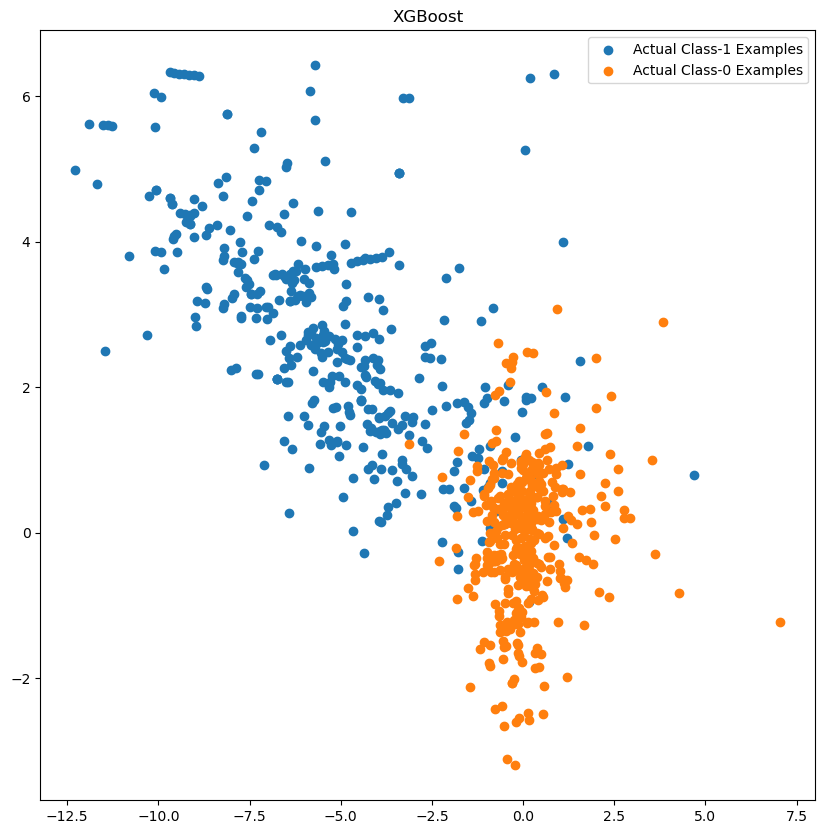

In [207]:
var_imp = []
for i in xgb_smote.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_smote.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_smote.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_smote.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_smote.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_smote.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.title('XGBoost')

plt.legend()
plt.show()

In [208]:
y_train_pred_xgboost_smote=xgb_smote.predict(X_train_smote)


<font color="black " style ="font-family:Cambria ;font-size:16px"><b>Confusion Metrix For XGBoost SMOTE `Train Case`</b></font><br>


In [209]:
confusion_matrix_xgboost_train_smote=metrics.confusion_matrix(y_train_smote,y_train_pred_xgboost_smote)

In [210]:
confusion_matrix_xgboost_train_smote

array([[227451,      0],
       [     0, 227451]], dtype=int64)

In [211]:
TN = confusion_matrix_xgboost_train_smote[0,0] # True negative
FP = confusion_matrix_xgboost_train_smote[0,1] # False positive
FN = confusion_matrix_xgboost_train_smote[1,0] # False negative
TP = confusion_matrix_xgboost_train_smote[1,1] # True positive

In [212]:
calculation_metrics(TN, FP, FN, TP)

The Sensitivity  is : 1.0
The Specificity  is : 1.0


In [213]:
print('The Accurays For The Train Set Of Xgboost Smote is ',metrics.accuracy_score(y_train_smote,y_train_pred_xgboost_smote))
print('The F1-Score For The Train Set Of Xgboost Smote is ',metrics.f1_score(y_train_smote,y_train_pred_xgboost_smote))

The Accurays For The Train Set Of Xgboost Smote is  1.0
The F1-Score For The Train Set Of Xgboost Smote is  1.0


In [214]:
# classificatino report
print(classification_report(y_train_smote,y_train_pred_xgboost_smote))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



In [215]:
# predicted probability
y_train_pred_xgboost_proba_smote=xgb_smote.predict_proba(X_train_smote)[:,1]


<font color="black " style ="font-family:Cambria ;font-size:16px"><b>`ROC_AUC` Curve on Training set For `XGBoost SMOTE`  </b></font><br>


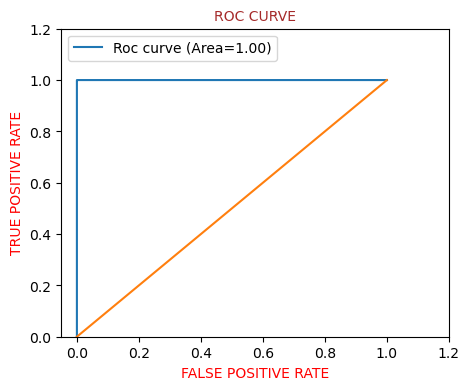

In [216]:
plt.figure(figsize=(5,4))

draw_roc_curve(y_train_smote,y_train_pred_xgboost_proba_smote)

<b><font color=black style = 'font-family:cambria; font-size:18px'>Let's Do Predictions On The `Test Set` </font><b>

In [217]:
y_test_pred_xgboost=xgb_smote.predict(X_test)

In [218]:
y_test_pred_xgboost_proba=xgb_smote.predict_proba(X_test)[:,1]


<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Confusion Metrix For XGBoost `Test Case`  </b></font><br>


In [219]:
confusion_matrix_xgboost_test=confusion_matrix(y_test,y_test_pred_xgboost)
confusion_matrix_xgboost_test

array([[56835,    29],
       [   12,    86]], dtype=int64)

In [220]:
TN = confusion_matrix_xgboost_test[0,0] # True negative
FP = confusion_matrix_xgboost_test[0,1] # False positive
FN = confusion_matrix_xgboost_test[1,0] # False negative
TP = confusion_matrix_xgboost_test[1,1] # True positive

In [221]:
calculation_metrics(TN, FP, FN, TP)

The Sensitivity  is : 0.8775510204081632
The Specificity  is : 0.999490011254924


In [222]:
accuracy=metrics.accuracy_score(y_test,y_test_pred_xgboost)
print('The Accuracy of XG Boost For Test is :',accuracy)
    
F1_score=metrics.f1_score(y_test,y_test_pred_xgboost)
print("The F1-score of XG Boost For Test is :", F1_score)

The Accuracy of XG Boost For Test is : 0.9992802219023208
The F1-score of XG Boost For Test is : 0.8075117370892018



<font color="black " style ="font-family:Cambria ;font-size:18px"><b>`ROC_AUC` Curve on Test set For `XGBoost`  </b></font><br>


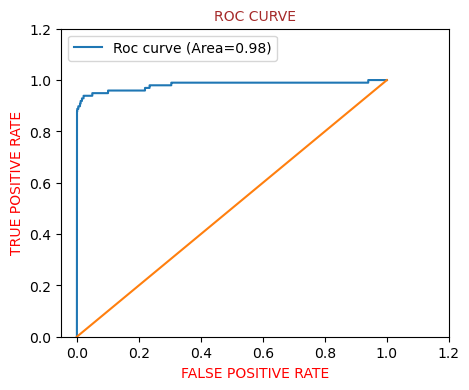

In [223]:
plt.figure(figsize=(5,4))
draw_roc_curve(y_test,y_test_pred_xgboost_proba)

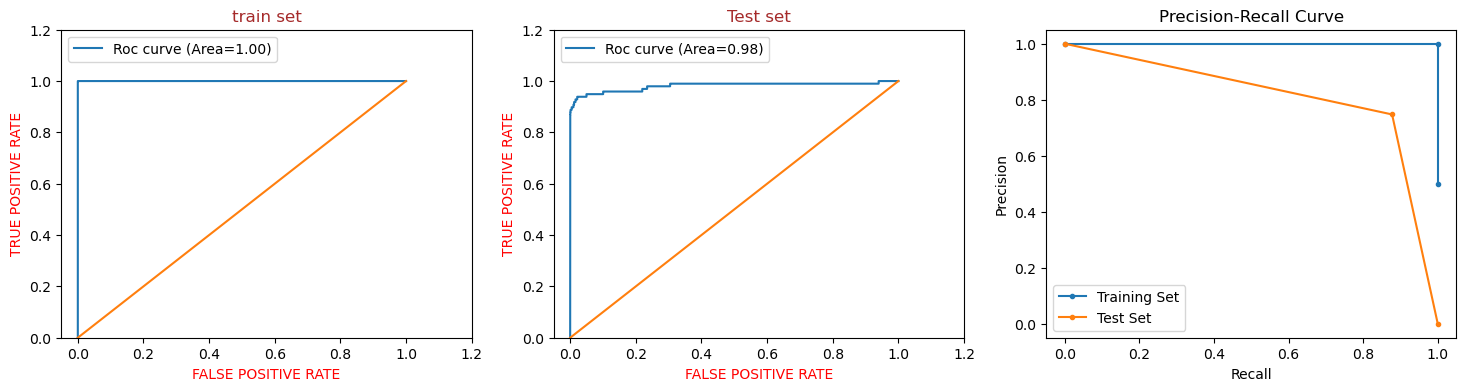

In [224]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
draw_roc_curve(y_train_smote,y_train_pred_xgboost_proba_smote)
plt.title('train set')

plt.subplot(1,3,2)
draw_roc_curve(y_test,y_test_pred_xgboost_proba)
plt.title('Test set')


plt.subplot(1,3,3)

# Calculate Precision-Recall for Training Set
precision_train, recall_train, _ = precision_recall_curve(y_train_smote, y_train_pred_xgboost_smote)

# Calculate Precision-Recall for Test Set
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_pred_xgboost)



# Plotting Precision-Recall Curve for both Training and Test Sets
plt.plot(recall_train, precision_train, label='Training Set', marker='.')
plt.plot(recall_test, precision_test, label='Test Set', marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

plt.show()


<b><font color=black style = 'font-family:cambria; font-size:15px'> OverAll Model Summary OF `XGBoost`  </font><b>
<br>

<table>
<tr><th>XGBoost </th><th>XGBoost  Smote</th></tr>
<tr><td>

XG Boost|Train Results|Test Result
-|-|-
Sensitivity | 1|0.816
Specificity| 1|0.999
Accuracy | 1|0.999
F1-score | 1|0.86
Roc Curve|1|0.97

</td><td>

XGBoost |Train Results|Test Result
-|-|-
Sensitivity | 1|0.88
Specificity| 1|0.999
Accuracy | 1|0.99
F1-Score|1|0.807
Roc Curve|1|0.98

</td></tr> </table>

<center><b><font color=black style = 'font-family:cambria; font-size:23px'> Decision Tree By SMOTE</font><b><center>

In [225]:

# Record the start time
start_time = time.time()



param_grid = {
    'max_depth': [3, 5, 7],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
}


# Create K-fold cross-validation
folds = KFold(n_splits=3, shuffle=True, random_state=42)

# Create GridSearchCV to find the best parameters for Decision Tree
model_cv = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, scoring='recall', cv=folds, verbose=1, n_jobs=-1)
model_cv.fit(X_train_smote, y_train_smote)


# Record the end time
end_time = time.time()
# Calculate the elapsed time in seconds
elapsed_time_seconds = end_time - start_time

# Convert elapsed time to minutes
elapsed_time_minutes = elapsed_time_seconds / 60

print(f"Elapsed Time (Minutes): {elapsed_time_minutes:.2f}")

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Elapsed Time (Minutes): 17.20


In [226]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results.head(3)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      29.017468      0.432388         0.252301        0.021964   
1      28.345271      0.107873         0.267042        0.023284   
2      28.369559      0.001282         0.228510        0.001672   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               3                      1   
1            gini               3                      1   
2            gini               3                      1   

  param_min_samples_split                                             params  \
0                       2  {'criterion': 'gini', 'max_depth': 3, 'min_sam...   
1                       5  {'criterion': 'gini', 'max_depth': 3, 'min_sam...   
2                      10  {'criterion': 'gini', 'max_depth': 3, 'min_sam...   

   split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
0           0.918193           0.875185           0.876111          0.88983   
1           0.918193           0.875185           0.876111          0.88983   
2           0.918193           0.875185           0.876111          0.88983   

   std_test_score  rank_test_score  
0         0.02006               37  
1         0.02006               37  
2         0.02006               37

In [227]:
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_max_depth', 'param_min_samples_leaf',
       'param_min_samples_split', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [228]:
print(f"The Best params Is {model_cv.best_params_}")
print(f"The Best score Is {model_cv.best_score_}")

The Best params Is {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
The Best score Is 0.978448463343796



<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Choosing Best Parameters For  `Decision Trees` Using Smote </b></font><br>


In [229]:
dtree_smote=DecisionTreeClassifier(random_state=100,
                                    criterion=model_cv.best_params_['criterion'],
                                    max_depth=model_cv.best_params_['max_depth'],
                                    min_samples_leaf=model_cv.best_params_['min_samples_leaf'],
                                    min_samples_split=model_cv.best_params_['min_samples_split'])

In [230]:
dtree_smote.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier(max_depth=7, random_state=100)

<img src='images/6.1.png' width=700px>

Top var = 14
2nd Top var = 4
3rd Top var = 8


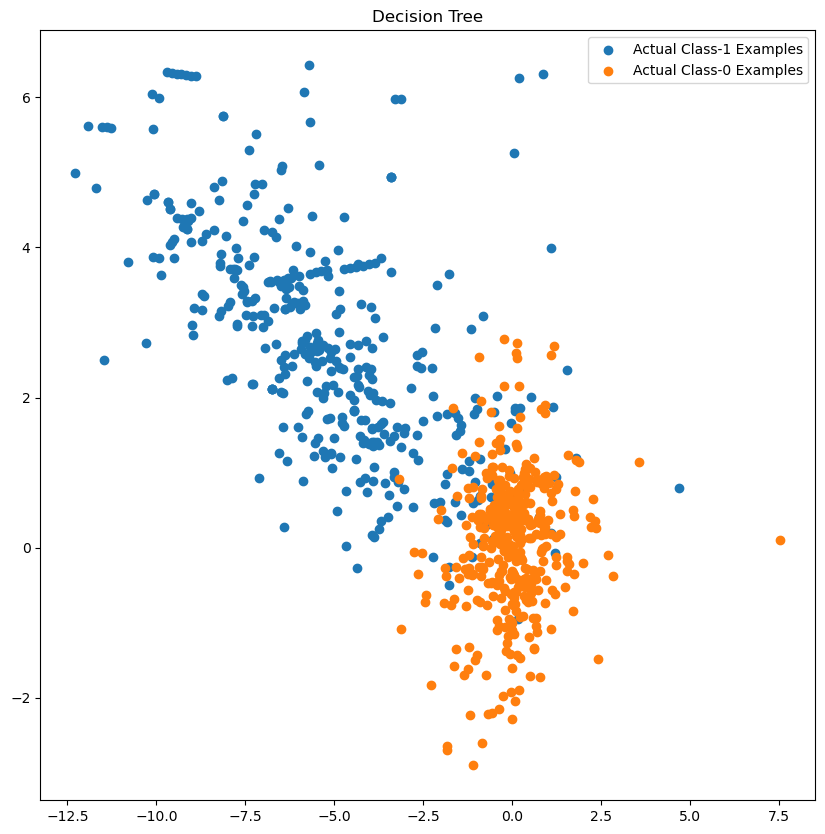

In [231]:
var_imp = []
for i in dtree_smote.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(dtree_smote.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(dtree_smote.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(dtree_smote.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(dtree_smote.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(dtree_smote.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.title('Decision Tree')
plt.legend()
plt.show()

In [232]:
y_train_pred_dtree_smote=dtree_smote.predict(X_train_smote)


<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Confusion Metrix For `Decision Tree` Smote `Train Case`</b></font><br>


In [233]:
confusion_matrix_dtree_train_smote=confusion_matrix(y_train_smote,y_train_pred_dtree_smote)

In [234]:
confusion_matrix_dtree_train_smote

array([[221257,   6194],
       [  5838, 221613]], dtype=int64)

In [235]:
TN = confusion_matrix_dtree_train_smote[0,0] # True negative
FP = confusion_matrix_dtree_train_smote[0,1] # False positive
FN = confusion_matrix_dtree_train_smote[1,0] # False negative
TP = confusion_matrix_dtree_train_smote[1,1] # True positive

In [236]:
calculation_metrics(TN, FP, FN, TP)

The Sensitivity  is : 0.974332933247161
The Specificity  is : 0.9727677609682964


In [237]:
accuracy=metrics.accuracy_score(y_train,y_train_pred_dtree)
print('The Accuracy of Decision Trees For Train is :',accuracy)
    
F1_score=metrics.f1_score(y_train,y_train_pred_dtree)
print("The F1-score of  Decision Trees For Train is :", F1_score)

The Accuracy of Decision Trees For Train is : 0.9994601593188351
The F1-score of  Decision Trees For Train is : 0.8312757201646092


In [238]:
# classification_report
print(classification_report(y_train, y_train_pred_dtree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.90      0.77      0.83       394

    accuracy                           1.00    227845
   macro avg       0.95      0.88      0.92    227845
weighted avg       1.00      1.00      1.00    227845




<font color="black " style ="font-family:Cambria ;font-size:18px"><b>`ROC_AUC` Curve on Train set For `Decision Tree` Using Smote </b></font><br>


In [239]:
y_train_pred_dtree_proba_smote=dtree_smote.predict_proba(X_train_smote)[:,1]

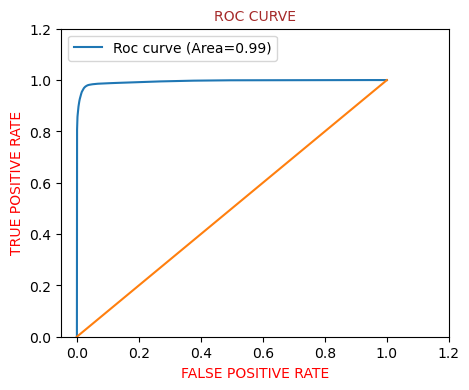

In [240]:
plt.figure(figsize=(5,4))
draw_roc_curve(y_train_smote,y_train_pred_dtree_proba_smote)

<b><font color=black style = 'font-family:cambria; font-size:18px'>Let's Do Predictions On The `Test Set` </font><b>

In [241]:
y_test_pred_dtree=dtree_smote.predict(X_test)

In [242]:
y_test_pred_dtree_proba=dtree_smote.predict_proba(X_test)[:,1]


<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Confusion Metrix For Decision `Test Case`  </b></font><br>


In [243]:
confusion_matrix_dtree_test=confusion_matrix(y_test,y_test_pred_dtree)
confusion_matrix_dtree_test

array([[55211,  1653],
       [   11,    87]], dtype=int64)

In [244]:
TN = confusion_matrix_dtree_test[0,0] # True negative
FP = confusion_matrix_dtree_test[0,1] # False positive
FN = confusion_matrix_dtree_test[1,0] # False negative
TP = confusion_matrix_dtree_test[1,1] # True positive

In [245]:
calculation_metrics(TN, FP, FN, TP)

The Sensitivity  is : 0.8877551020408163
The Specificity  is : 0.9709306415306697


In [246]:
accuracy=metrics.accuracy_score(y_test,y_test_pred_dtree)
print('The Accuracy of Decision Tree For Test is :',accuracy)


The Accuracy of Decision Tree For Test is : 0.9707875425722411


In [247]:
# classification_report
print(classification_report(y_test, y_test_pred_dtree))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.89      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.93      0.54     56962
weighted avg       1.00      0.97      0.98     56962




<font color="black " style ="font-family:Cambria ;font-size:18px"><b>`ROC_AUC` Curve on Test set For `Decision Tree`  </b></font><br>


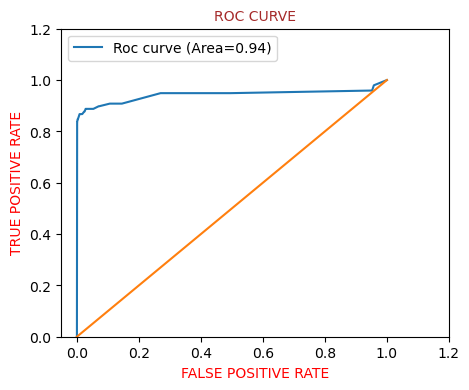

In [248]:
plt.figure(figsize=(5,4))
draw_roc_curve(y_test,y_test_pred_dtree_proba)

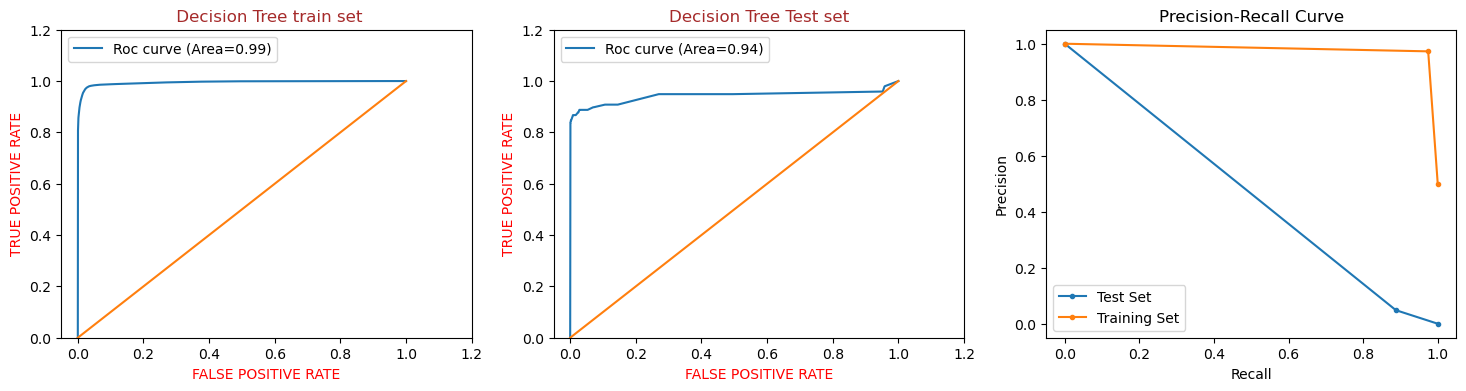

In [249]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
draw_roc_curve(y_train_smote,y_train_pred_dtree_proba_smote)

plt.title(' Decision Tree train set')

plt.subplot(1,3,2)
draw_roc_curve(y_test,y_test_pred_dtree_proba)

plt.title('Decision Tree Test set')

plt.subplot(1,3,3)
# Calculate Precision-Recall for Test Set
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_pred_dtree)
# Calculate Precision-Recall for Training Set
precision_train, recall_train, _ = precision_recall_curve(y_train_smote, y_train_pred_dtree_smote)





# Plotting Precision-Recall Curve for both Training and Test Sets
plt.plot(recall_test, precision_test, label='Test Set', marker='.')

plt.plot(recall_train, precision_train, label='Training Set', marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


plt.show()

<b><font color=black style = 'font-family:cambria; font-size:15px'> OverAll Model Summary OF `Decision Tree ` </font><b>
<br>



<table>
<tr><th>Decision Tree </th><th>Decision Tree Smote</th></tr>
<tr><td>
    
Decision Tree |Train Results|Test Result
-|-|-
Sensitivity | 0.77|0.724
Specificity| 0.999|0.999
Accuracy | 0.999|0.999
F1-score | 0.8312|0.767
Roc Curve|0.95|0.93

</td><td>
    
Decision Tree |Train Results|Test Result
-|-|-
Sensitivity | 0.97|0.887
Specificity| 0.97|0.97
Accuracy | 0.99|0.97
F1-score | 0.83|0.78
Roc Curve|0.99|0.94

</td></tr> </table>

<center><b><font color=black style = 'font-family:cambria; font-size:23px'> Random Foreset By SMOTE</font><b><center><br>
     

<font color=green style = 'font-family:cambria; font-size:15px'>As I Observed That `Random Forest`, Especially With A `Large Number Of Trees And Deep Trees`, Can Indeed Be `Computationally Expensive`, And Applying SMOTE May Further `Increase The Training Time` Due To The `Generation Of Synthetic` Samples.</font>

<font color=green style = 'font-family:cambria; font-size:15px'>Using `SMOTE` (Synthetic Minority Over-Sampling Technique) `Increases` The Number Of `Minority Class Samples` By Generating `Synthetic Examples`, Making The Dataset More Balanced. While This Can Be Beneficial For Improving The Performance Of Models, It Comes With A Computational Cost, Especially For Algorithms That Build A Large Number Of Models Or Trees, Such As Random Forests.</font>

<font color=black style = 'font-family:cambria; font-size:15px'> 1. Increased Dataset Size</font><br>
<font color=black style = 'font-family:cambria; font-size:15px'> 2. Complexity of the Model</font><br>
<font color=black style = 'font-family:cambria; font-size:15px'>3. Tree Building Process  </font><br>
<font color=black style = 'font-family:cambria; font-size:15px'>4. Hyperparameter Tuning</font><br>
<font color=black style = 'font-family:cambria; font-size:15px'>5. Parallelization</font><br>

In [250]:
# # Record the start time
# start_time = time.time()

# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     'max_features': ['auto', 'sqrt'],
# }
# random_forest=RandomForestClassifier()

# model_cv = GridSearchCV(estimator=random_forest,
#                         param_grid=param_grid,
#                         scoring='roc_auc',
#                         cv=3,
#                         verbose=2,
#                         n_jobs=-1,
#                        return_train_score=True)



# model_cv .fit(X_train_smote,y_train_smote)




# # Record the end time
# end_time = time.time()
# # Calculate the elapsed time in seconds
# elapsed_time_seconds = end_time - start_time

# # Convert elapsed time to minutes
# elapsed_time_minutes = elapsed_time_seconds / 60

# print(f"Elapsed Time (Minutes): {elapsed_time_minutes:.2f}")

- Fitting 3 folds for each of 48 candidates, totalling 144 fits
- Elapsed Time (Minutes): 320.21

In [251]:
# print(f"The Best params Is {model_cv.best_params_}")
# print(f"The Best score Is {model_cv.best_score_}")

- The Best params Is {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
- The Best score Is 0.9999992507532394


<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Choosing Best Parameters For `Random Forest` Using Smote  </b></font><br>


In [252]:
random_forest_smote=RandomForestClassifier(random_state=100,
                                     criterion='gini',
                                     max_depth=None,
                                     min_samples_leaf=1,
                                     min_samples_split=5,
                                     n_estimators=100,
                                     max_features='sqrt')

In [253]:
random_forest_smote.fit(X_train_smote,y_train_smote)

RandomForestClassifier(min_samples_split=5, random_state=100)

<img src='images/7.png' width=700px>

Top var = 14
2nd Top var = 10
3rd Top var = 4


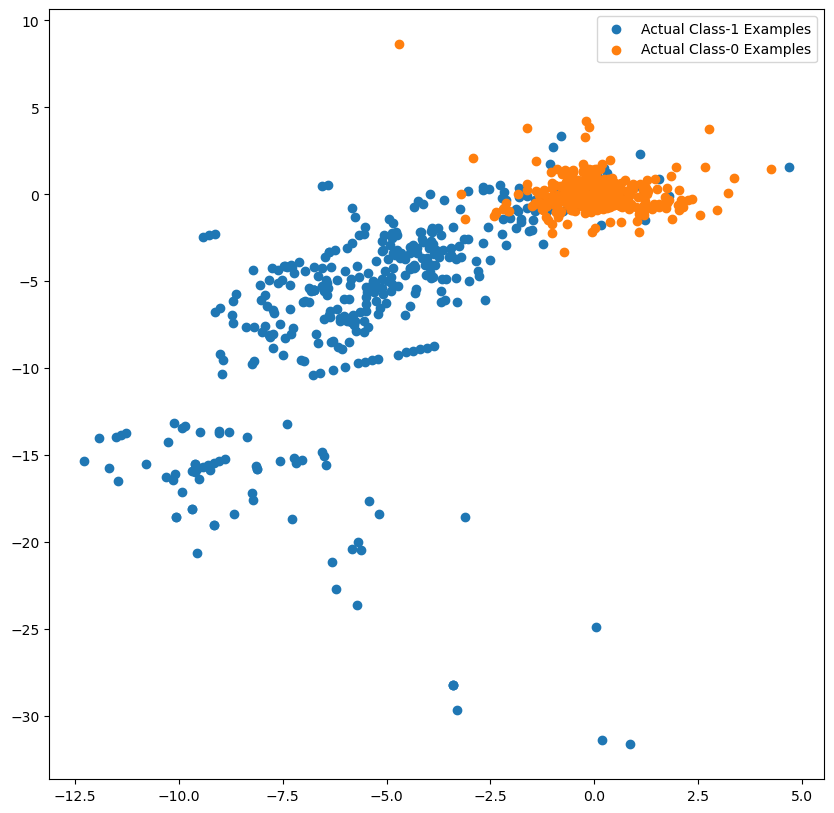

In [254]:
var_imp = []
for i in random_forest_smote.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(random_forest_smote.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(random_forest_smote.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(random_forest_smote.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(random_forest_smote.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(random_forest_smote.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()



<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Predictions On Random Forest `Train Case`</b></font><br>


In [255]:
y_train_pred_random_forest_smote=random_forest_smote.predict(X_train_smote)


<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Confusion Metrix For Random Forest `Train Case`</b></font><br>


In [256]:
confusion_matrix_random_forest_train_smote=confusion_matrix(y_train_smote,y_train_pred_random_forest_smote)

In [257]:
confusion_matrix_random_forest_train_smote

array([[227451,      0],
       [     0, 227451]], dtype=int64)

In [258]:
TN = confusion_matrix_random_forest_train_smote[0,0] # True negative
FP = confusion_matrix_random_forest_train_smote[0,1] # False positive
FN = confusion_matrix_random_forest_train_smote[1,0] # False negative
TP = confusion_matrix_random_forest_train_smote[1,1] # True positive

In [259]:
calculation_metrics(TN, FP, FN, TP)

The Sensitivity  is : 1.0
The Specificity  is : 1.0


In [260]:
accuracy=metrics.accuracy_score(y_train_smote,y_train_pred_random_forest_smote)
print('The Accuracy of random_forest For Train is :',accuracy)
    
F1_score=metrics.f1_score(y_train_smote,y_train_pred_random_forest_smote)
print("The F1-score of  random_forest For Train is :", F1_score)

The Accuracy of random_forest For Train is : 1.0
The F1-score of  random_forest For Train is : 1.0


In [261]:
# classification_report
print(classification_report(y_train_smote,y_train_pred_random_forest_smote))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902




<font color="black " style ="font-family:Cambria ;font-size:18px"><b>`ROC_AUC` Curve on Train set For `Random Forest`  </b></font><br>


In [262]:
y_train_pred_random_forest_proba_smote = random_forest_smote.predict_proba(X_train_smote)[:,1]

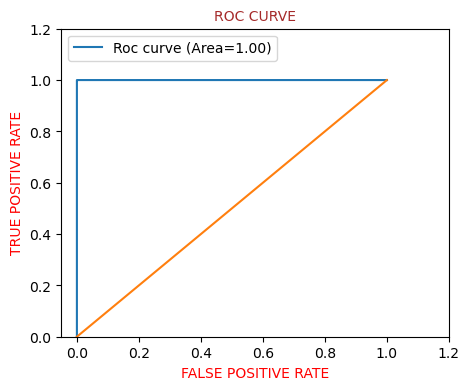

In [263]:
plt.figure(figsize=(5,4))
draw_roc_curve(y_train_smote,y_train_pred_random_forest_proba_smote)

<b><font color=black style = 'font-family:cambria; font-size:18px'>Let's Do Predictions On The `Test Set` </font><b>

In [264]:
y_test_pred_random_forest=random_forest_smote.predict(X_test)

In [265]:
y_test_pred_random_forest_proba=random_forest_smote.predict_proba(X_test)[:,1]


<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Confusion Metrix For Random Forest `Test Case`  </b></font><br>


In [266]:
confusion_matrix_random_forest_test=confusion_matrix(y_test,y_test_pred_random_forest)
confusion_matrix_random_forest_test

array([[56851,    13],
       [   18,    80]], dtype=int64)

In [267]:
TN = confusion_matrix_random_forest_test[0,0] # True negative
FP = confusion_matrix_random_forest_test[0,1] # False positive
FN = confusion_matrix_random_forest_test[1,0] # False negative
TP = confusion_matrix_random_forest_test[1,1] # True positive

In [268]:
calculation_metrics(TN, FP, FN, TP)

The Sensitivity  is : 0.8163265306122449
The Specificity  is : 0.9997713843556556


In [269]:
accuracy=metrics.accuracy_score(y_test,y_test_pred_random_forest)
print('The Accuracy of random_forest For Test is :',accuracy)
    
F1_score=metrics.f1_score(y_test,y_test_pred_random_forest)
print("The F1-score of random_forest For Test is :", F1_score)

The Accuracy of random_forest For Test is : 0.9994557775359011
The F1-score of random_forest For Test is : 0.837696335078534


In [270]:
# classification_report
print(classification_report(y_test, y_test_pred_random_forest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.82      0.84        98

    accuracy                           1.00     56962
   macro avg       0.93      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962




<font color="black " style ="font-family:Cambria ;font-size:18px"><b>`ROC_AUC` Curve on Test set For `Random Forest`  </b></font><br>


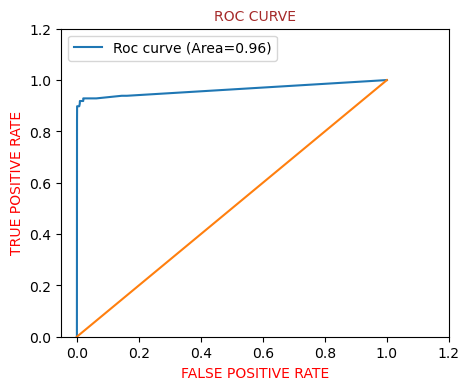

In [271]:
plt.figure(figsize=(5,4))
draw_roc_curve(y_test,y_test_pred_random_forest_proba)


<b><font color=black style = 'font-family:cambria; font-size:15px'> OverAll Model Summary OF `Random Forest `  </font><b><br>
    
- <font color=green style = 'font-family:cambria; font-size:15px'>As I Observed That Random Forest, There is Nothing Changes in Metrix only `Sensitivity` has `Incresed Slightly`</font>
    
<table>
<tr><th>Random Forest </th><th>Random Forest  By Smote</th></tr>
<tr><td>

Random Forest|Train Results|Test Result
-|-|-
Sensitivity | 0.822|0.80
Specificity| 0.999|0.99
Accuracy | 0.999|0.99
F1-score | 0.901|0.86
Roc Curve|0.999|0.98

</td><td>

Random Forest|Train Results|Test Result
-|-|-
Sensitivity | 1|0.816
Specificity| 1|0.999
Accuracy | 1|0.999
F1-score | 1|0.83
Roc Curve|1|0.96

</td></tr> </table>

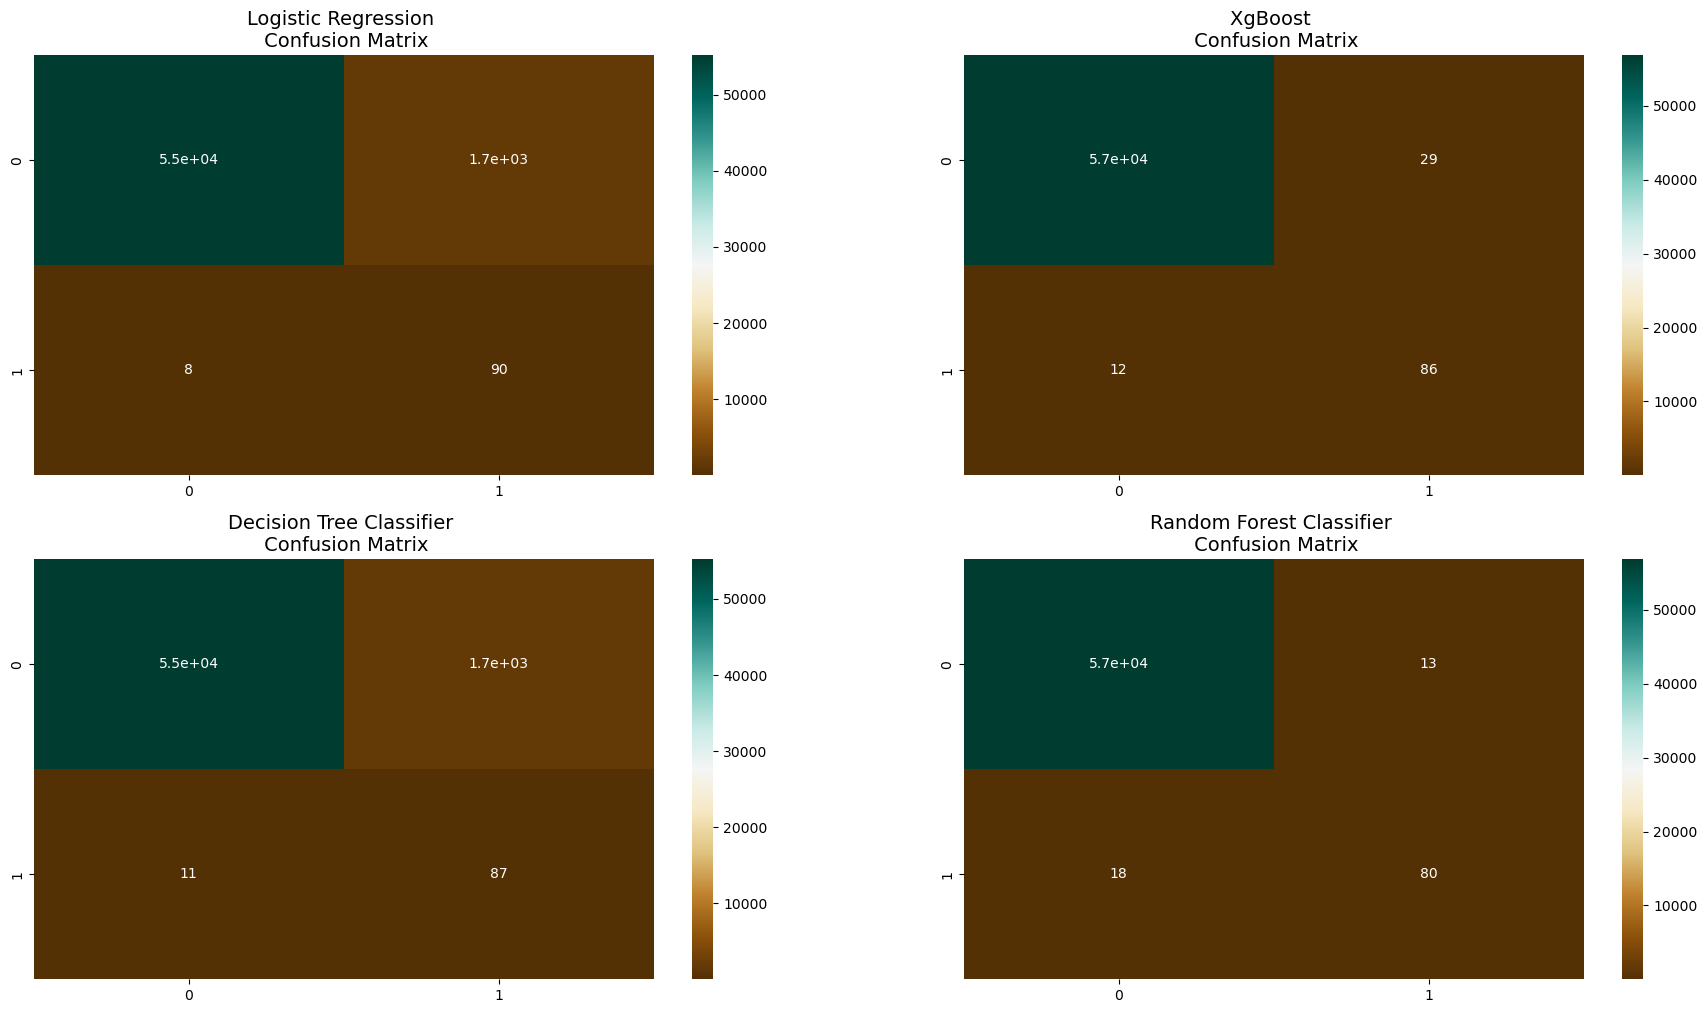

In [272]:
from sklearn.metrics import confusion_matrix

# all models fitted using SMOTE technique
y_test_pred_logistic = logistic_smote.predict(X_test)

y_test_pred_xgboost = xgb_smote.predict(X_test)
y_test_pred_dtree = dtree_smote.predict(X_test)
y_test_pred_random_forest = random_forest_smote.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_test_pred_logistic)
xgboost_cf = confusion_matrix(y_test, y_test_pred_xgboost)
dtree_cf = confusion_matrix(y_test, y_test_pred_dtree)
random_forest_cf = confusion_matrix(y_test, y_test_pred_random_forest)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.BrBG)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
# ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
# ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(xgboost_cf, ax=ax[0][1], annot=True, cmap=plt.cm.BrBG)
ax[0][1].set_title("XgBoost \n Confusion Matrix", fontsize=14)


sns.heatmap(dtree_cf, ax=ax[1][0], annot=True, cmap=plt.cm.BrBG)
ax[1][0].set_title("Decision Tree Classifier \n Confusion Matrix", fontsize=14)


sns.heatmap(random_forest_cf, ax=ax[1][1], annot=True, cmap=plt.cm.BrBG)
ax[1][1].set_title("Random Forest Classifier \n Confusion Matrix", fontsize=14)



plt.show()


<b><center><font color= 'Black' style = 'font-family:verdana ; font-size:20px'>Adaptive Synthetic Sampling</font></center></b>
<hr style="color: black; height: 0.5px;">

-   <font color=brown style = 'font-family:cambria; font-size:15px'>`ADASYN`, which stands for `Adaptive Synthetic Sampling`, is an `oversampling technique` used in machine learning, particularly in the `context of imbalanced datasets`. It is designed to address the challenge of `class imbalance` by generating synthetic samples `for the minority class`. What sets ADASYN apart is its `adaptive nature` – it focuses on `generating more synthetic` examples for the minority class instances that are harder to classify, aiming to alleviate the impact of class imbalance on model performance.</font> 
-   <font color=brown style = 'font-family:cambria; font-size:15px'>Adaptive Synthetic Sampling (ADASYN) is a technique used to address `imbalanced datasets in machine learning`, `improving classification performance` for underrepresented classes.</font>
-   <font color=brown style = 'font-family:cambria; font-size:15px'>`Adasyn` : Similar To Smote, It Adapts By Introducing Synthetic Samples Based On A Density Distribution, Focusing On Harder-To-Learn Minority Examples.</font>  



In [273]:
# importing adasyn
from imblearn.over_sampling import ADASYN

In [274]:
# Instantiate adasyn
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

In [275]:
from collections import Counter

# Before sampling class distribution
print('Before sampling class distribution:', Counter(y_train))

# New class distribution
print('New class distribution:', Counter(y_train_adasyn))

Before sampling class distribution: Counter({0: 227451, 1: 394})
New class distribution: Counter({0: 227451, 1: 227434})


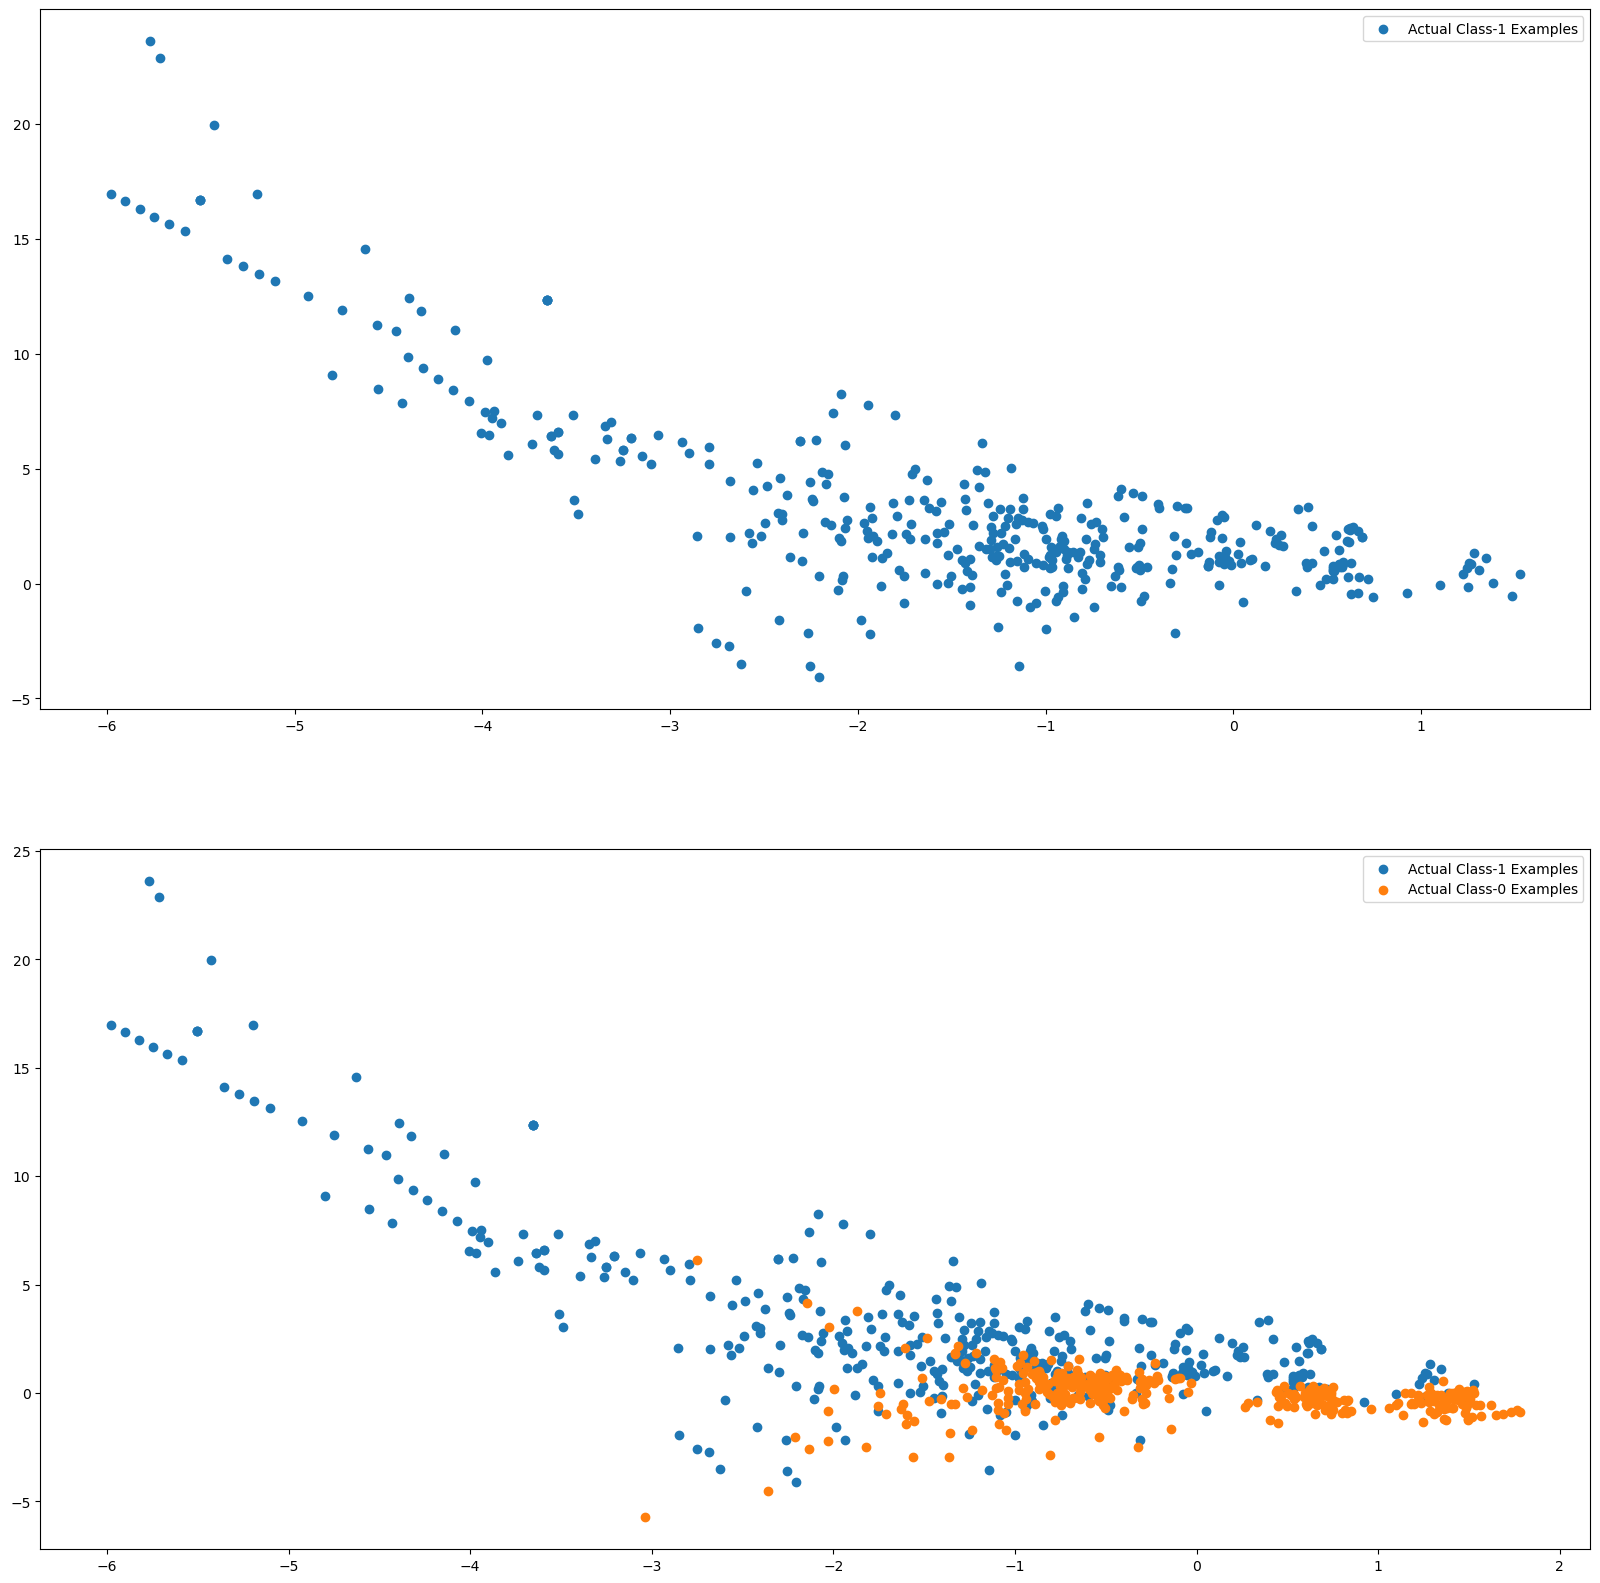

In [276]:
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(2, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()


plt.subplot(2, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()
plt.show()

<center><b><font color=black style = 'font-family:cambria; font-size:23px'> Logistic Regression By Adasyn</font><b><center>

In [277]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type
    'class_weight': ['balanced', None],  # Adjusts for class imbalance
}

# Create K-fold cross-validation
folds = KFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV to find the best parameters for logistic regression
model_cv = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, scoring='recall', cv=folds, verbose=1, n_jobs=-1)
model_cv.fit(X_train_adasyn, y_train_adasyn)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2']},
             scoring='recall', verbose=1)

<img src='images/logistic _adasyn.png' width=400px>

In [278]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results.head(3)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.813362      0.042376         0.000000        0.000000   0.001   
1       7.124585      0.283208         0.119242        0.018495   0.001   
2       1.265908      0.523314         0.000000        0.000000   0.001   

  param_class_weight param_penalty  \
0           balanced            l1   
1           balanced            l2   
2               None            l1   

                                              params  split0_test_score  \
0  {'C': 0.001, 'class_weight': 'balanced', 'pena...                NaN   
1  {'C': 0.001, 'class_weight': 'balanced', 'pena...           0.910413   
2  {'C': 0.001, 'class_weight': None, 'penalty': ...                NaN   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0                NaN                NaN                NaN                NaN   
1           0.913618           0.910748            0.91042           0.910057   
2                NaN                NaN                NaN                NaN   

   mean_test_score  std_test_score  rank_test_score  
0              NaN             NaN               11  
1         0.911051        0.001302                9  
2              NaN             NaN               11

In [279]:
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_class_weight', 'param_penalty', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [280]:
# best score
best_score=model_cv.best_score_
# best params
best_params=model_cv.best_params_

In [281]:
print(f"The Best Score Is {best_score}")
print(f"The Best Params Is {best_params}")

The Best Score Is 0.9260570575489689
The Best Params Is {'C': 10, 'class_weight': None, 'penalty': 'l2'}



<font color="black " style ="font-family:Cambria ;font-size:18px"><b> Logistic Regression With Optimal  Value That Is `c=10` </b></font><br>


In [282]:
logistic_=LogisticRegression(C=10,penalty='l2',class_weight=None)

In [283]:
# fiitting the model on train set
logistic_adasyn=logistic_.fit(X_train_adasyn,y_train_adasyn)


<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Prediction  On Train set Using Adasyn `Logistic Regression`  </b></font><br>


In [284]:
y_train_pred_logistic_adasyn=logistic_adasyn.predict(X_train_adasyn)


<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Confusion Metrix For Adasyn `Logistic Regression`  </b></font><br>


In [285]:
confusion_matrix_logistic_train_adasyn=metrics.confusion_matrix(y_train_adasyn,y_train_pred_logistic_adasyn)

In [286]:
confusion_matrix_logistic_train_adasyn

array([[208284,  19167],
       [ 16796, 210638]], dtype=int64)

In [287]:
TN = confusion_matrix_logistic_train_adasyn[0,0] # True negative
FP = confusion_matrix_logistic_train_adasyn[0,1] # False positive
FN = confusion_matrix_logistic_train_adasyn[1,0] # False negative
TP = confusion_matrix_logistic_train_adasyn[1,1] # True positive

In [288]:
calculation_metrics(TN,FP,FN,TP)

The Sensitivity  is : 0.9261500039571919
The Specificity  is : 0.9157313003679913


In [289]:
accuracy=metrics.accuracy_score(y_train_adasyn,y_train_pred_logistic_adasyn)
print('The Accuracy of Logistic Regression By Using Adasyn For Train is :',accuracy)
    
F1_score=metrics.f1_score(y_train_adasyn,y_train_pred_logistic_adasyn)
print("The F1-score of Logistic Regression By Using Adasyn For Train is :", F1_score)

The Accuracy of Logistic Regression By Using Adasyn For Train is : 0.9209404574782637
The F1-score of Logistic Regression By Using Adasyn For Train is : 0.9213474791083001


In [290]:
# classificatino report
print(classification_report(y_train_adasyn,y_train_pred_logistic_adasyn))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92    227451
           1       0.92      0.93      0.92    227434

    accuracy                           0.92    454885
   macro avg       0.92      0.92      0.92    454885
weighted avg       0.92      0.92      0.92    454885



In [291]:
# predicted probability
y_train_pred_logistic_proba_adasyn=logistic_adasyn.predict_proba(X_train_adasyn)[:,1]


<font color="black " style ="font-family:Cambria ;font-size:18px"><b>`ROC_AUC` Curve on Training set For `Logistic Regression`  </b></font><br>


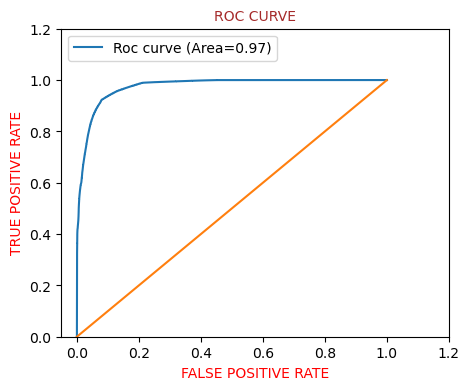

In [292]:
plt.figure(figsize=(5,4))
draw_roc_curve(y_train_adasyn,y_train_pred_logistic_proba_adasyn)

<font color=brown style = 'font-family:cambria; font-size:15px'>Avoid applying ADASYN or any oversampling technique to the test set. Modifying the test set with synthetic instances can distort its representation and lead to misleading assessments. Keep the test set untouched for fair evaluation, applying oversampling only to the training set to ensure the model's robustness in handling imbalanced data.
 </font>
 <br>  

<b><font color=black style = 'font-family:cambria; font-size:15px'>Let's Do Predictions On The `Test Set` </font><b>

In [293]:
y_test_pred_logistic=logistic_adasyn.predict(X_test)

In [294]:
y_test_pred_logistic_proba=logistic_adasyn.predict_proba(X_test)[:,1]

In [295]:
confusion_matrix_logistic_test=confusion_matrix(y_test,y_test_pred_logistic)
confusion_matrix_logistic_test

array([[51950,  4914],
       [    7,    91]], dtype=int64)

In [296]:
TN = confusion_matrix_logistic_test[0,0] # True negative
FP = confusion_matrix_logistic_test[0,1] # False positive
FN = confusion_matrix_logistic_test[1,0] # False negative
TP = confusion_matrix_logistic_test[1,1] # True positive

In [297]:
calculation_metrics(TN, FP, FN, TP)

The Sensitivity  is : 0.9285714285714286
The Specificity  is : 0.9135832864378165


In [298]:
accuracy=metrics.accuracy_score(y_test,y_test_pred_logistic)
print('The Accuracy of Logistic Regression For Test is :',accuracy)

The Accuracy of Logistic Regression For Test is : 0.9136090727151435


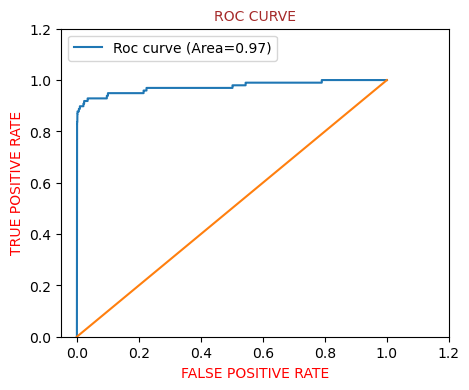

In [299]:
plt.figure(figsize=(5,4))
draw_roc_curve(y_test,y_test_pred_logistic_proba)

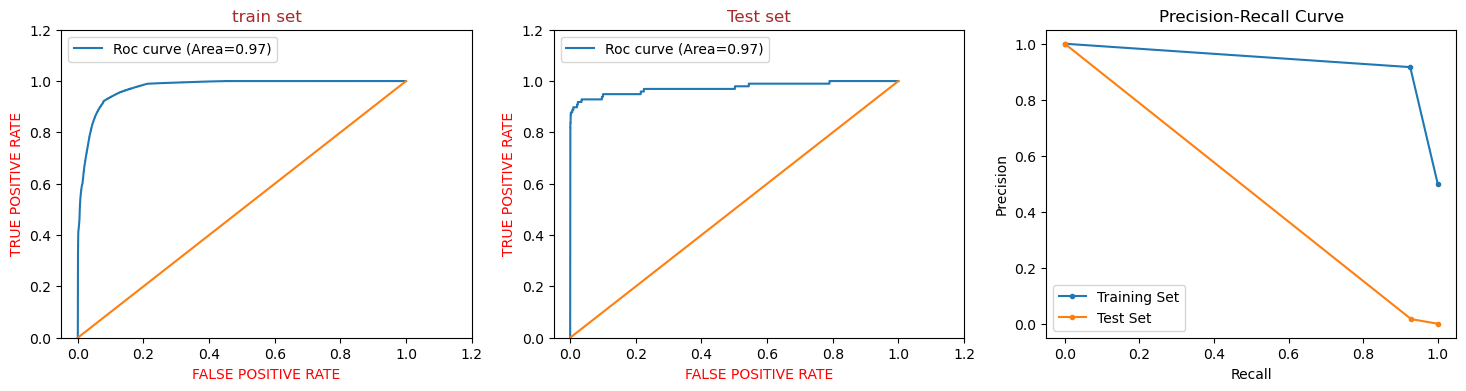

In [300]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
draw_roc_curve(y_train_adasyn,y_train_pred_logistic_proba_adasyn)
plt.title('train set')

plt.subplot(1,3,2)
draw_roc_curve(y_test,y_test_pred_logistic_proba)
plt.title('Test set')


plt.subplot(1,3,3)

# Calculate Precision-Recall for Training Set
precision_train, recall_train, _ = precision_recall_curve(y_train_adasyn, y_train_pred_logistic_adasyn)

# Calculate Precision-Recall for Test Set
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_pred_logistic)



# Plotting Precision-Recall Curve for both Training and Test Sets
plt.plot(recall_train, precision_train, label='Training Set', marker='.')
plt.plot(recall_test, precision_test, label='Test Set', marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

plt.show()


<b><font color=black style = 'font-family:cambria; font-size:15px'> OverAll Model Summary OF `Logistic Regression` </font><b>
<br>
    
<table>
<tr><th>Logistic Regression </th><th>Logistic Regression With Smote</th><th>Logistic Regression With Adasyn</th></tr>
<tr><td>

Logistic Regression|Train Results|Test Result
-|-|-
Sensitivity | 0.66|0.69
Specificity| 0.99|0.99
Accuracy | 0.99|0.99
Roc Curve|0.99|0.97

</td><td>

Logistic Regression Smote |Train Results|Test Result
-|-|-
Sensitivity | 0.94|0.92
Specificity| 0.97|0.97
Accuracy | 0.954|0.97
Roc Curve|0.99|0.97

</td><td>

Logistic Regression Adasyn|Train Results|Test Result
-|-|-
Sensitivity | 0.926|0.928
Specificity| 0.915|0.913
Accuracy | 0.92|0.913
Roc Curve|0.97|0.97

</td></tr> </table>

<center><b><font color=black style = 'font-family:cambria; font-size:23px'> XGBoost Adasyn</font><b><center>

In [301]:
# Record the start time
start_time = time.time()

# Create the extended parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 4, 5],  # Maximum depth of a tree
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for fitting the individual base learner
}

# Create K-fold cross-validation
folds = KFold(n_splits=3, shuffle=True, random_state=42)

# Create GridSearchCV to find the best parameters for XGBoost
model_cv = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, scoring='recall', cv=folds, verbose=1, n_jobs=-1)
model_cv.fit(X_train_adasyn, y_train_adasyn)


# Record the end time
end_time = time.time()
# Calculate the elapsed time in seconds
elapsed_time_seconds = end_time - start_time

# Convert elapsed time to minutes
elapsed_time_minutes = elapsed_time_seconds / 60

print(f"Elapsed Time (Minutes): {elapsed_time_minutes:.2f}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Elapsed Time (Minutes): 20.98


In [302]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results.head(3)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      25.720417      0.310848         0.864250        0.064203   
1      25.902304      0.402603         0.900376        0.045860   
2      19.064150      0.442147         1.003371        0.156616   

  param_learning_rate param_max_depth param_n_estimators param_subsample  \
0                0.01               3                100             0.8   
1                0.01               3                100             0.9   
2                0.01               3                100             1.0   

                                              params  split0_test_score  \
0  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...           0.886263   
1  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...           0.885696   
2  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...           0.885419   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.882857           0.883318         0.884146        0.001509   
1           0.884282           0.883503         0.884494        0.000908   
2           0.884665           0.884163         0.884749        0.000516   

   rank_test_score  
0               81  
1               80  
2               79

In [303]:
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_learning_rate', 'param_max_depth', 'param_n_estimators',
       'param_subsample', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [304]:
cv_results[['param_learning_rate', 'param_subsample','rank_test_score','mean_test_score']].sort_values(by= 'rank_test_score' ,ascending=True).head(5)

param_learning_rate param_subsample  rank_test_score  mean_test_score
44                 0.1             1.0                1         1.000000
58                 0.2             0.9                1         1.000000
60                 0.2             0.8                1         1.000000
61                 0.2             0.9                1         1.000000
62                 0.2             1.0                5         0.999996

In [305]:
print(f"The Best params Is {model_cv.best_params_}")
print(f"The Best score Is {model_cv.best_score_}")

The Best params Is {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300, 'subsample': 1.0}
The Best score Is 1.0



<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Choosing Best Parameters For  `XGBoost` By Adasyn  </b></font><br>


In [306]:
# chosen hyperparameters
# 'objective':'binary:logistic' which outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': model_cv.best_params_['learning_rate'],
          'max_depth': model_cv.best_params_['max_depth'], 
          'n_estimators': model_cv.best_params_['n_estimators'],
          'subsample':model_cv.best_params_['subsample'],
         'objective':'binary:logistic'}



In [307]:
# fit model on training data
xgb_adasyn= XGBClassifier(params = params)
xgb_adasyn.fit(X_train_adasyn, y_train_adasyn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300,
                      'objective': 'binary:logistic', 'subsample': 1.0}, ...)

<img src='images/8.png' width=700px>

Top var = 14
2nd Top var = 4
3rd Top var = 8


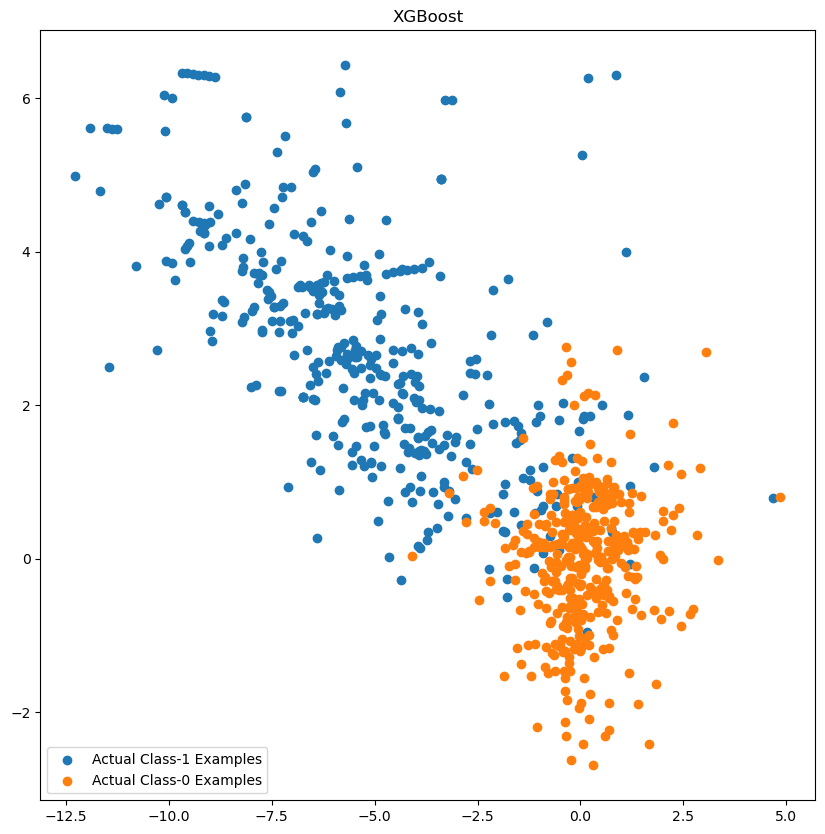

In [308]:
var_imp = []
for i in xgb_adasyn.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_adasyn.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_adasyn.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_adasyn.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_adasyn.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_adasyn.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.title('XGBoost')

plt.legend()
plt.show()

In [309]:
y_train_pred_xgboost_adasyn=xgb_adasyn.predict(X_train_adasyn)


<font color="black " style ="font-family:Cambria ;font-size:16px"><b>Confusion Metrix For XGBoost SMOTE `Train Case`</b></font><br>


In [310]:
confusion_matrix_xgboost_train_adasyn=metrics.confusion_matrix(y_train_adasyn,y_train_pred_xgboost_adasyn)

In [311]:
confusion_matrix_xgboost_train_adasyn

array([[227446,      5],
       [     0, 227434]], dtype=int64)

In [312]:
TN = confusion_matrix_xgboost_train_adasyn[0,0] # True negative
FP = confusion_matrix_xgboost_train_adasyn[0,1] # False positive
FN = confusion_matrix_xgboost_train_adasyn[1,0] # False negative
TP = confusion_matrix_xgboost_train_adasyn[1,1] # True positive

In [313]:
calculation_metrics(TN, FP, FN, TP)

The Sensitivity  is : 1.0
The Specificity  is : 0.9999780172432744


In [314]:
print('The Accurays For The Train Set Of Xgboost Adasyn is ',metrics.accuracy_score(y_train_adasyn,y_train_pred_xgboost_adasyn))
print('The F1-Score For The Train Set Of Xgboost Adasyn is ',metrics.f1_score(y_train_adasyn,y_train_pred_xgboost_adasyn))

The Accurays For The Train Set Of Xgboost Adasyn is  0.9999890082108664
The F1-Score For The Train Set Of Xgboost Adasyn is  0.9999890079208923


In [315]:
# classificatino report
print(classification_report(y_train_adasyn,y_train_pred_xgboost_adasyn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227434

    accuracy                           1.00    454885
   macro avg       1.00      1.00      1.00    454885
weighted avg       1.00      1.00      1.00    454885



In [316]:
# predicted probability
y_train_pred_xgboost_proba_adasyn=xgb_adasyn.predict_proba(X_train_adasyn)[:,1]


<font color="black " style ="font-family:Cambria ;font-size:16px"><b>`ROC_AUC` Curve on Training set For `XGBoost SMOTE`  </b></font><br>


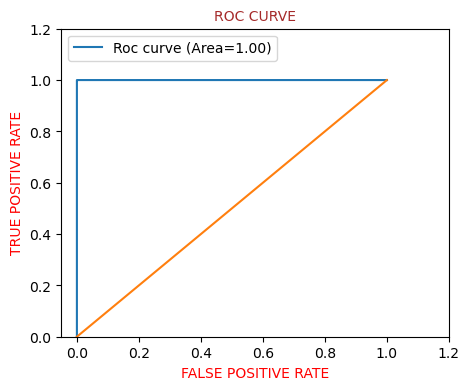

In [317]:
plt.figure(figsize=(5,4))

draw_roc_curve(y_train_adasyn ,y_train_pred_xgboost_proba_adasyn)

<b><font color=black style = 'font-family:cambria; font-size:18px'>Let's Do Predictions On The `Test Set` </font><b>

In [318]:
y_test_pred_xgboost=xgb_adasyn.predict(X_test)

In [319]:
y_test_pred_xgboost_proba=xgb_adasyn.predict_proba(X_test)[:,1]


<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Confusion Metrix For XGBoost `Test Case`  </b></font><br>


In [320]:
confusion_matrix_xgboost_test=confusion_matrix(y_test,y_test_pred_xgboost)
confusion_matrix_xgboost_test

array([[56835,    29],
       [   16,    82]], dtype=int64)

In [321]:
TN = confusion_matrix_xgboost_test[0,0] # True negative
FP = confusion_matrix_xgboost_test[0,1] # False positive
FN = confusion_matrix_xgboost_test[1,0] # False negative
TP = confusion_matrix_xgboost_test[1,1] # True positive

In [322]:
calculation_metrics(TN, FP, FN, TP)

The Sensitivity  is : 0.8367346938775511
The Specificity  is : 0.999490011254924


In [323]:
accuracy=metrics.accuracy_score(y_test,y_test_pred_xgboost)
print('The Accuracy of XG Boost For Test is :',accuracy)
    
F1_score=metrics.f1_score(y_test,y_test_pred_xgboost)
print("The F1-score of XG Boost For Test is :", F1_score)

The Accuracy of XG Boost For Test is : 0.9992099996488887
The F1-score of XG Boost For Test is : 0.784688995215311



<font color="black " style ="font-family:Cambria ;font-size:18px"><b>`ROC_AUC` Curve on Test set For `XGBoost`  </b></font><br>


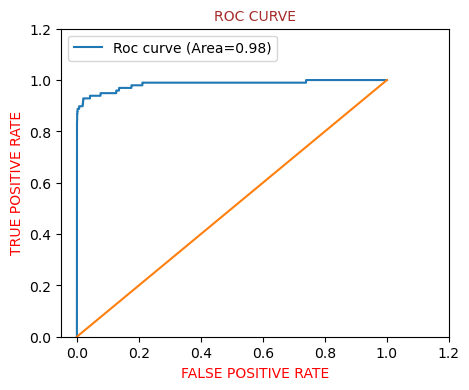

In [324]:
plt.figure(figsize=(5,4))
draw_roc_curve(y_test,y_test_pred_xgboost_proba)

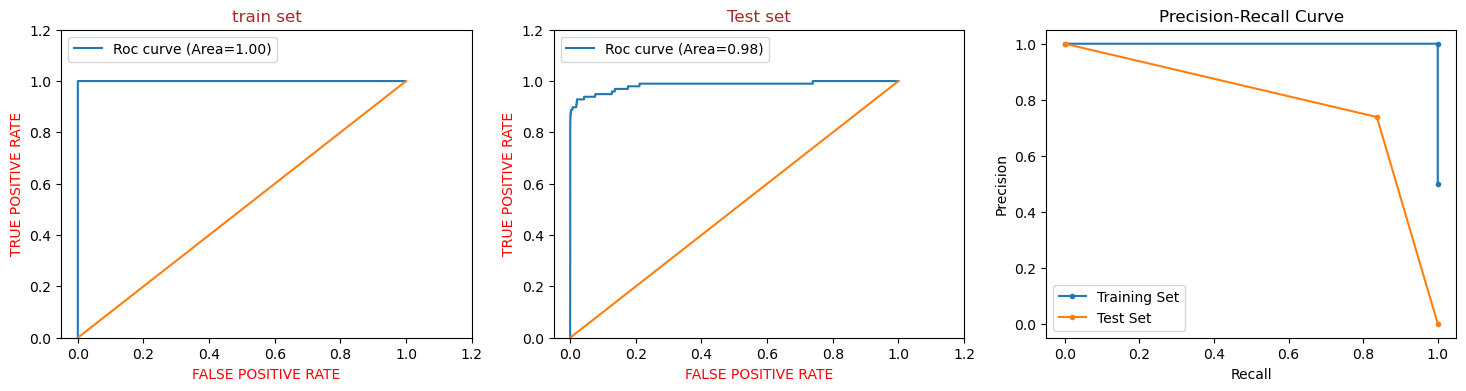

In [325]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
draw_roc_curve(y_train_adasyn,y_train_pred_xgboost_proba_adasyn)
plt.title('train set')

plt.subplot(1,3,2)
draw_roc_curve(y_test,y_test_pred_xgboost_proba)
plt.title('Test set')


plt.subplot(1,3,3)

# Calculate Precision-Recall for Training Set
precision_train, recall_train, _ = precision_recall_curve(y_train_adasyn, y_train_pred_xgboost_adasyn)

# Calculate Precision-Recall for Test Set
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_pred_xgboost)



# Plotting Precision-Recall Curve for both Training and Test Sets
plt.plot(recall_train, precision_train, label='Training Set', marker='.')
plt.plot(recall_test, precision_test, label='Test Set', marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

plt.show()


<b><font color=black style = 'font-family:cambria; font-size:15px'> OverAll Model Summary OF `XGBoost`  </font><b>
<br>

    
    
    
    
<table>
<tr><th>XGBoost </th><th>XGBoost With Smote</th><th>XGBoost With Adasyn</th></tr>
<tr><td>

XGBoost|Train Results|Test Result
-|-|-
Sensitivity | 1|0.816
Specificity| 1|0.99
Accuracy | 1|0.99
Roc Curve|1|0.97

</td><td>

XGBoost Smote |Train Results|Test Result
-|-|-
Sensitivity | 1|0.88
Specificity| 1|0.99
Accuracy | 1|0.99
Roc Curve|1|0.98

</td><td>

XGBoost Adasyn|Train Results|Test Result
-|-|-
Sensitivity | 1|0.836
Specificity| 0.999|0.99
Accuracy | 0.999|0.99
Roc Curve|1|0.98

</td></tr> </table>

<center><b><font color=black style = 'font-family:cambria; font-size:23px'> Decision Tree By Adasyn</font><b><center>

In [326]:
# Record the start time
start_time = time.time()



param_grid = {
 'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],}


# Create K-fold cross-validation
folds = KFold(n_splits=3, shuffle=True, random_state=42)

# Create GridSearchCV to find the best parameters for Decision Tree
model_cv = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, scoring='recall', cv=folds, verbose=1, n_jobs=-1)
model_cv.fit(X_train_adasyn, y_train_adasyn)


# Record the end time
end_time = time.time()
# Calculate the elapsed time in seconds
elapsed_time_seconds = end_time - start_time

# Convert elapsed time to minutes
elapsed_time_minutes = elapsed_time_seconds / 60

print(f"Elapsed Time (Minutes): {elapsed_time_minutes:.2f}")

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Elapsed Time (Minutes): 22.27


In [327]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results.head(3)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      33.289170      0.324611         0.184179        0.015088   
1      33.171741      0.116054         0.180136        0.010113   
2      33.151388      0.690828         0.180846        0.010271   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               5                      1   
1            gini               5                      1   
2            gini               5                      1   

  param_min_samples_split                                             params  \
0                       2  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
1                       5  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
2                      10  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   

   split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
0            0.92767           0.922934           0.929323         0.926642   
1            0.92767           0.922934           0.929323         0.926642   
2            0.92767           0.922934           0.929323         0.926642   

   std_test_score  rank_test_score  
0        0.002708               46  
1        0.002708               46  
2        0.002708               46

In [328]:
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_max_depth', 'param_min_samples_leaf',
       'param_min_samples_split', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [329]:
print(f"The Best params Is {model_cv.best_params_}")
print(f"The Best score Is {model_cv.best_score_}")

The Best params Is {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5}
The Best score Is 0.999375642764018



<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Choosing Best Parameters For `Decision Trees` Using Adasyn </b></font><br>


In [330]:
dtree_adasyn=DecisionTreeClassifier(random_state=100,
                                    criterion=model_cv.best_params_['criterion'],
                                    max_depth=model_cv.best_params_['max_depth'],
                                    min_samples_leaf=model_cv.best_params_['min_samples_leaf'],
                                    min_samples_split=model_cv.best_params_['min_samples_split'])

In [331]:
dtree_adasyn.fit(X_train_adasyn,y_train_adasyn)

DecisionTreeClassifier(max_depth=15, min_samples_split=5, random_state=100)

<img src='images/9.png' width=600px>

Top var = 14
2nd Top var = 4
3rd Top var = 7


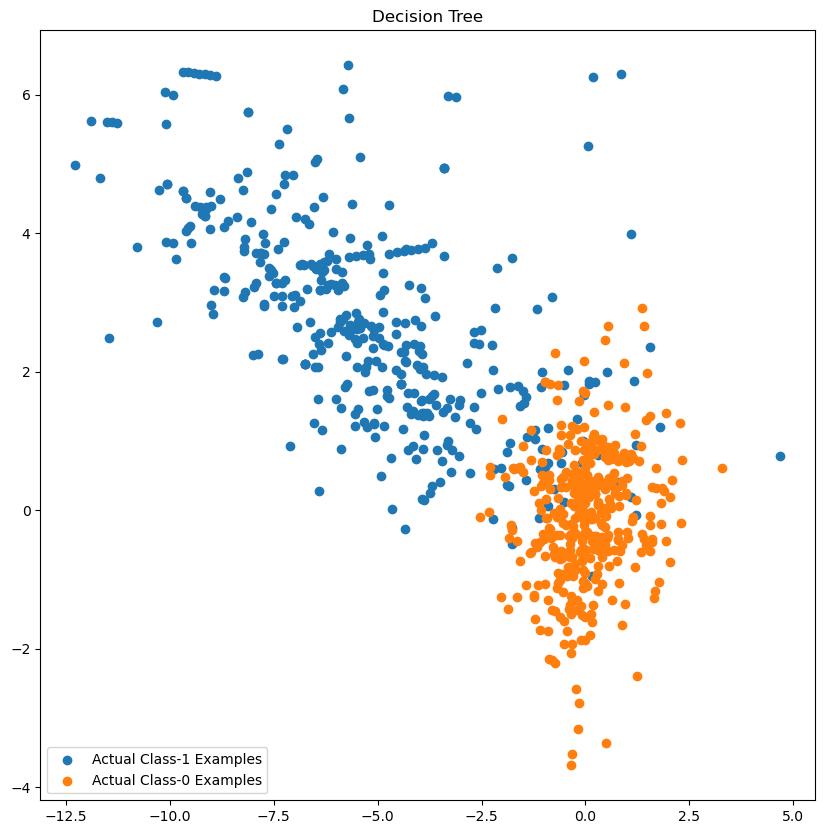

In [332]:
var_imp = []
for i in dtree_adasyn.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(dtree_adasyn.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(dtree_adasyn.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(dtree_adasyn.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(dtree_adasyn.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(dtree_adasyn.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.title('Decision Tree')
plt.legend()
plt.show()

In [333]:
y_train_pred_dtree_adasyn=dtree_adasyn.predict(X_train_adasyn)


<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Confusion Metrix For Decision Tree Adasyn `Train Case`</b></font><br>


In [334]:
confusion_matrix_dtree_train_adasyn=confusion_matrix(y_train_adasyn,y_train_pred_dtree_adasyn)

In [335]:
confusion_matrix_dtree_train_adasyn

array([[224628,   2823],
       [     7, 227427]], dtype=int64)

In [336]:
confusion_matrix_dtree_train_adasynTN = confusion_matrix_dtree_train_adasyn[0,0] # True negative
FP = confusion_matrix_dtree_train_adasyn[0,1] # False positive
FN = confusion_matrix_dtree_train_adasyn[1,0] # False negative
TP = confusion_matrix_dtree_train_adasyn[1,1] # True positive

In [337]:
calculation_metrics(TN, FP, FN, TP)

The Sensitivity  is : 0.9999692218401822
The Specificity  is : 0.9526802775822186


In [338]:
accuracy=metrics.accuracy_score(y_train_adasyn,y_train_pred_dtree_adasyn)
print('The Accuracy of Decision Trees For Train is :',accuracy)
    
F1_score=metrics.f1_score(y_train_adasyn,y_train_pred_dtree_adasyn)
print("The F1-score of  Decision Trees For Train is :", F1_score)

The Accuracy of Decision Trees For Train is : 0.9937786473504292
The F1-score of  Decision Trees For Train is : 0.9938166944879


In [339]:
# classification_report
print(classification_report(y_train_adasyn,y_train_pred_dtree_adasyn))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    227451
           1       0.99      1.00      0.99    227434

    accuracy                           0.99    454885
   macro avg       0.99      0.99      0.99    454885
weighted avg       0.99      0.99      0.99    454885




<font color="black " style ="font-family:Cambria ;font-size:18px"><b>`ROC_AUC` Curve on Train set For `Decision Tree` Using Adasyn </b></font><br>


In [340]:
y_train_pred_dtree_proba_adasyn=dtree_adasyn.predict_proba(X_train_adasyn)[:,1]

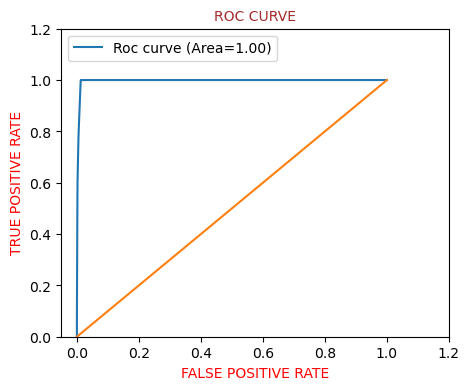

In [341]:
plt.figure(figsize=(5,4))
draw_roc_curve(y_train_adasyn,y_train_pred_dtree_proba_adasyn)

<b><font color=black style = 'font-family:cambria; font-size:18px'>Let's Do Predictions On The `Test Set` </font><b>

In [342]:
y_test_pred_dtree=dtree_adasyn.predict(X_test)

In [343]:
y_test_pred_dtree_proba=dtree_adasyn.predict_proba(X_test)[:,1]


<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Confusion Metrix For Decision `Test Case`  </b></font><br>


In [344]:
confusion_matrix_dtree_test=confusion_matrix(y_test,y_test_pred_dtree)
confusion_matrix_dtree_test

array([[56072,   792],
       [   14,    84]], dtype=int64)

In [345]:
TN = confusion_matrix_dtree_test[0,0] # True negative
FP = confusion_matrix_dtree_test[0,1] # False positive
FN = confusion_matrix_dtree_test[1,0] # False negative
TP = confusion_matrix_dtree_test[1,1] # True positive

In [346]:
calculation_metrics(TN, FP, FN, TP)

The Sensitivity  is : 0.8571428571428571
The Specificity  is : 0.9860720315137873


In [347]:
accuracy=metrics.accuracy_score(y_test,y_test_pred_dtree)
print('The Accuracy of Decision Tree For Test is :',accuracy)


The Accuracy of Decision Tree For Test is : 0.9858502159334293


In [348]:
# classification_report
print(classification_report(y_test, y_test_pred_dtree))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.86      0.17        98

    accuracy                           0.99     56962
   macro avg       0.55      0.92      0.58     56962
weighted avg       1.00      0.99      0.99     56962




<font color="black " style ="font-family:Cambria ;font-size:18px"><b>`ROC_AUC` Curve on Test set For `Decision Tree`  </b></font><br>


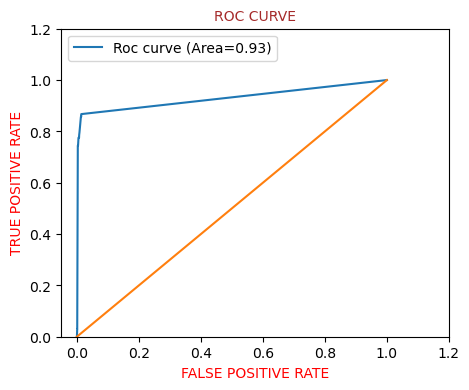

In [349]:
plt.figure(figsize=(5,4))
draw_roc_curve(y_test,y_test_pred_dtree_proba)

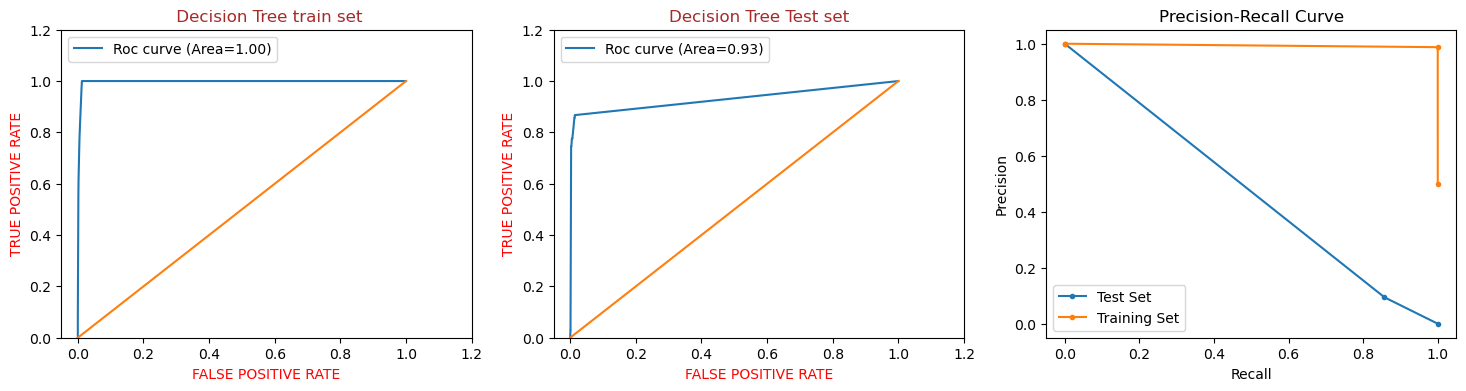

In [350]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
draw_roc_curve(y_train_adasyn,y_train_pred_dtree_proba_adasyn)

plt.title(' Decision Tree train set')

plt.subplot(1,3,2)
draw_roc_curve(y_test,y_test_pred_dtree_proba)

plt.title('Decision Tree Test set')

plt.subplot(1,3,3)
# Calculate Precision-Recall for Test Set
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_pred_dtree)
# Calculate Precision-Recall for Training Set
precision_train, recall_train, _ = precision_recall_curve(y_train_adasyn, y_train_pred_dtree_adasyn)





# Plotting Precision-Recall Curve for both Training and Test Sets
plt.plot(recall_test, precision_test, label='Test Set', marker='.')

plt.plot(recall_train, precision_train, label='Training Set', marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


plt.show()

<b><font color=black style = 'font-family:cambria; font-size:15px'> OverAll Model Summary OF `Decision Tree ` </font><b>
<br>



<table>
<tr><th>Decision Tree </th><th>Decision Tree With Smote</th><th>Decision Tree With Adasyn</th></tr>
<tr><td>
    
Decision Tree |Train Results|Test Result
-|-|-
Sensitivity | 0.77|0.724
Specificity| 0.999|0.999
Accuracy | 0.999|0.999
Roc Curve|0.95|0.93

</td><td>
    
Decision Tree Smote |Train Results|Test Result
-|-|-
Sensitivity | 0.97|0.887
Specificity| 0.97|0.97
Accuracy | 0.99|0.97
Roc Curve|0.99|0.94

</td><td>

Decision Tree Adasyn|Train Results|Test Result
-|-|-
Sensitivity | 0.999|0.86
Specificity| 0.952|0.986
Accuracy | 0.993|0.986
Roc Curve|1|0.93

</td></tr> </table>

In [351]:
log_fpr,log_tpr,log_threshold=roc_curve(y_train,y_train_pred_logistic)
xgb_fpr,xgb_tpr,xgb_threshold=roc_curve(y_train,y_train_pred_xgboost)
dtree_fpr,dtree_tpr,dtree_threshold=roc_curve(y_train,y_train_pred_dtree)
random_forest_fpr,random_forest_tpr,random_forest_threshold=roc_curve(y_train,y_train_pred_random_forest)

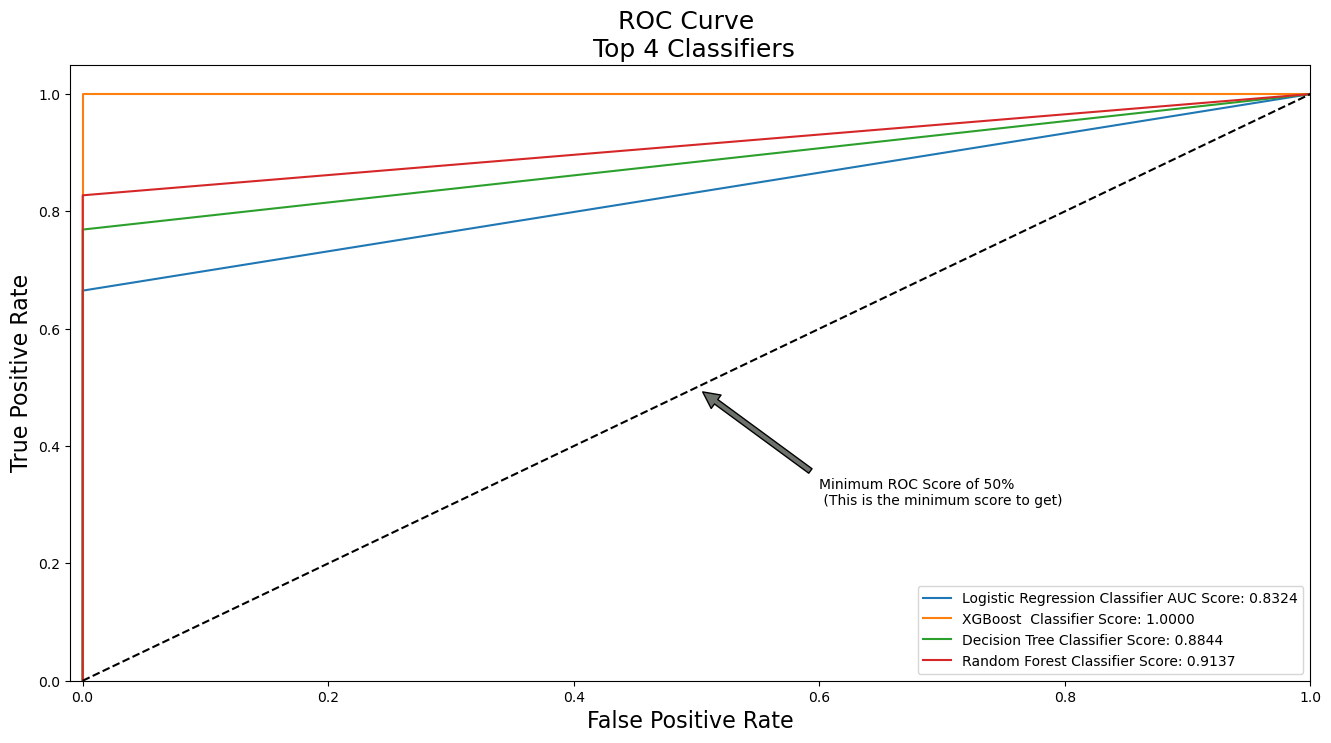

In [352]:
def graph_roc_curve_multiple(log_fpr, log_tpr,xgb_fpr,xgb_tpr,dtree_fpr,dtree_tpr,random_forest_fpr,random_forest_tpr) :
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier AUC Score: {:.4f}'.format((roc_auc_score(y_train, y_train_pred_logistic))))
    plt.plot(xgb_fpr,xgb_tpr, label='XGBoost  Classifier Score: {:.4f}'.format(roc_auc_score(y_train,y_train_pred_xgboost)))
    plt.plot(dtree_fpr,dtree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train,y_train_pred_dtree)))
    plt.plot(random_forest_fpr,random_forest_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_train,y_train_pred_random_forest)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
graph_roc_curve_multiple(log_fpr, log_tpr,xgb_fpr,xgb_tpr,dtree_fpr,dtree_tpr,random_forest_fpr,random_forest_tpr)


<font color="black " style ="font-family:Cambria ;font-size:18px"><b> 
Choosing The Best Model Depends On The Specific Goals Of `Credit Card Fraud Detection` And The Business Context  </b></font><br>

<font color=black style = 'font-family:cambria; font-size:15px'>1. Logistic Regression With SMOTE: </font><br>
- <font color=green style = 'font-family:cambria; font-size:15px'>Pros:</font>
     - <font color=brown style = 'font-family:cambria; font-size:15px'>Achieved Good Sensitivity (0.92) And Specificity (0.97) After Using SMOTE.</font>
     - <font color=brown style = 'font-family:cambria; font-size:15px'>High Accuracy (0.97) And ROC Curve (0.98) In The Test Set.</font>
- <font color=green style = 'font-family:cambria; font-size:15px'>Cons:</font>
     - <font color=brown style = 'font-family:cambria; font-size:15px'>Lower Sensitivity Compared To Some Other Models.</font>
     
     
<font color=black style = 'font-family:cambria; font-size:15px'>2. Xgboost With SMOTE: </font><br>
- <font color=green style = 'font-family:cambria; font-size:15px'>Pros:</font>
     - <font color=brown style = 'font-family:cambria; font-size:15px'>High Accuracy (0.99) And ROC Curve (0.98) In The Test Set.</font>
     - <font color=brown style = 'font-family:cambria; font-size:15px'>Good Sensitivity (0.88) And Specificity (0.99).</font>
- <font color=green style = 'font-family:cambria; font-size:15px'>Cons:</font>
     - <font color=brown style = 'font-family:cambria; font-size:15px'>Slightly Lower Sensitivity Compared To The Normal Xgboost Model.</font>
    
    
<font color=black style = 'font-family:cambria; font-size:15px'>3. Decision Tree With SMOTE: </font><br>
- <font color=green style = 'font-family:cambria; font-size:15px'>Pros:</font>
     - <font color=brown style = 'font-family:cambria; font-size:15px'>Improved Sensitivity (0.887) And Specificity (0.97) After Using SMOTE.</font>
     - <font color=brown style = 'font-family:cambria; font-size:15px'>High Accuracy (0.97) And ROC Curve (0.94) In The Test Set.</font>
- <font color=green style = 'font-family:cambria; font-size:15px'>Cons:</font>
     - <font color=brown style = 'font-family:cambria; font-size:15px'>Lower Sensitivity Compared To Xgboost.</font>
     

<font color=black style = 'font-family:cambria; font-size:15px'>4. Random Forest: </font>
- <font color=green style = 'font-family:cambria; font-size:15px'>Pros:</font>
     - <font color=brown style = 'font-family:cambria; font-size:15px'>Achieved High Accuracy (0.999) And ROC Curve (0.98) In The Test Set</font>
     - <font color=brown style = 'font-family:cambria; font-size:15px'>Balanced Sensitivity (0.80) And Specificity (0.99).</font>
- <font color=green style = 'font-family:cambria; font-size:15px'>Cons:</font>
     - <font color=brown style = 'font-family:cambria; font-size:15px'>Random Forest With SMOTE Showed Signs Of Overfitting.</font>

<font color="black " style ="font-family:Cambria ;font-size:20px"><b> 
The `Xgboost Model With SMOTE` Appears To Be A Strong Performer:  </b></font>
- <font color=green style = 'font-family:cambria; font-size:15px'>It Achieved `High Accuracy (0.99)` And A Good Balance Between `Sensitivity (0.88)` And `Specificity (0.99)`.</font>
- <font color=green style = 'font-family:cambria; font-size:15px'>The ROC Curve Value Is Also `High (0.98)` In The `Test Set`.</font>
- <font color=green style = 'font-family:cambria; font-size:15px'>The `Training Set Confusion Matrix` Indicates `Perfect Classification`, Highlighting The `Robustness Of The Model`.</font>
- <font color=green style = 'font-family:cambria; font-size:15px'>In The Test Set, The Model Shows `High True Negatives And True Positives`, Suggesting `Good Generalization To Unseen Data`.</font>

<b><font color=black style = 'font-family:cambria; font-size:25px'>Reasons for Choosing XGBoost with SMOTE:</font><b>
- <font color=green style = 'font-family:cambria; font-size:17px'>`High-Accuracy` : The Model Demonstrates High Accuracy, Indicating A `Strong Ability To Correctly Classify` Both Fraudulent And Non-Fraudulent Transactions</font>
 
- <font color=green style = 'font-family:cambria; font-size:17px'>`Balanced Sensitivity And Specificity` : The Model Achieves A Good Balance Between Sensitivity And Specificity, Crucial For Fraud Detection Where Both `False Positives And False Negatives` Are Significant & The Model Demonstrates Good Sensitivity (0.88), Capturing A High Percentage Of Fraudulent Transactions, And High Specificity (0.99), `Correctly Identifying Non-Fraudulent Transactions`.
 </font>

- <font color=green style = 'font-family:cambria; font-size:17px'>`High ROC Curve` : The `ROC Curve Is A Strong Indicator` Of The Model's Ability To Discriminate Between Classes, And A Value Of 0.98 Suggests Excellent Performance.
 </font>

- <font color=green style = 'font-family:cambria; font-size:17px'>`SMOTE Enhancement` : The Use Of SMOTE Has Helped `Improve Sensitivity`, Addressing The Class Imbalance Issue And Making The Model More Robust
 </font>



<font color="black " style ="font-family:Cambria ;font-size:18px"><b> Recommendation:</b></font>

<font color=green style = 'font-family:cambria; font-size:15px'>As I Observed That Considering The `Balance Between Sensitivity, Specificity, And Overall Model Performance`, I Would Recommend Xgboost With SMOTE For The Current Scenario.</font>

<font color=green style = 'font-family:cambria; font-size:15px'>It Has `Achieved High Accuracy, Good Sensitivity, And Specificity`, Making It A Well-Rounded Model.</font>
